In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
# from astropy.cosmology import Planck15
# from astropy import units as u

import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/unWISE_dictonaries/')
from green_dict import *
from red_dict import *
from blue_dict import *

#matplotlib.use('pdf')
font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# To-do:
-units: y x CIB or tSZ x CIB, CIBxCIB conversion?

flux cut

parameters 

In [33]:
nu_list = 90,145,217,353,
nu_list_str = '90,145,217,353'

path_save = "/Users/aleksandra/Desktop/ILC/ILC_class-sz_curves/"
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'

In [3]:
color = "green" ## unwise color 

In [4]:
if color=="blue":
    pdict = blue_pdict
if color=="green":
    pdict = green_pdict
if color=="red":
    pdict = red_pdict  
    
pdict['galaxy_sample_id']
#pdict

'green'

In [22]:
TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

T_cmb = 2.726 #Kelvin
_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

L0_websky = 4.461102571695613e-07

common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
            'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}


# parameters used by Fiona and Mat
cib_params = {
       'hm_consistency': 0,
       'Redshift evolution of dust temperature' :  0.36,
       'Dust temperature today in Kelvins' : 24.4,
       'Emissivity index of sed' : 1.75,
       'Power law index of SED at high frequency' : 1.7,
       'Redshift evolution of L − M normalisation' : 3.6,
       'Most efficient halo mass in Msun' : 10.**12.6,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
       'Size of of halo masses sourcing CIB emission' : 0.5,

        # M_min_HOD is the threshold above which nc = 1:
        'M_min_HOD' : 10.**10,

        'M_min' : 1e10*websky_cosmo['h'],
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.,
    
    
}
tsz_params ={

       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_ell_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,

}

# ~ model 2 of https://arxiv.org/pdf/1208.5049.pdf (Table 5)
# more exactly:
# shang_zplat  = 2.0
# shang_Td     = 20.7
# shang_beta   = 1.6
# shang_eta    = 1.28
# shang_alpha  = 0.2
# shang_Mpeak  = 10.**12.3
# shang_sigmaM = 0.3

# centrals is Ncen = 1 for all halos with mass bigger than websky's m_min
# subhalo mass function is eq. 3.9 of the websky paper 
# it is F. Jiang and F. C. van den Bosch, Generating merger trees for dark matter haloes: a comparison of
# methods, MNRAS 440 (2014) 193 [1311.5225].
websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        #'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
        'z_max' : 4.6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
    
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '353',  
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
        #'cib_Snu_cutoff_list [mJy]':'315',
        'has_cib_flux_cut': 0
}



# Frequency-independent

## CMB

In [24]:
common_settings_cmb = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':10000, 

}

In [25]:
M = Class()
M.set(common_settings_cmb)
M.compute()
cl_tot = M.raw_cl(10000)
cl_lensed = M.lensed_cl(10000)
ell = cl_tot['ell']
M.struct_cleanup()  # clean output
M.empty()           # clean input


factor = TCMB**2 * ell*(ell+1.)/2./np.pi

In [26]:
# noise 
ell_noise, cl_noise = np.loadtxt("/Users/aleksandra/Desktop/noise_curves_from_kSZ2X/nl_advact_20uK_1p5arcmin_uK2_170422.txt").T

## kSZ

In [27]:
# battaglia 12 kSZ theory computation. Patchy is before reionization, the other after reionization; should add these two
CellkSZhomog = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS.d.txt')
CellkSZpatchy = np.loadtxt('/Users/aleksandra/Desktop/Research/ACTxDES/kSZ_filter/kSZ_theory_data/FBN_kSZ_PS_patchy.d.txt')

# get rid of ell*(ell+1)/2pi factors  
ell_theory_battaglia = CellkSZhomog[:,0]
dl_kSZ_theory_battaglia = CellkSZhomog[:,1] + CellkSZpatchy[:,1]
cl_kSZ_theory_battaglia = (CellkSZhomog[:,1] + CellkSZpatchy[:,1]) * 2.0*np.pi/(ell_theory_battaglia)/(ell_theory_battaglia+1.0)


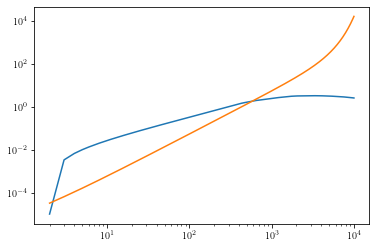

In [28]:
plt.plot(ell_theory_battaglia , dl_kSZ_theory_battaglia)
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi)
plt.yscale("log")
plt.xscale("log")

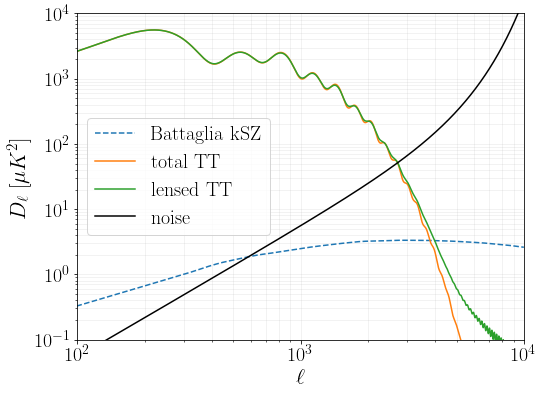

In [29]:
plt.figure(figsize=(8,6))

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed TT')
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, color= "black", label="noise")

plt.yscale("log")
plt.xscale("log")
plt.xlim(100,1e4)
plt.ylim(1e-1,1e4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=22)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)


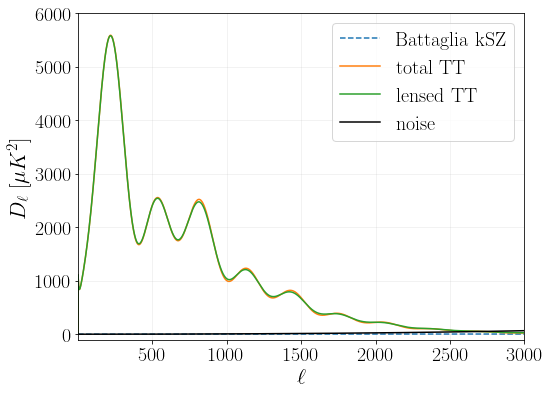

In [30]:
plt.figure(figsize=(8,6))

plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia,"--", label = "Battaglia kSZ")
plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
plt.plot(ell, 1.e12*factor*cl_lensed['tt'],label='lensed TT')
plt.plot(ell_noise , ell_noise *(ell_noise +1)*cl_noise/2/np.pi, color= "black", label="noise")

# plt.yscale("log")
# plt.xscale("log")
plt.xlim(2,3e3)
plt.ylim(-101,6e3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$\ell$',fontsize=22)
plt.ylabel(r'$D_\ell$  [$\mu K^2$]',fontsize=22)
plt.grid(which='both',alpha=0.2)
plt.legend(fontsize=20)


# Frequency-dependent

In [31]:
def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy


def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
#         print("Tcmb_gNU=", Tcmb_gNU)
#         print("for", nu_in_GHz, "GHz")
        return Tcmb_gNU


## tSZ

In [34]:
M = Class()
M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h'})
M.set(common_settings)
M.set(websky_cosmo)
M.set(websky_cib_params)
#M.set(cib_params)
M.set(tsz_params)

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()

cl_cib_cib = M.cl_cib_cib()
cl_tsz_cib = M.cl_tSZ_cib()
cl_sz = M.cl_sz()

with flux cut:

In [36]:
# M = Class()
# M.set({'output':'cib_monopole,cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h'})
# M.set(common_settings)
# M.set(websky_cosmo)
# M.set(websky_cib_params)
# M.set(tsz_params)

# M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
#        'cib_frequency_list_num' : 3,
#        'cib_frequency_list_in_GHz' : nu_list_str,  
# # table 1 of https://arxiv.org/pdf/1309.0382.pdf
# #1: freq GHz 2: Flux cut mJy
# # 100 - 400
# # 143 - 350
# # 217 - 225
# # 353 - 315
# # 545 - 350
# # 857 - 710
# # 3000  - 1000
#         'cib_Snu_cutoff_list [mJy]':'315,350,225',
#         'has_cib_flux_cut': 1
#       })
# M.compute()
# cl_cib_cib_flux_cut = M.cl_cib_cib()
# cib_monopole_flux_cut = M.cib_monopole()
# cl_tsz_cib_flux_cut = M.cl_tSZ_cib()

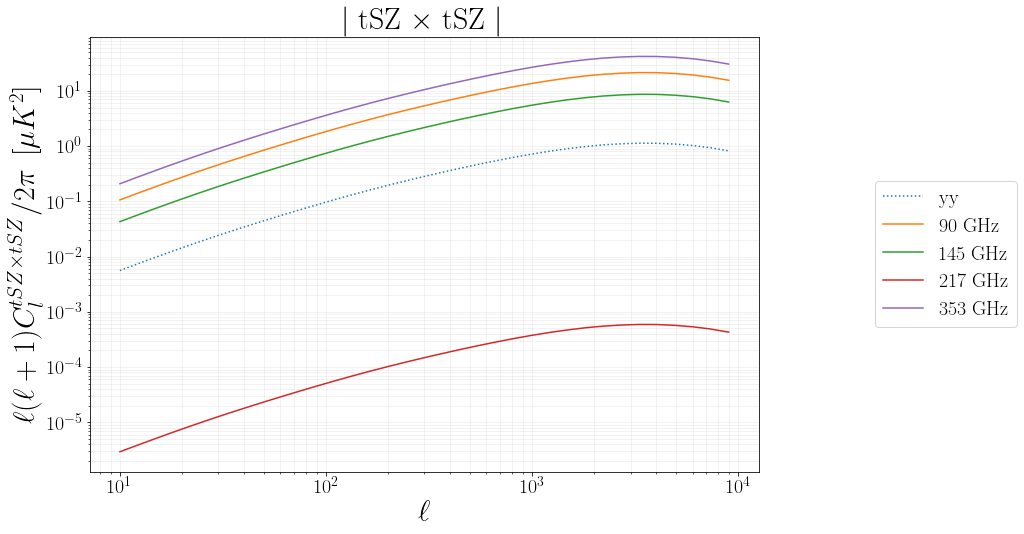

In [71]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{tSZ \times tSZ} / 2 \pi \,\,\, [\mu K^2]$", size=30)

plt.grid(which='both',alpha=0.2)

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy,":", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2),label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

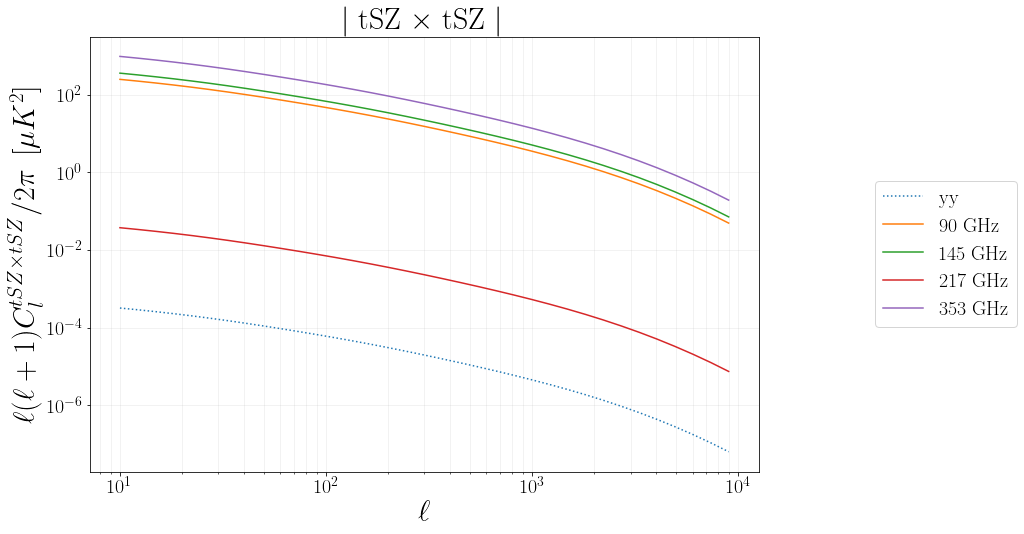

In [70]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{tSZ \times tSZ} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.grid(which='both',alpha=0.2)

ell_yy = np.asarray(cl_sz['ell'])
cls_to_dls = ell_yy*(ell_yy+1.)/2./np.pi

yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])
plt.loglog(cl_sz['ell'],yy/cls_to_dls,":", label=r'yy')

for (i,nu) in enumerate(nu_list):
    plt.loglog(cl_sz['ell'],yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)*convert_Jysr_to_uK(nu)**2/cls_to_dls,label=r'%.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

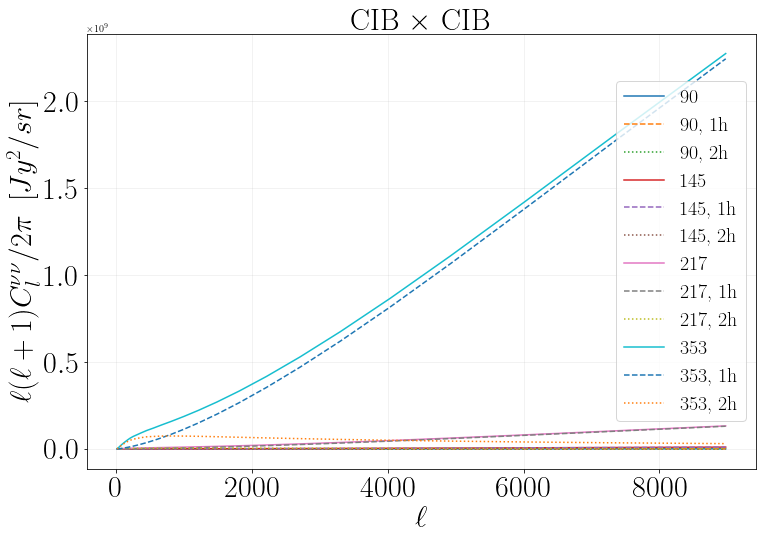

In [72]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

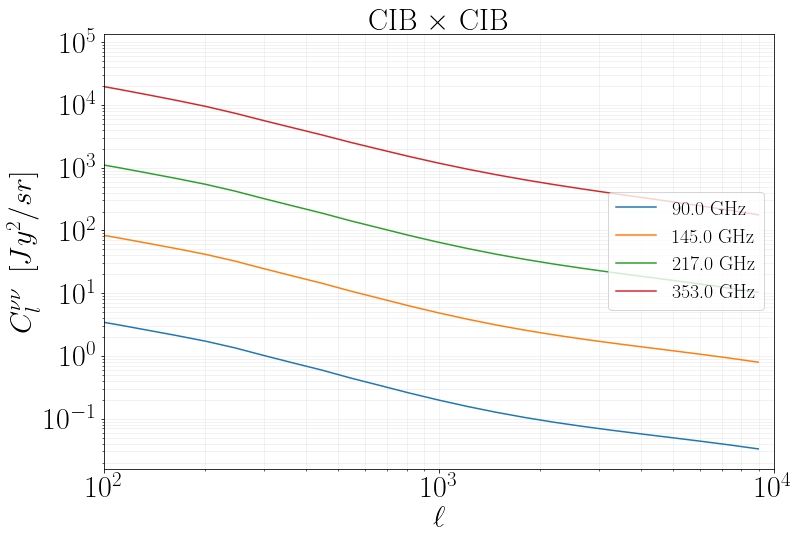

In [73]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], dls_cib_1h + dls_cib_2h, label=r'%.1f GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

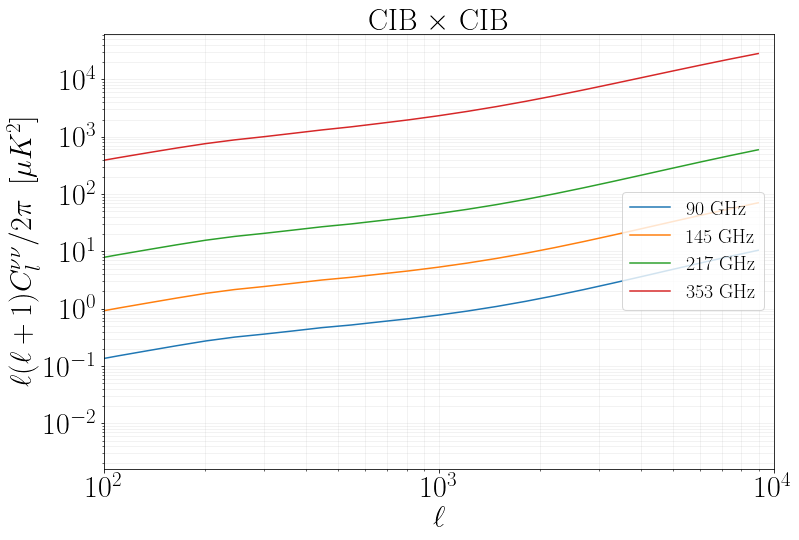

In [75]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ \ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(100, 10000)

ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    #CIB
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])/cls_to_dls
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])/cls_to_dls

    plt.plot(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'], cls_to_dls*(dls_cib_1h + dls_cib_2h)/convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu), label=r'%.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

### not reproducing Fig 3 in Fiona/Mat but params different ?


## tSZ x CIB

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


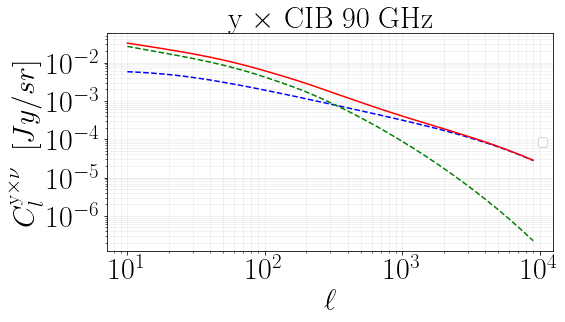

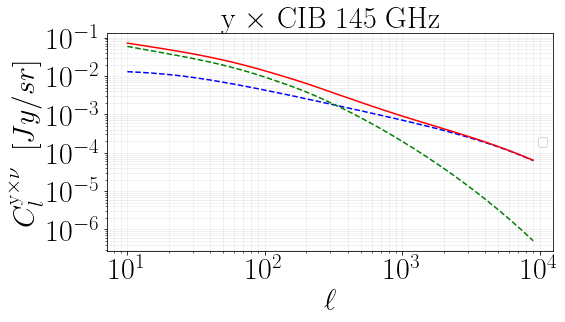

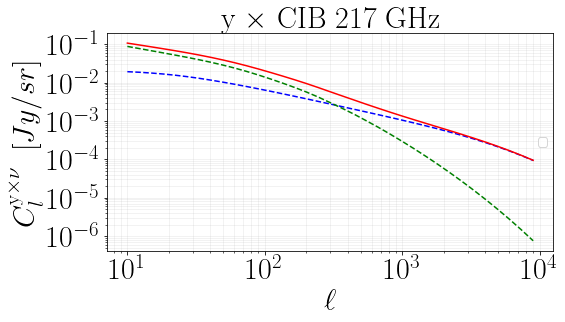

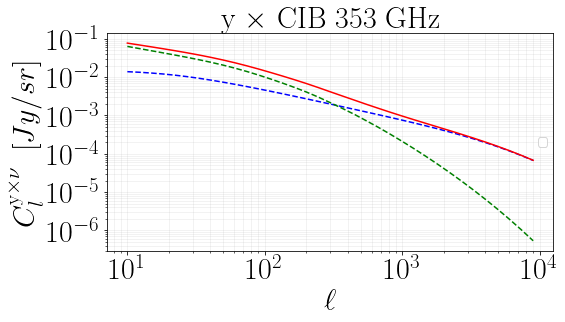

In [42]:
ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(8,4))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
    plt.title(r'y $\times$ CIB %.1i GHz'%(nu), fontsize=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    spec = abs(tSZ_spectral_funct_at_nu_in_GHz(nu))
    
    #cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls*convert_Jysr_to_uK(nu),'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls*convert_Jysr_to_uK(nu),'--',color="green")#, label=r'2h,  %.1i'%(nu))
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls *convert_Jysr_to_uK(nu),'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))

    plt.legend(loc='right',  fontsize=12)    
  

In [43]:
# ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
# cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plt.figure(figsize=(6,3))
#     plt.xlabel(r"$\ell$", size=30)
#     plt.ylabel(r"$ C_l^{\rm{tsz \times \nu}} \,\,\, [Jy/sr]$", size=30)
#     plt.yticks(fontsize=30)
#     plt.xticks(fontsize=30)
#     plt.title(r'tSZ $\times$ CIB %.1i GHz'%(nu), fontsize=30)
#     plt.grid(which='both',alpha=0.2)
#     plt.yscale("log")
#     plt.xscale("log")
#     cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
#     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))

#     plt.legend(loc='right',  fontsize=12)    
  

In [44]:
# ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
# cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

# for (i,nu) in enumerate(nu_list):
#     plt.figure(figsize=(6,3))
#     plt.xlabel(r"$\ell$", size=30)
#     plt.ylabel(r"$ C_l^{\rm{tsz \times \nu}} \,\,\, [Jy/sr]$", size=30)
#     plt.yticks(fontsize=30)
#     plt.xticks(fontsize=30)
#     plt.title(r'tSZ $\times$ CIB %.1i GHz'%(nu), fontsize=30)
#     plt.grid(which='both',alpha=0.2)
#     plt.yscale("log")
#     plt.xscale("log")
#     #cl_yCIB = cl_yCIB_at_nu_in_GHz(cl_tsz_cib[str(nu)], nu)
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h']))/cls_to_dls,'--',color ="blue")#, label=r'1h,  %.1i'%(nu))
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'--',color="green")#, label=r'2h,  %.1i'%(nu))
# #     plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-', color="red")#,label=r'$\nu$ = %.1i'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h'])+np.asarray(cl_yCIB['2h']))/cls_to_dls,'-',color="red",label=r'$\nu$ = %.1i GHz'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['1h']))/cls_to_dls,'-',color="blue",label=r'1h, $\nu$ = %.1i GHz'%(nu))
#     plt.plot(cl_yCIB['ell'], abs(np.asarray(cl_yCIB['2h']))/cls_to_dls,'-',color="green",label=r'2h, $\nu$ = %.1i GHz'%(nu))

#     plt.legend(loc='right',  fontsize=12)    
  

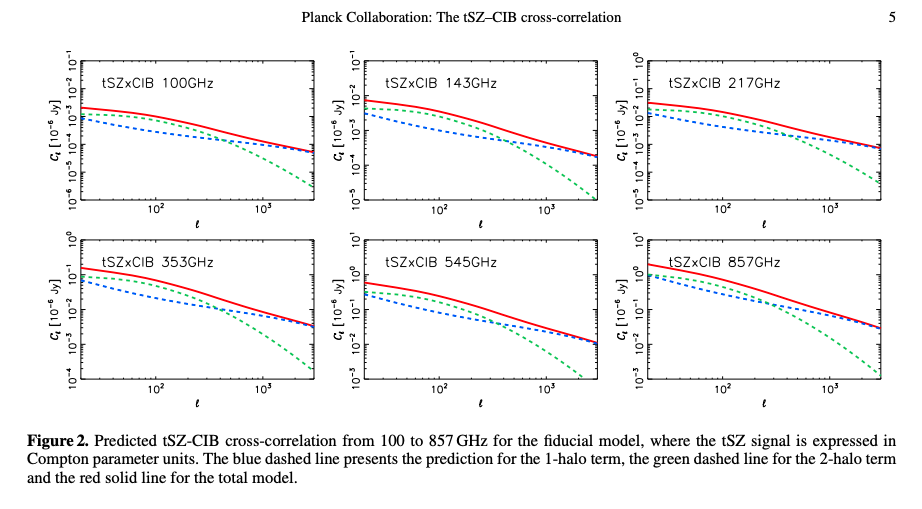

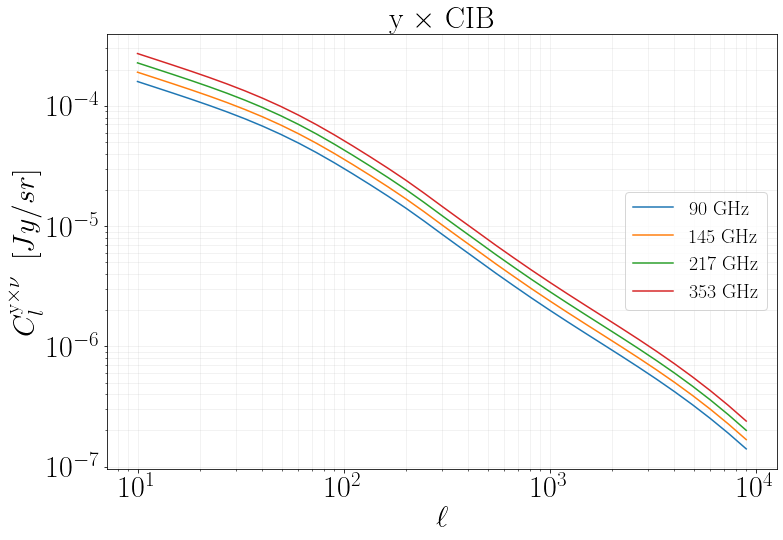

In [76]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h']))/cls_to_dls,'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

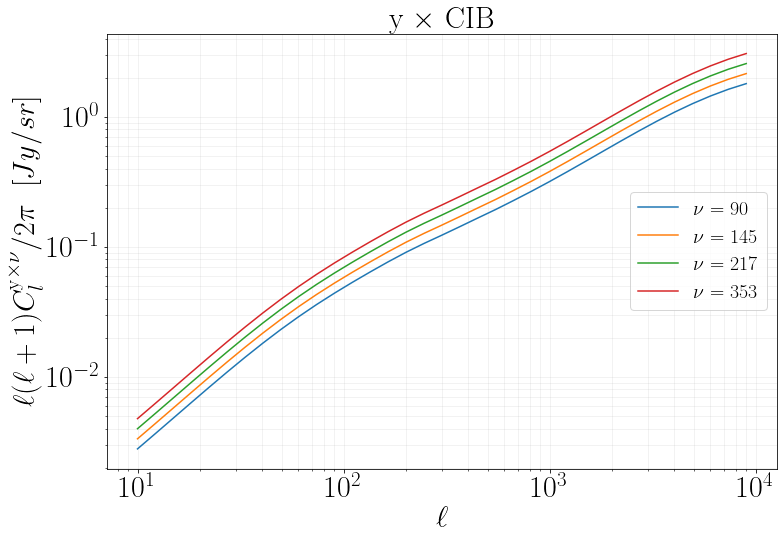

In [46]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [Jy/sr]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.plot(ell_tsz_cib, (np.asarray(cl_tsz_cib[str(nu)]['1h'])+np.asarray(cl_tsz_cib[str(nu)]['2h'])),'-',label=r'$\nu$ = %.1i'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


## tSZ x g 

In [47]:
M = Class()
M.set(pdict)
M.set(common_settings)
M.set(tsz_params)
M.set({
            'output':'tSZ_gal_1h, tSZ_gal_2h',
        })        
M.compute()


cl_yg = M.cl_yg()

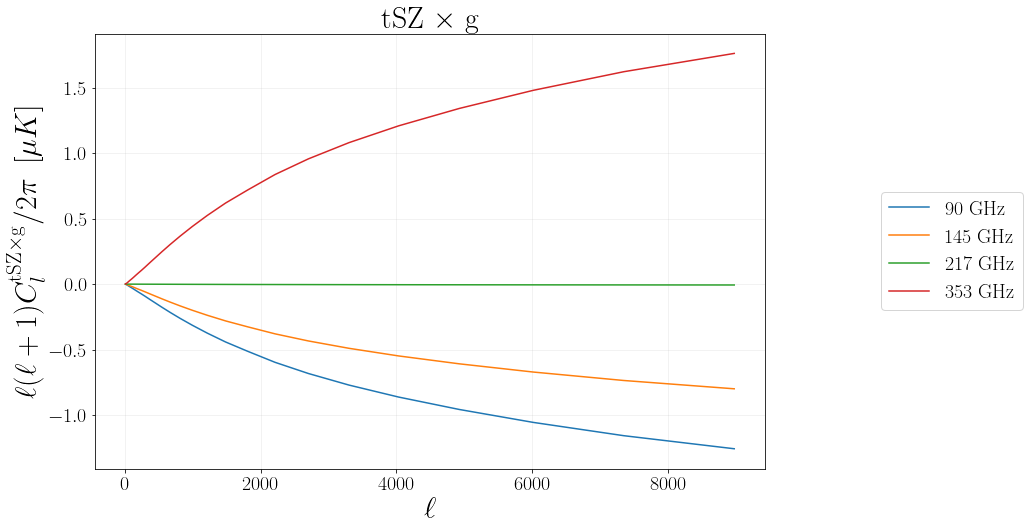

In [80]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$",  fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{tSZ \times g}} / 2 \pi \,\,\, [\mu K]$", fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'tSZ $\times$ g', fontsize=30)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    yg = np.asarray(cl_yg['1h'])+np.asarray(cl_yg['2h'])
    plt.plot(cl_yg['ell'],yg*tSZ_spectral_funct_at_nu_in_GHz(nu),'-',label=r' %.1i GHz'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [49]:
M = Class()
M.set({'output':'gal_cib_1h,gal_cib_2h,lensmag_cib_1h,lensmag_cib_2h'})
M.set(pdict)
M.set(common_settings)
M.set(cib_params)


M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
        'Redshift evolution of dust temperature' :  0.36,
       'Dust temperature today in Kelvins' : 24.4,
       'Emissivity index of sed' : 1.75,
       'Power law index of SED at high frequency' : 1.7,
       'Redshift evolution of L − M normalisation' : 3.6,
       'Most efficient halo mass in Msun' : 10.**12.6,
     #  'Normalisation of L − M relation in [Jy MPc2/Msun/Hz]' : 6.4e-8,
       'Size of of halo masses sourcing CIB emission' : 0.5,

       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,   
      })
M.compute()

cl_cib_g = M.cl_gal_cib()

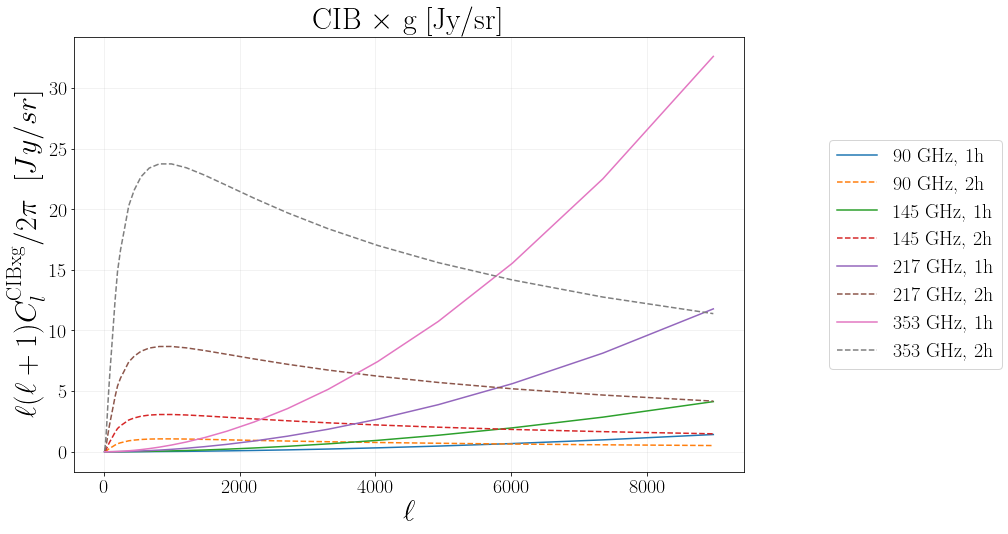

In [81]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ \ [Jy/sr]$", fontsize=30)
plt.title(r'CIB $\times$ g [Jy/sr]', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h , label=r'%.1i GHz, 1h'%(nu))
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_2h , "--", label=r'%.1i GHz, 2h'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

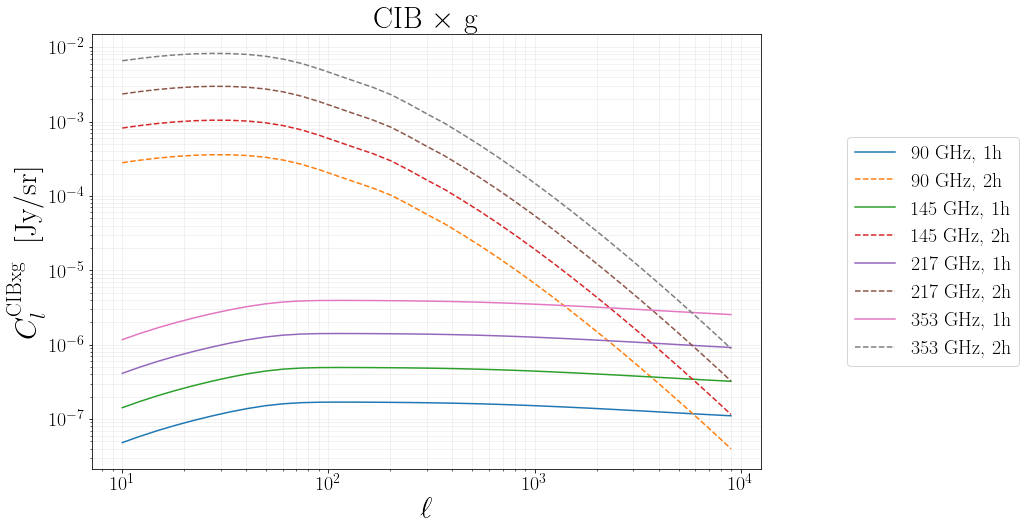

In [82]:
ell_cib_gal = np.asarray(cl_cib_g['217']['ell'])
cls_to_dls = ell_cib_gal*(ell_cib_gal+1.)/2./np.pi 

plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$ C_l^{\rm{CIB}xg} $  \ [Jy/sr]", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale("log")
plt.xscale("log")
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_1h/cls_to_dls, label=r'%.1i GHz, 1h'%(nu))
    plt.plot(cl_cib_g['217']['ell'], cl_cib_g_2h /cls_to_dls, "--", label=r'%.1i GHz, 2h'%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

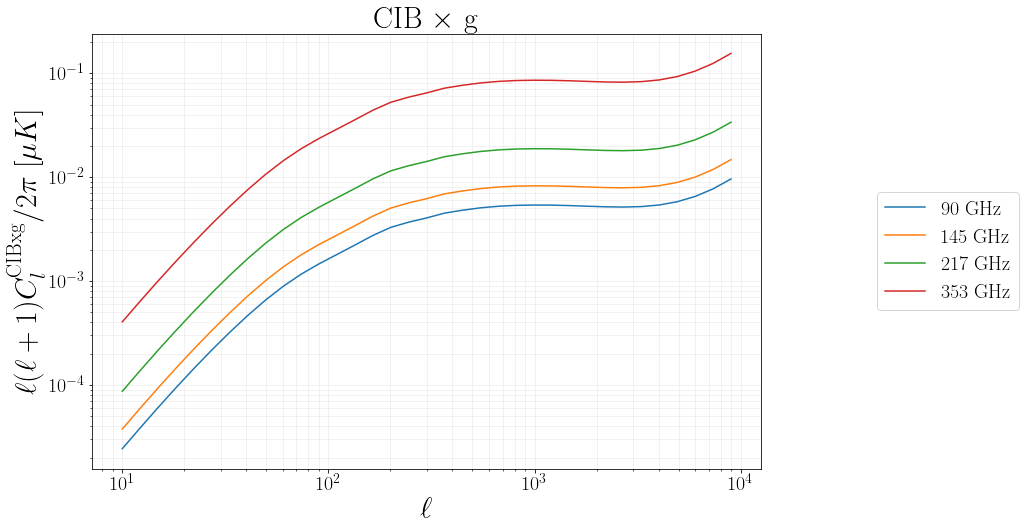

In [85]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{CIB}xg} / 2 \pi \ [\mu K] $", fontsize=30)
plt.title(r'CIB $\times$ g', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu) in enumerate(nu_list):
    
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)  
    plt.loglog(cl_cib_g['217']['ell'], CIBg_uK , label=r'%.1i GHz'%(nu))

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

In [53]:
M = Class()
M.set(pdict)
M.set(common_settings)

M.set({
        'output':'gal_gal_1h, gal_gal_2h, gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
        })        
M.compute()
    
    
cl_gg = M.cl_gg()
cl_gg_ell = np.asarray(cl_gg['ell'])
cl_gg_1h = np.asarray(cl_gg['1h'])
cl_gg_2h = np.asarray(cl_gg['2h'])

cl_to_dl_gg = cl_gg_ell*(cl_gg_ell+1)/2/np.pi

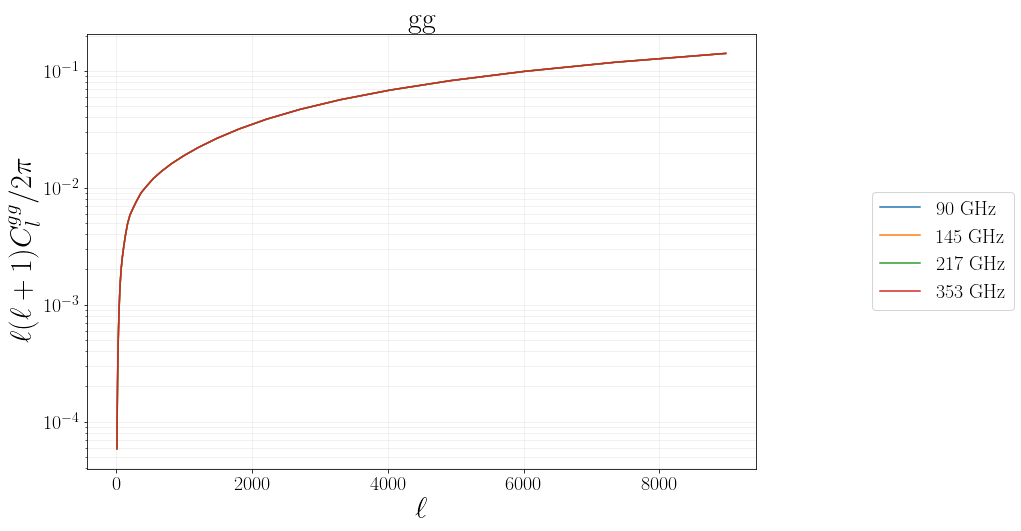

In [54]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{gg} / 2 \pi $", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")

for (i,nu) in enumerate(nu_list): 
    plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h) , label=r'%.1i GHz'%(nu))
    

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

### Alex data

In [55]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"
path_cov = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

if color == 'blue':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
    cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
    A_shot_noise  = A_shot_noise_blue
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
if color == 'green':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
    cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
    A_shot_noise  = A_shot_noise_green
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
if color == 'red':
    alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')
    cov = np.loadtxt(path_cov + "Covariance_7777_red.txt")
    s = s_red
    A_shot_noise  = A_shot_noise_red
    trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov
print(color)
print(pdict['galaxy_sample_id'])
#print(cl_alex[:10])
print(A_shot_noise)

green
green
1.3789116


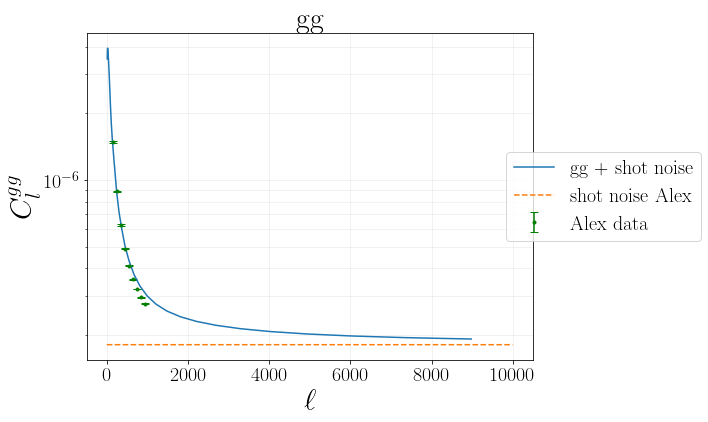

In [56]:
plt.figure(figsize=(8,6))
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l^{gg}$", fontsize=30)
plt.title('gg', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
#plt.xscale("log")
plt.errorbar(ell_alex[1:10], (cl_alex)[1:10], yerr= sigma_alex[1:10], fmt = ".", color = color, capsize=4, label="Alex data")

shot_noise_gg = 1.81*1e-7*np.ones(10000)

plt.plot(cl_gg_ell, (cl_gg_1h+cl_gg_2h)/cl_to_dl_gg + 1.81*1e-7 , label=r'gg + shot noise')
plt.plot(shot_noise_gg, "--", label = "shot noise Alex")

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

missing the magnification terms 

# Plot everything 

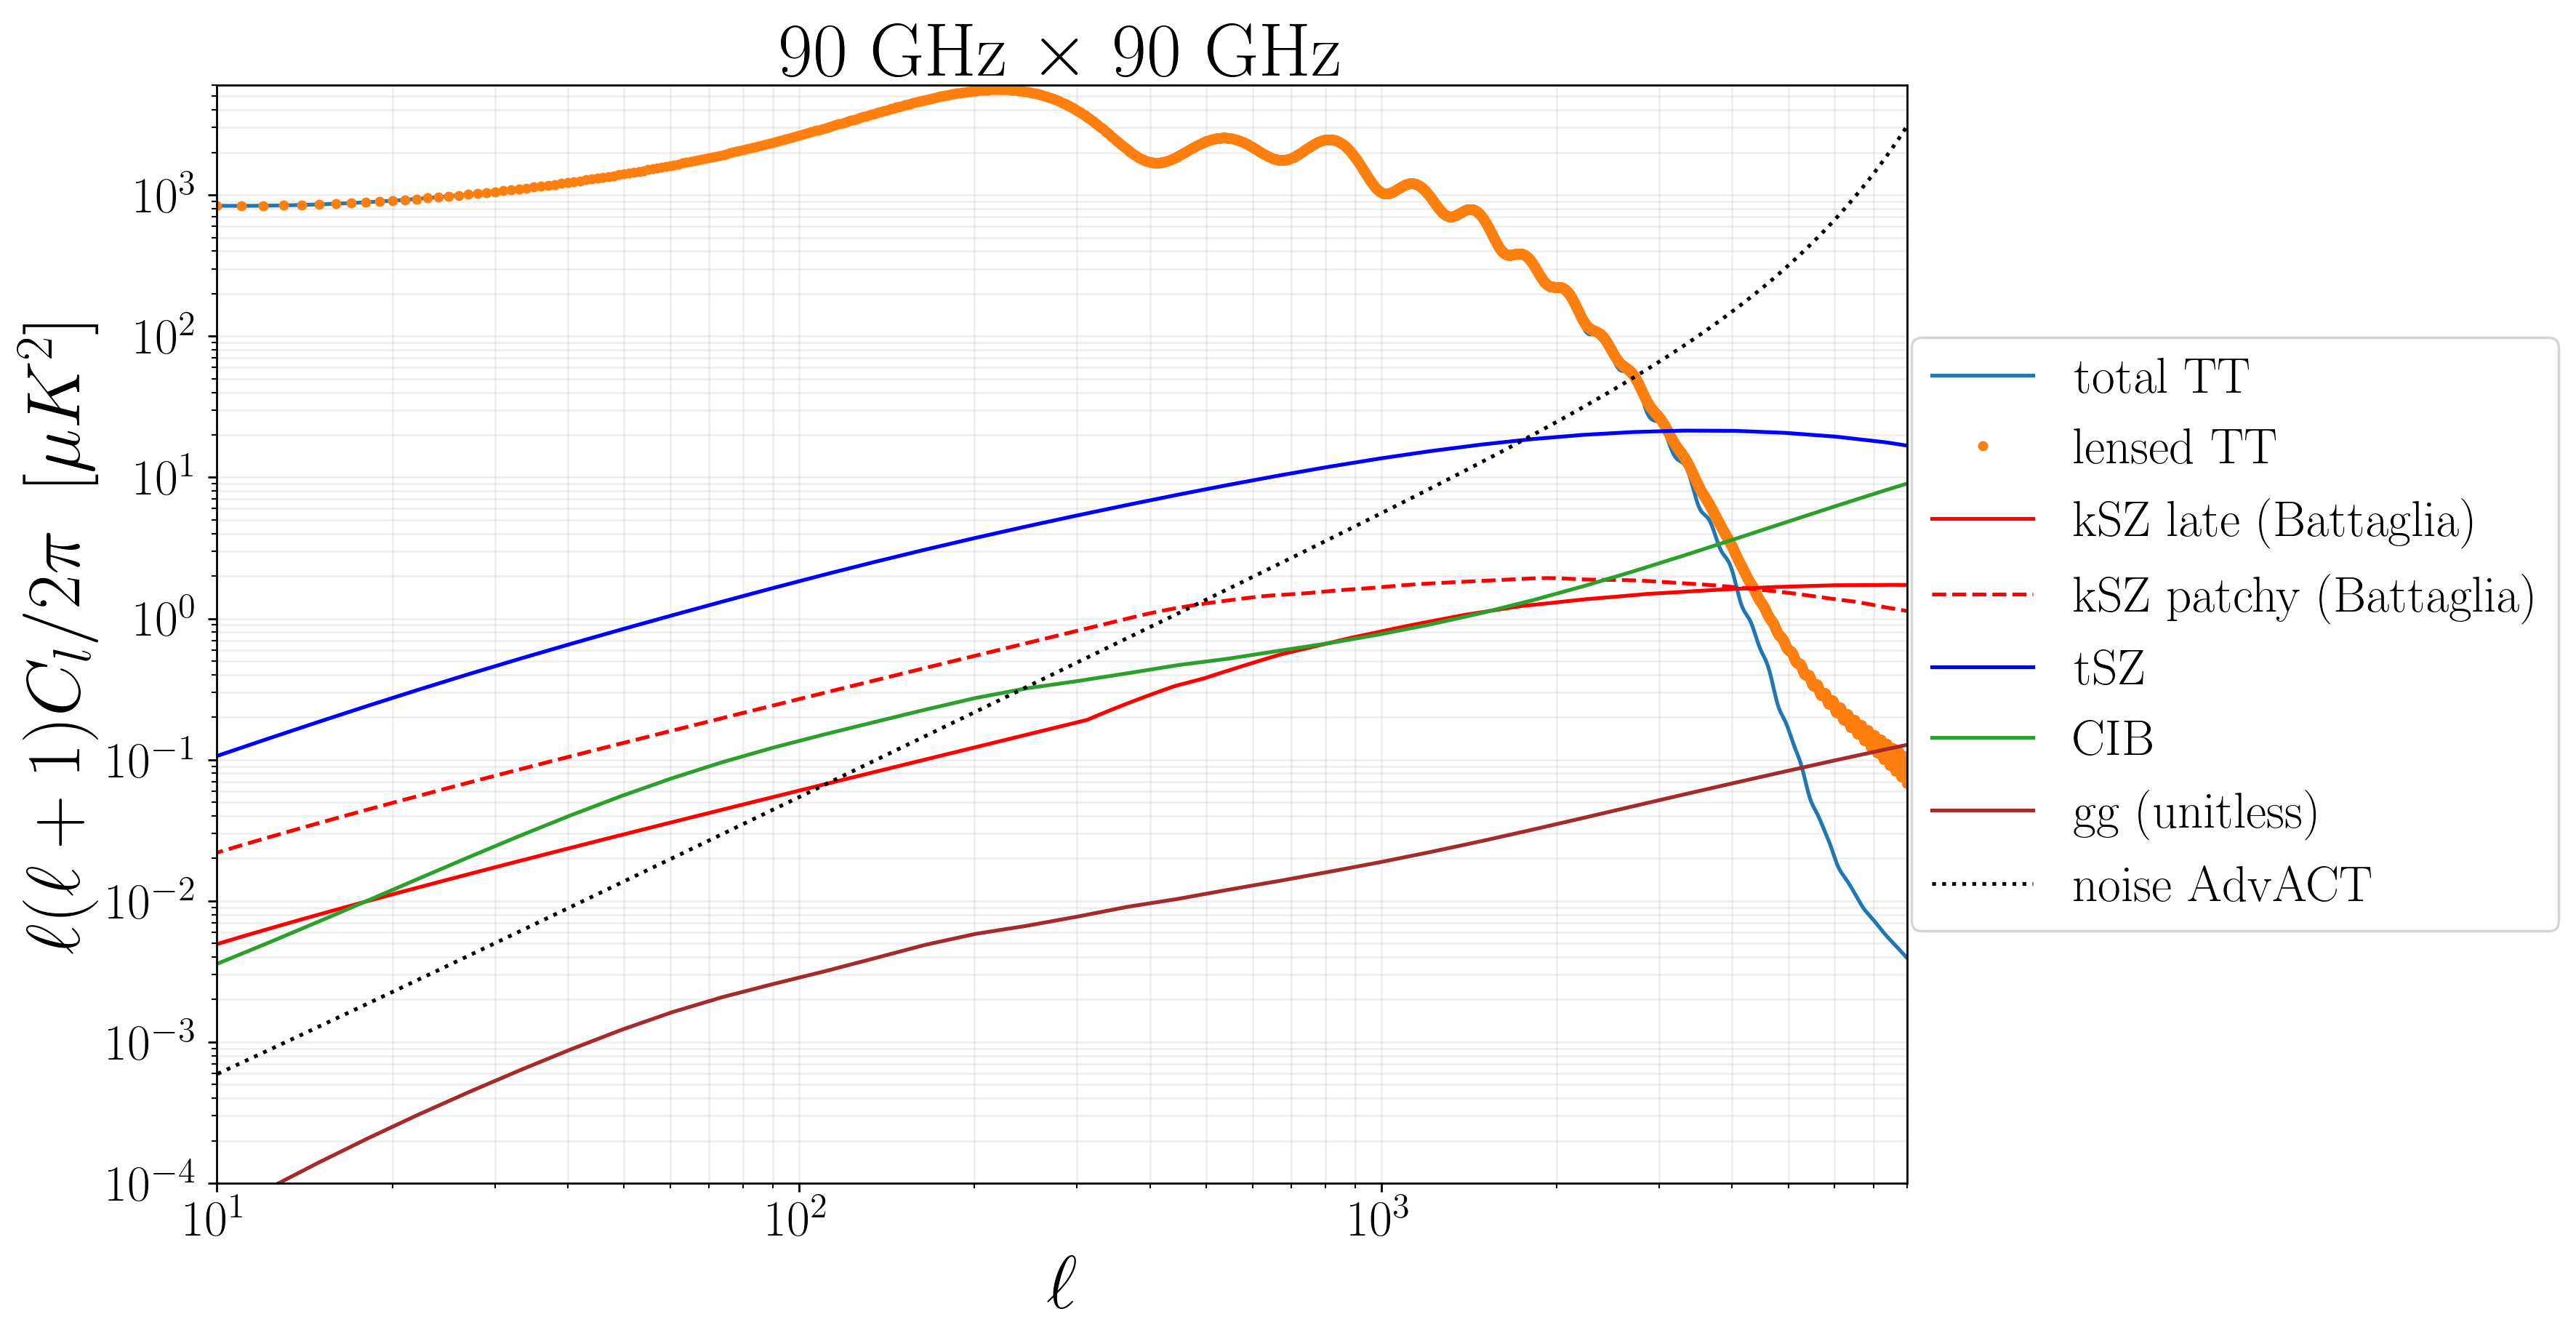

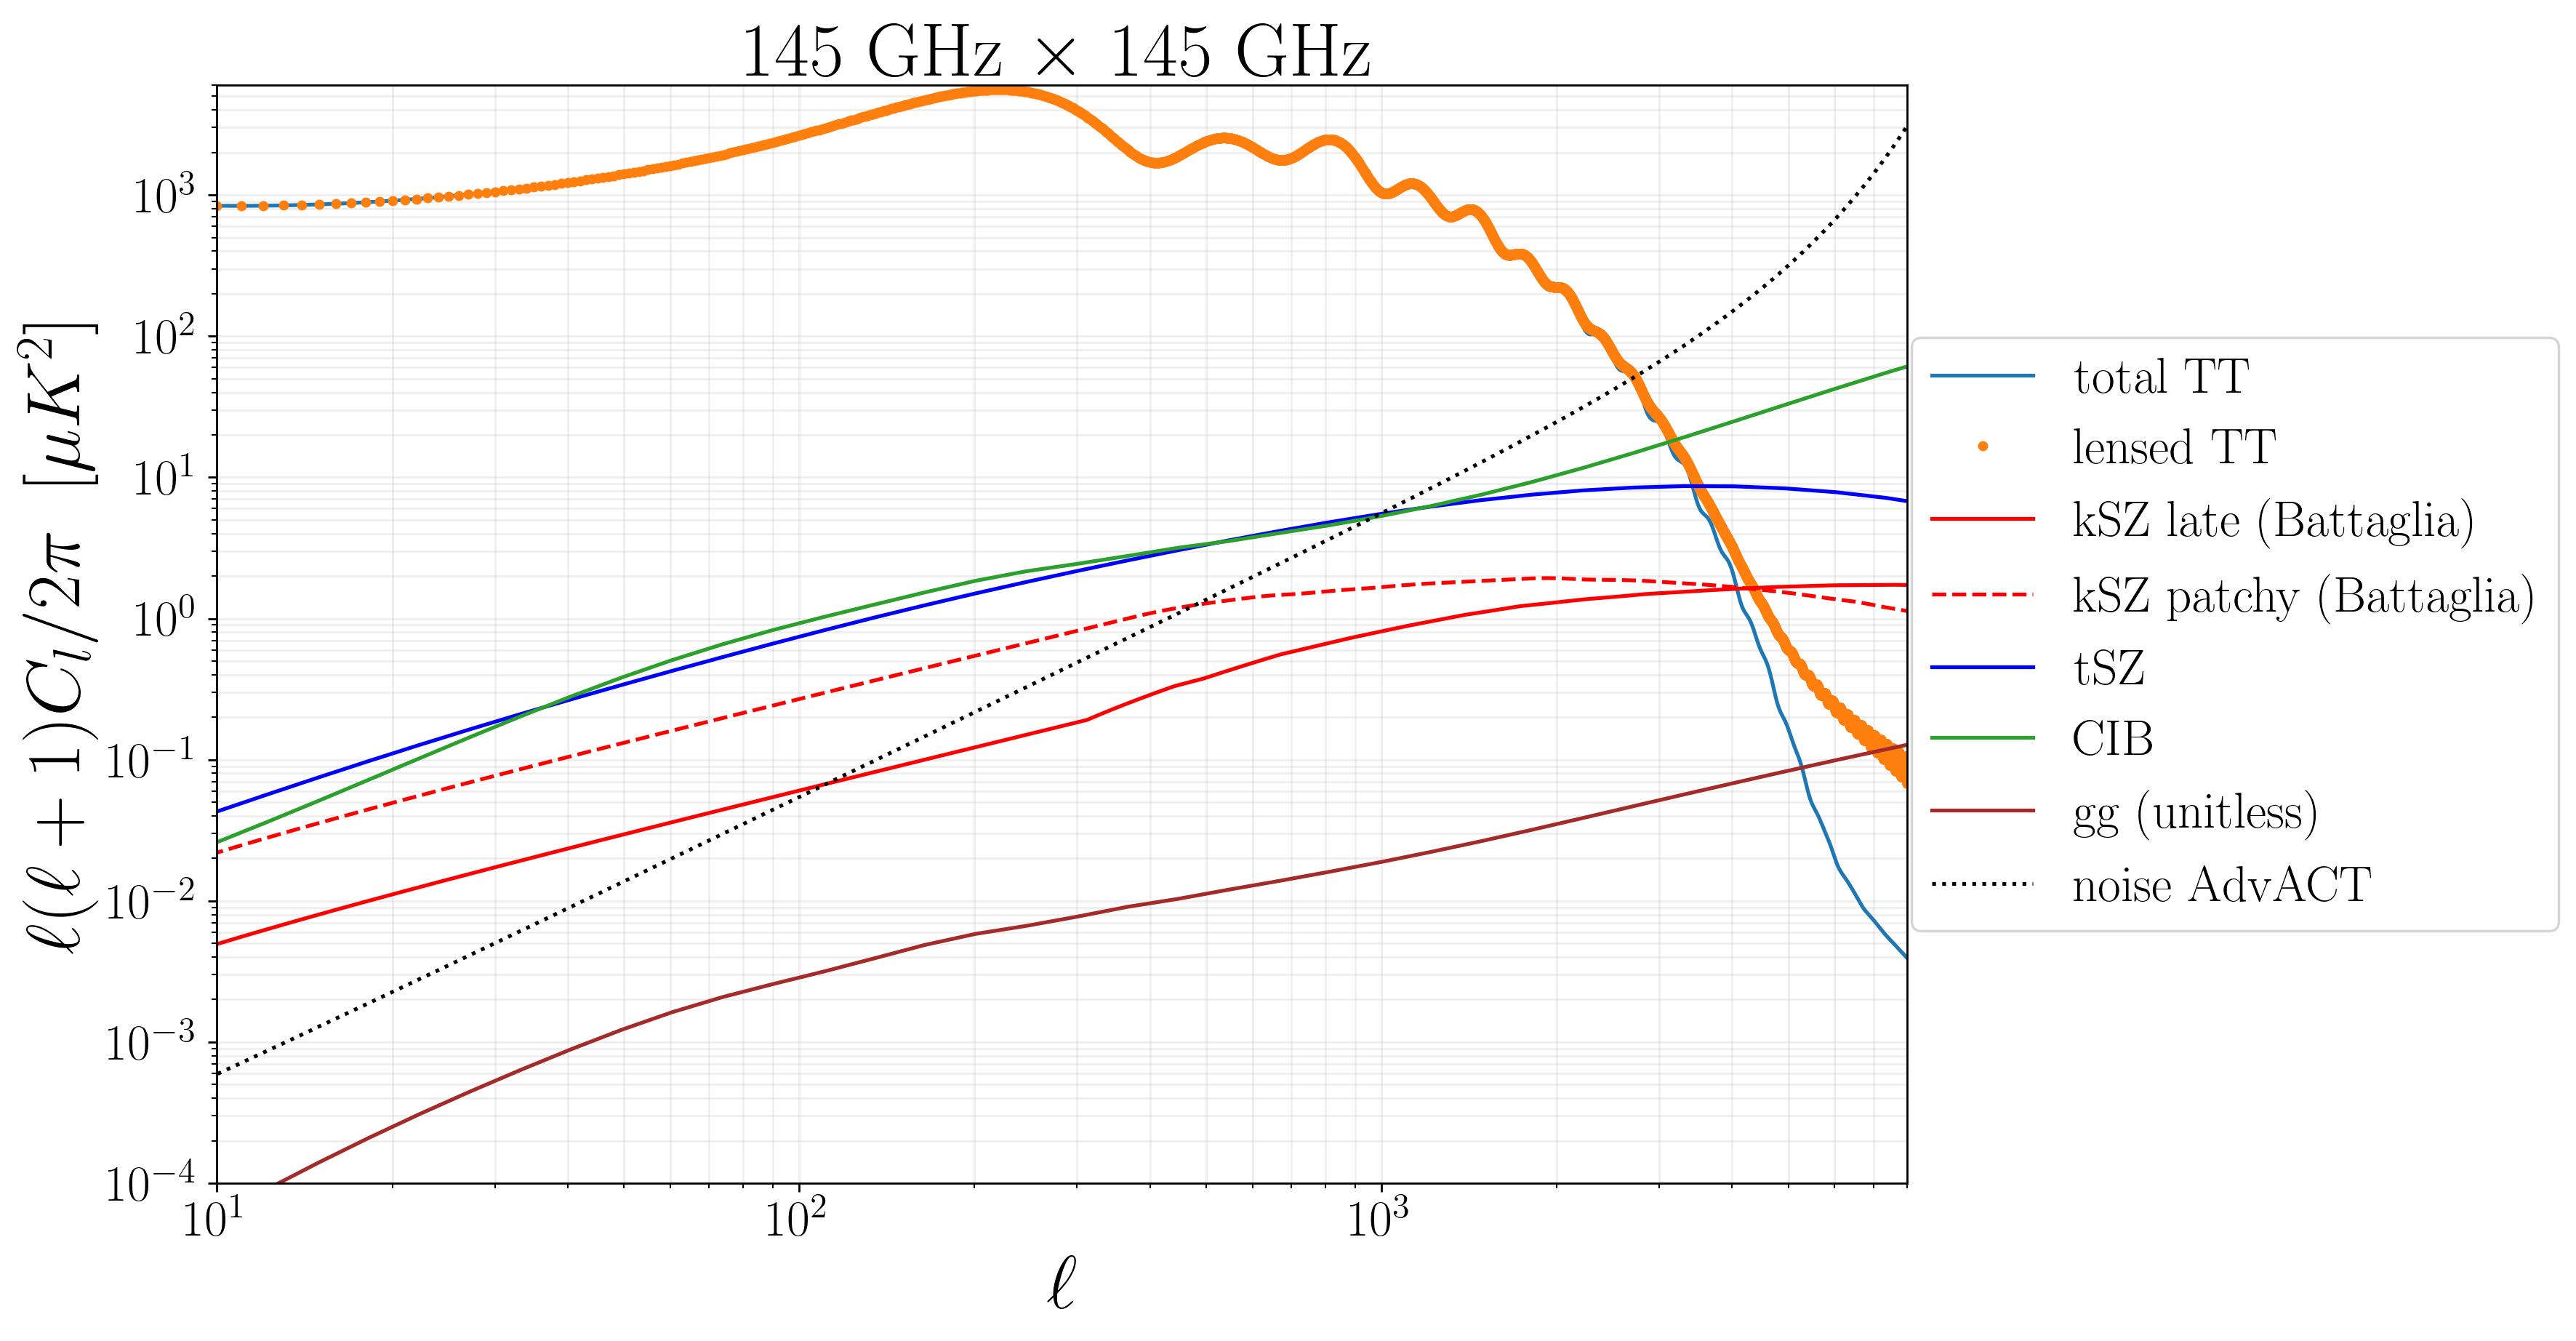

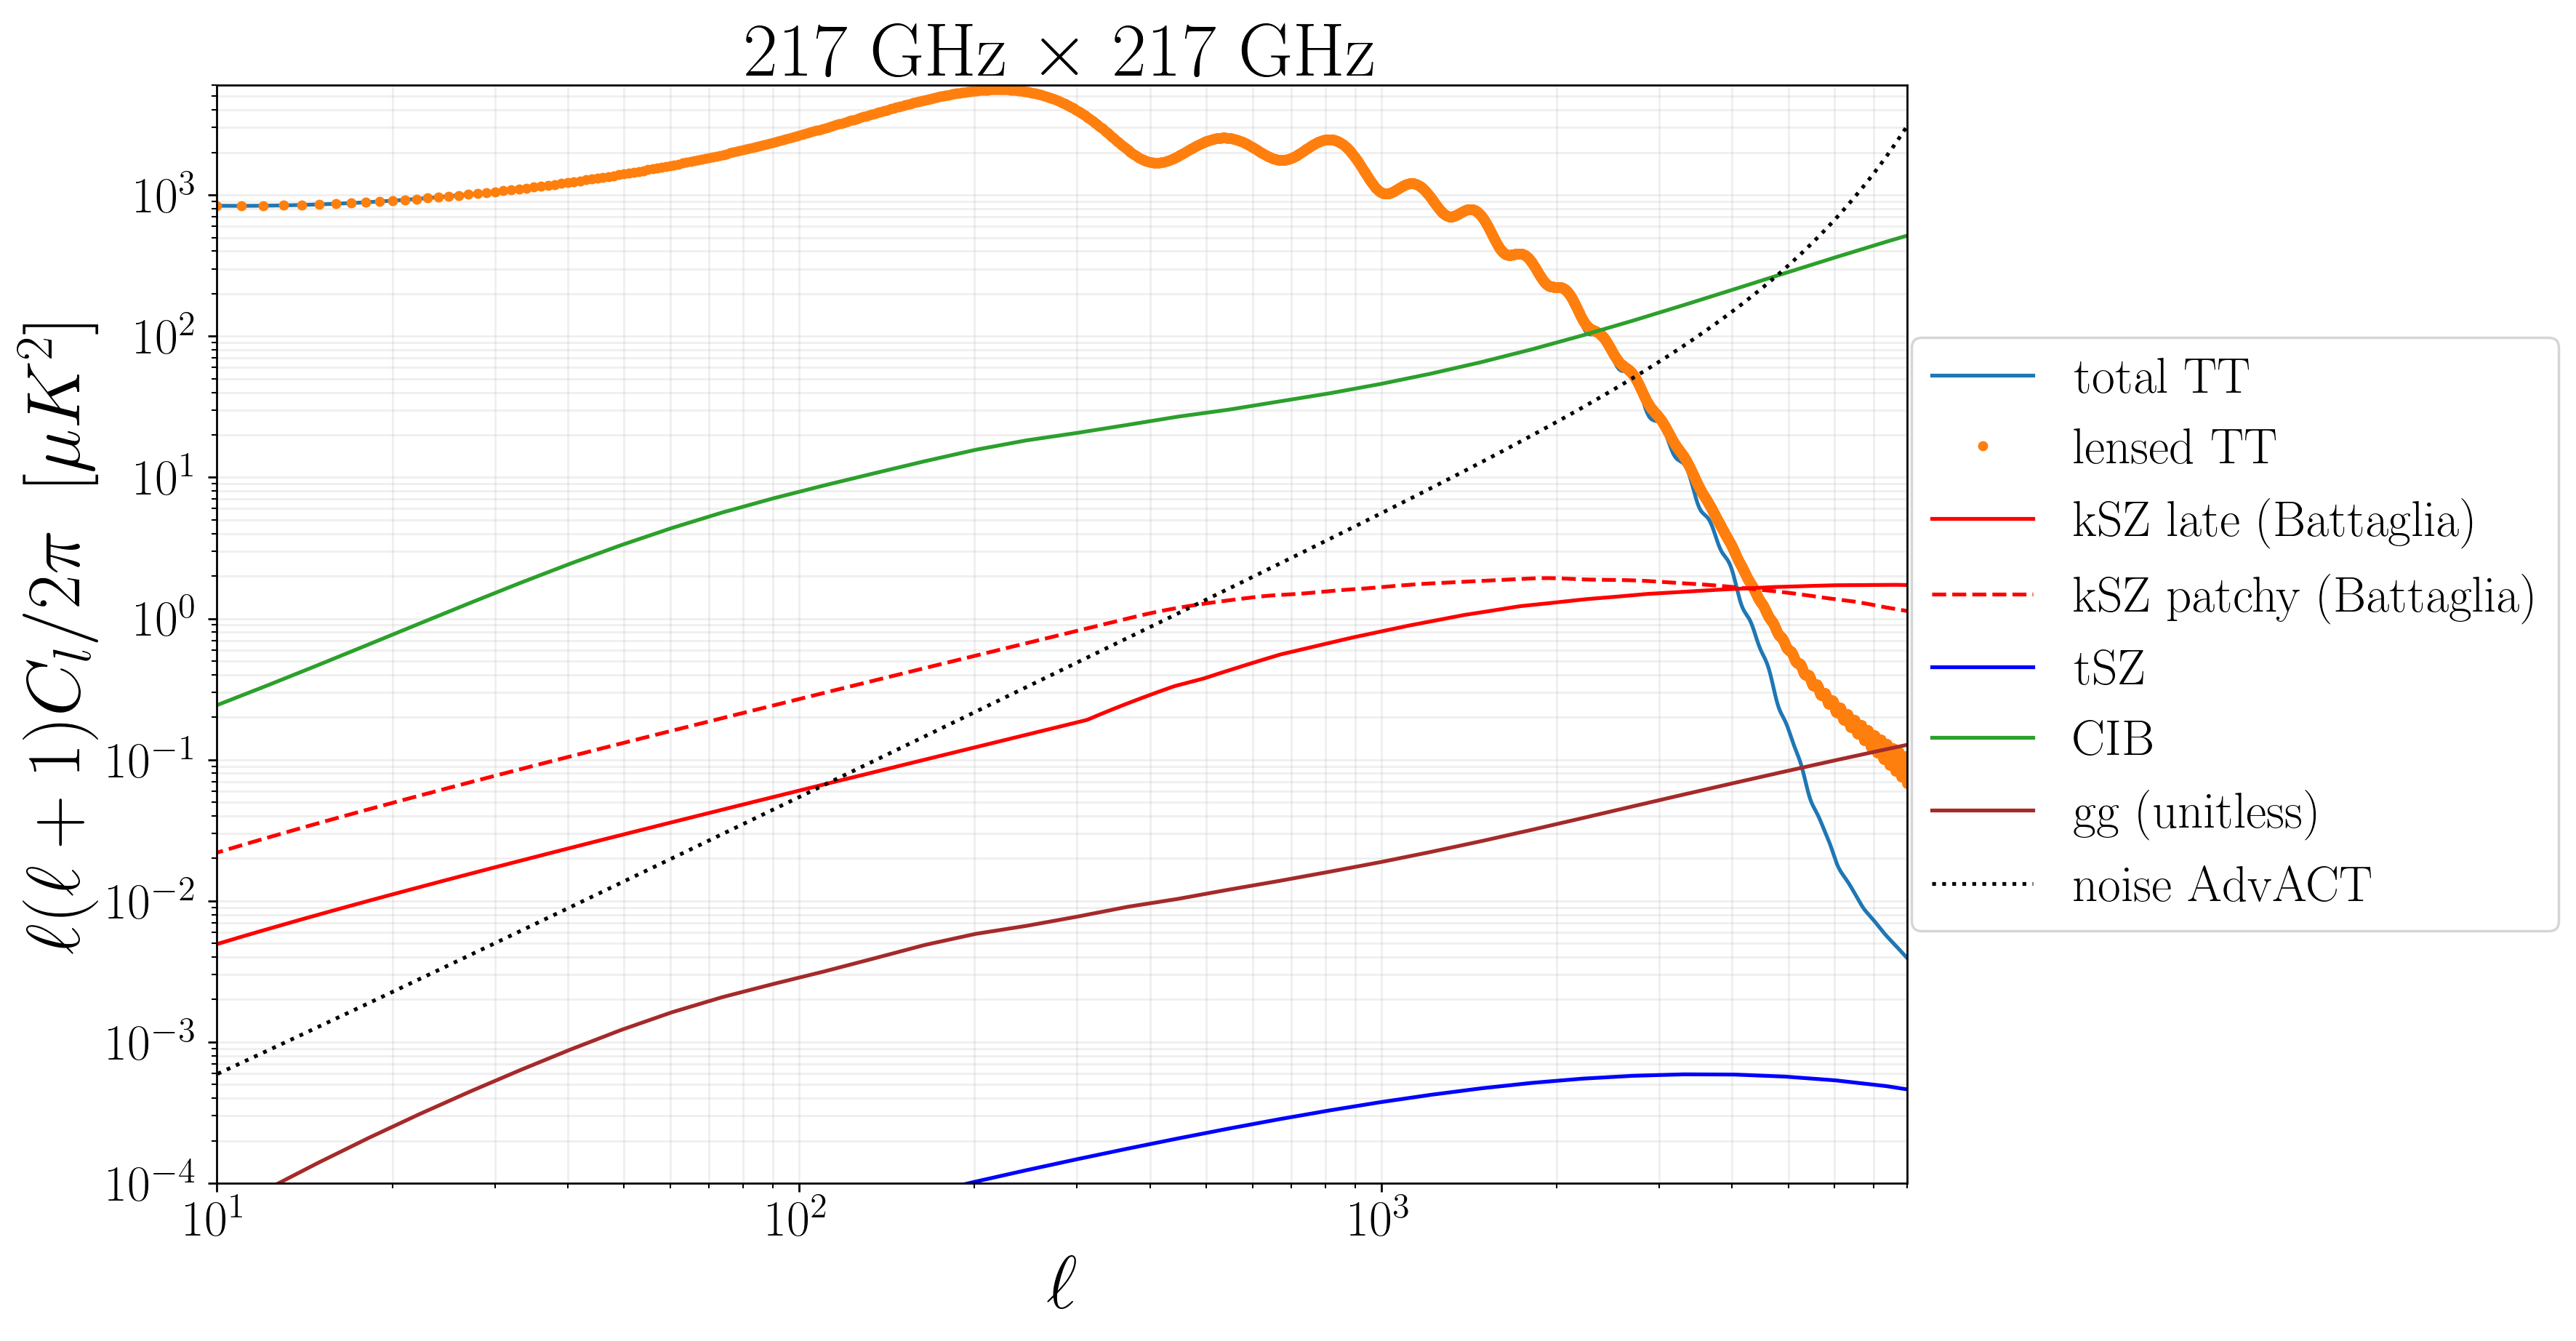

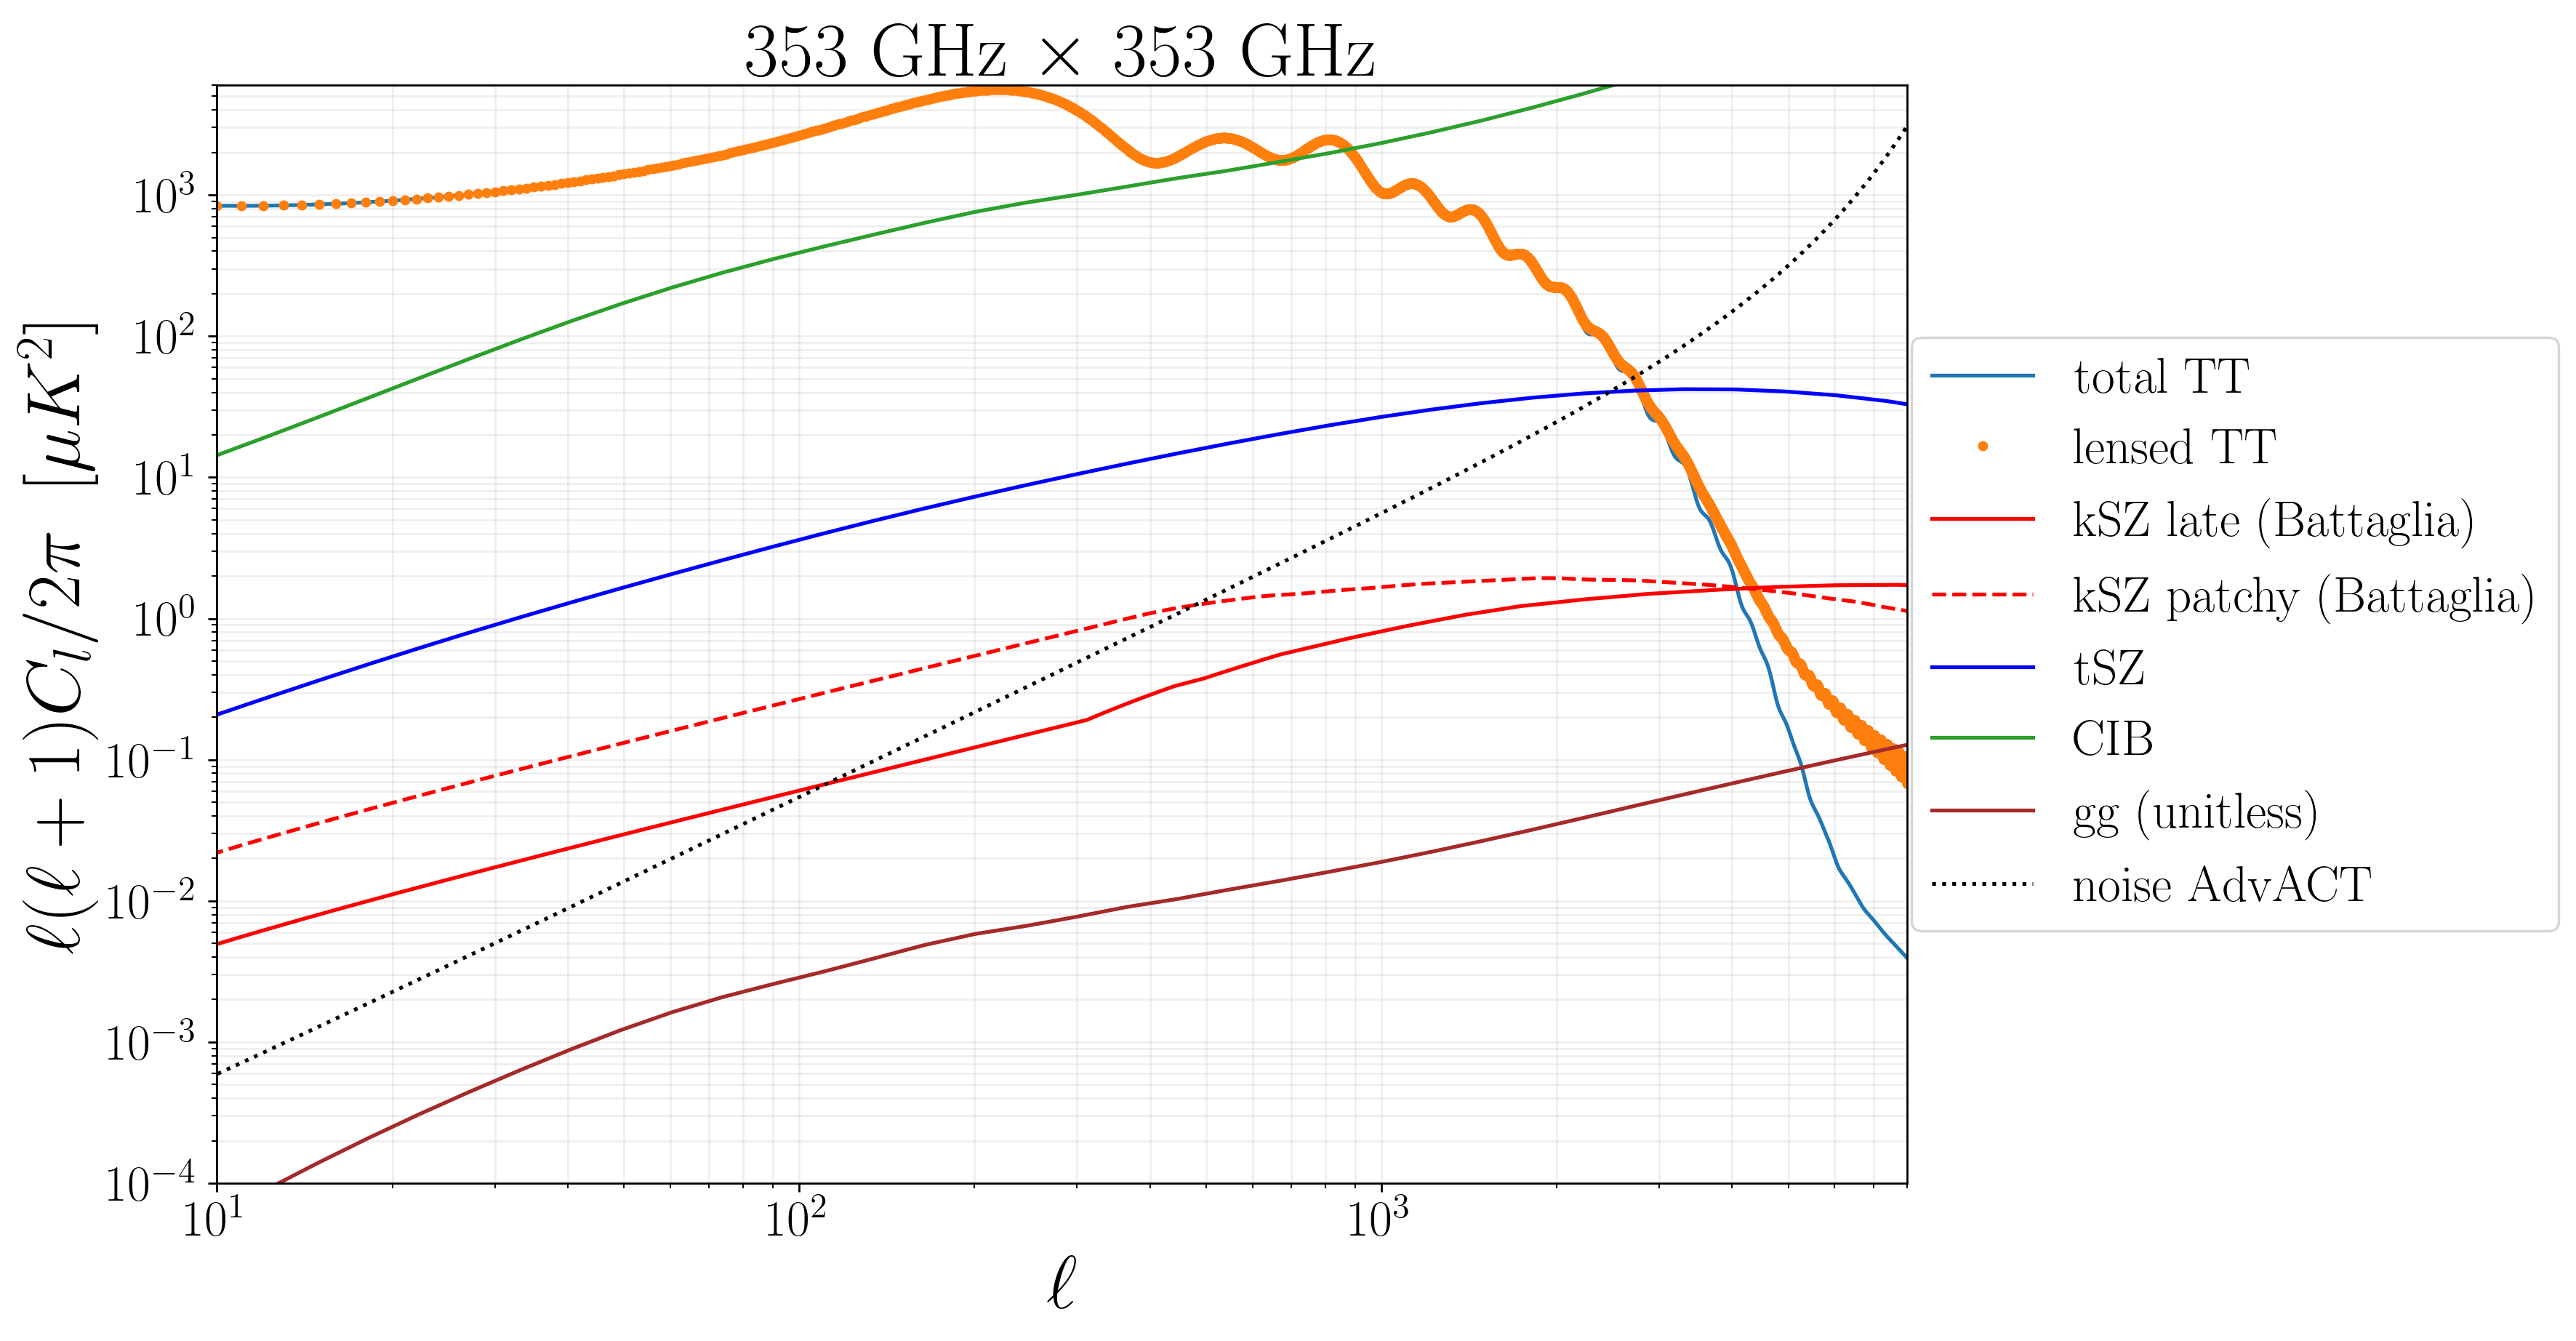

In [57]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    ## CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')
    plt.plot(ell, 1.e12*factor*cl_lensed['tt'],".",label='lensed TT')    
    ## kSZ
    #plt.plot(ell_theory_battaglia, dl_kSZ_theory_battaglia, color = "red", label = "kSZ (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZhomog[:,1], color = "red", label = "kSZ late (Battaglia) ")
    plt.plot(ell_theory_battaglia, CellkSZpatchy[:,1],"--",  color = "red", label = "kSZ patchy (Battaglia) ")

    ## tSZ
    #plt.plot(cls_tSZ[i]['ell'],cls_tSZ[i]['1h']+cls_tSZ[i]['2h'], color="blue", label=r'tSZ')
    tsz_tsz = yy*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)**2)
    plt.plot(cl_sz['ell'],tsz_tsz, color="blue", label=r'tSZ')
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
#   equiv = u.thermodynamic_temperature(nu * u.GHz, Planck15.Tcmb0)
#   CIB_uK = ((dls_cib_1h+dls_cib_2h) * u.Jy / u.sr).to(u.uK, equivalencies=equiv)  
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_cib['217x217']['ell'], CIB_uK, label=r'CIB')
    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg (unitless)')
    
   ## noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxCIB.txt", (cl_cib_cib['217x217']['ell'], CIB_uK))
    np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxtSZ.txt", (cl_sz['ell'],tsz_tsz))
np.savetxt(path_save+"ell_dl_CMB_lensed.txt", (ell, 1.e12*factor*cl_lensed['tt']))
np.savetxt(path_save+"ell_dl_CMB.txt", (ell, 1.e12*factor*cl_tot['tt']))
np.savetxt(path_save+"ell_dl_gg.txt", (cl_gg_ell, cl_gg_1h+cl_gg_2h))


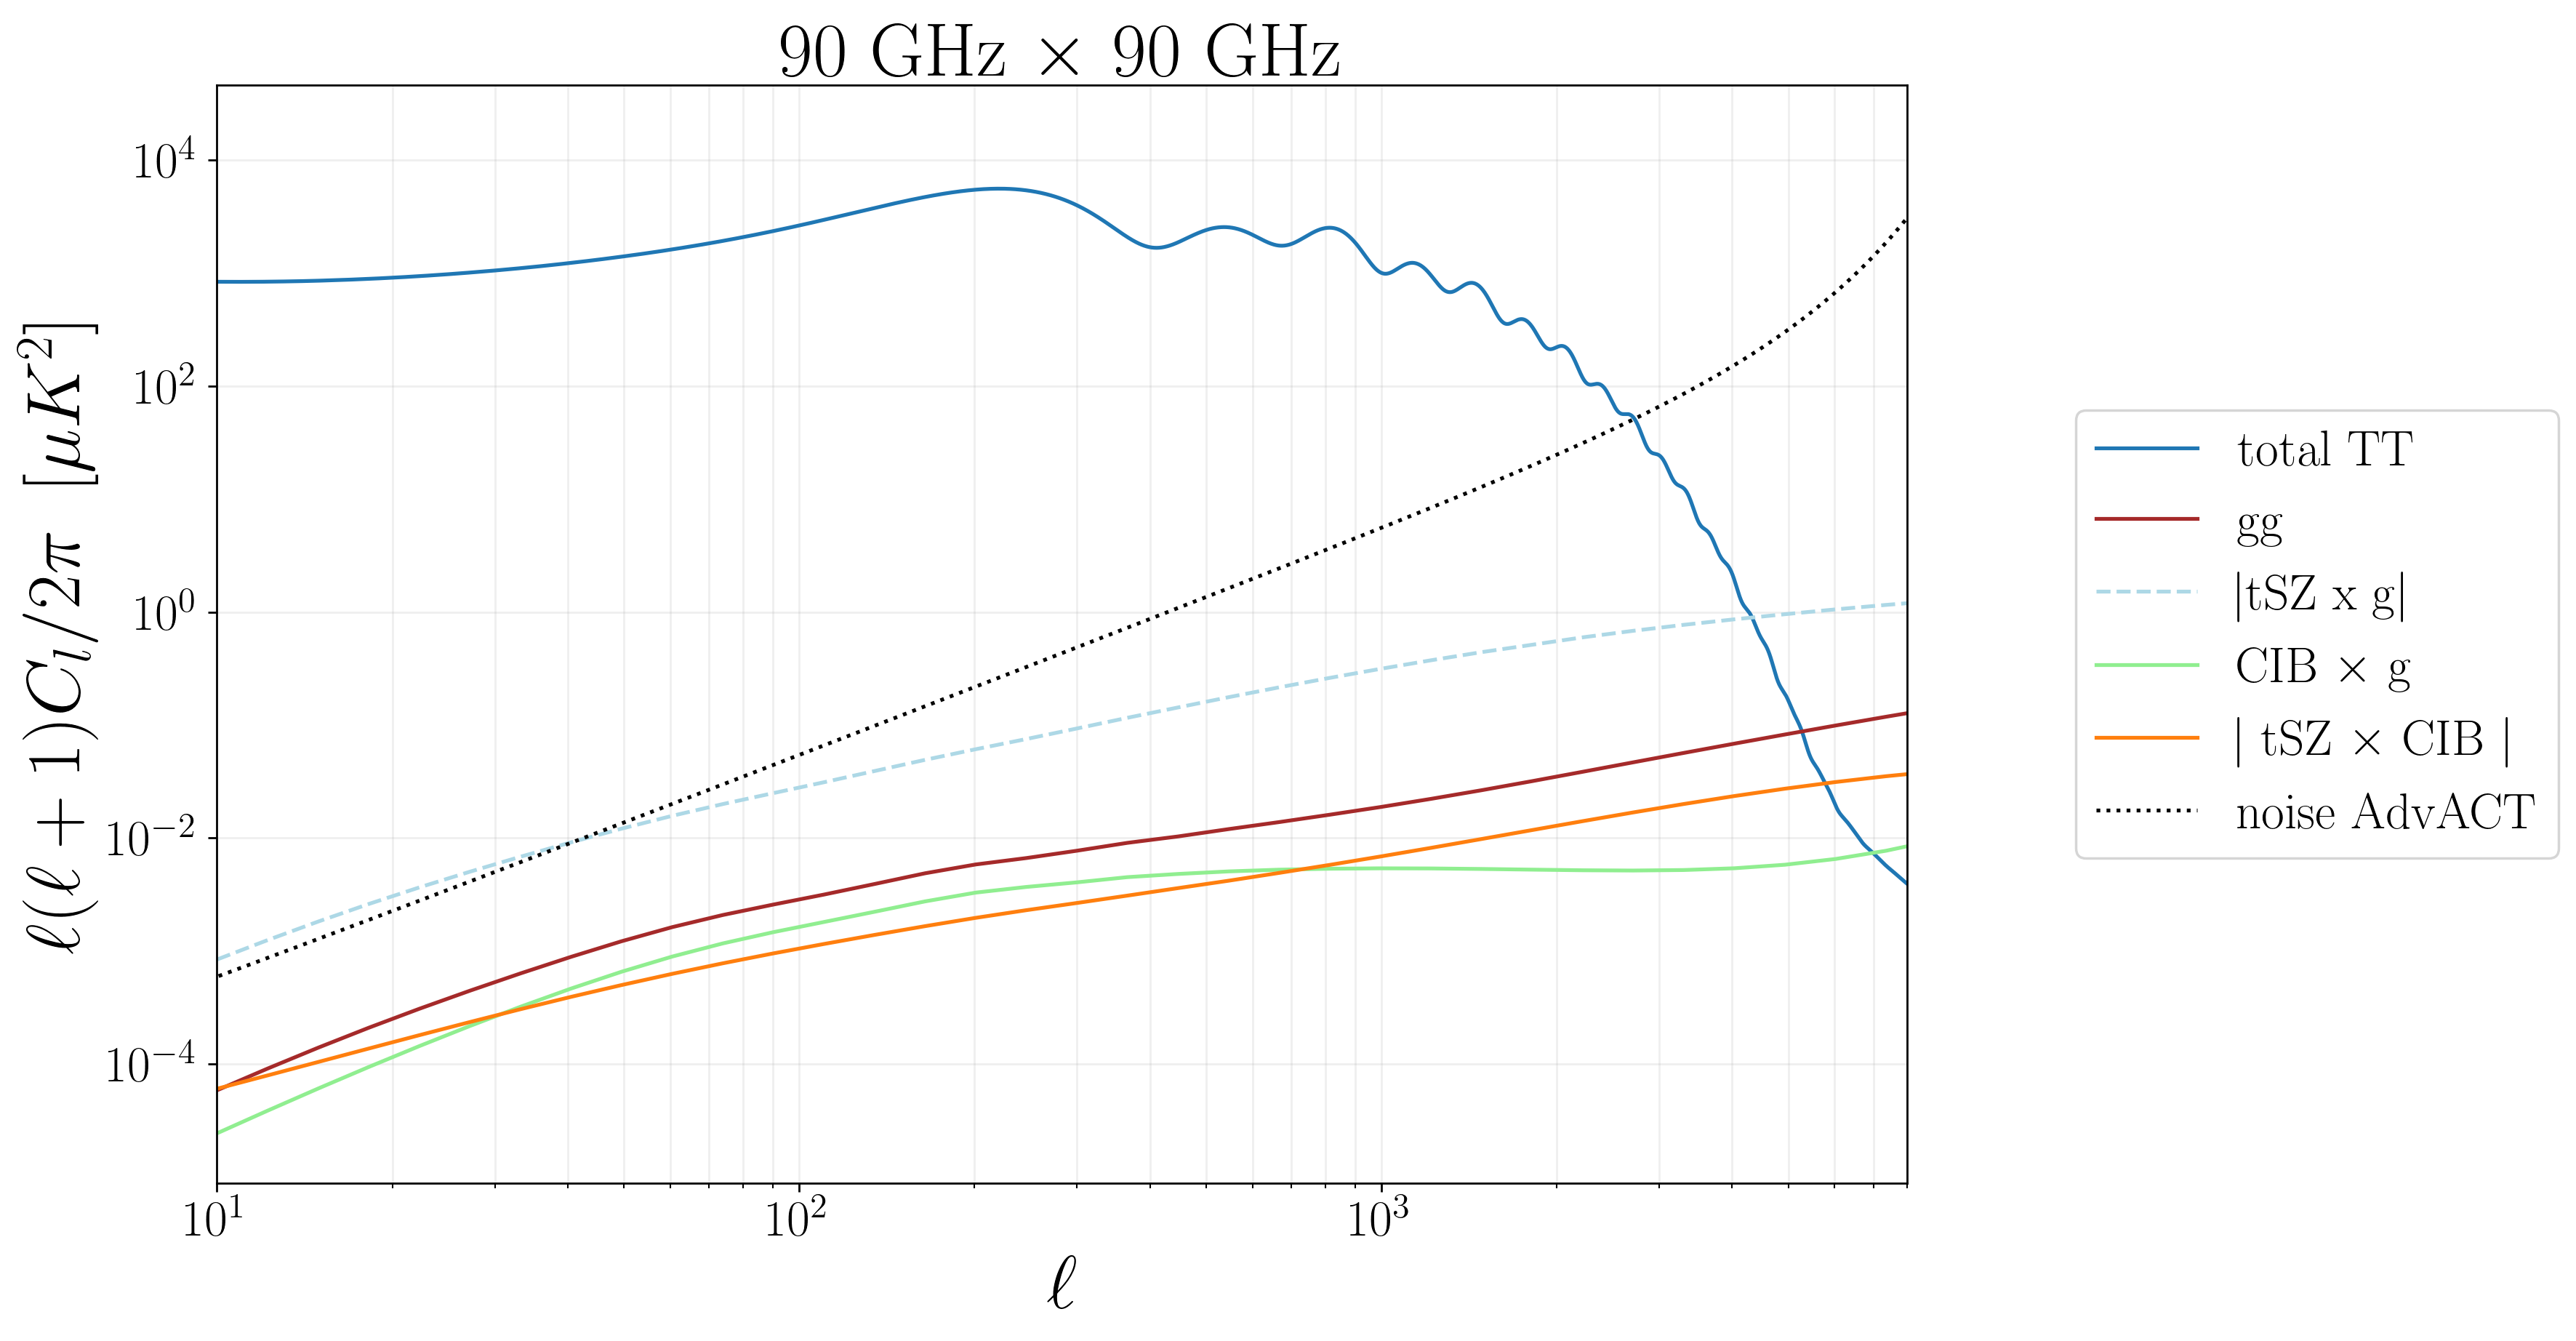

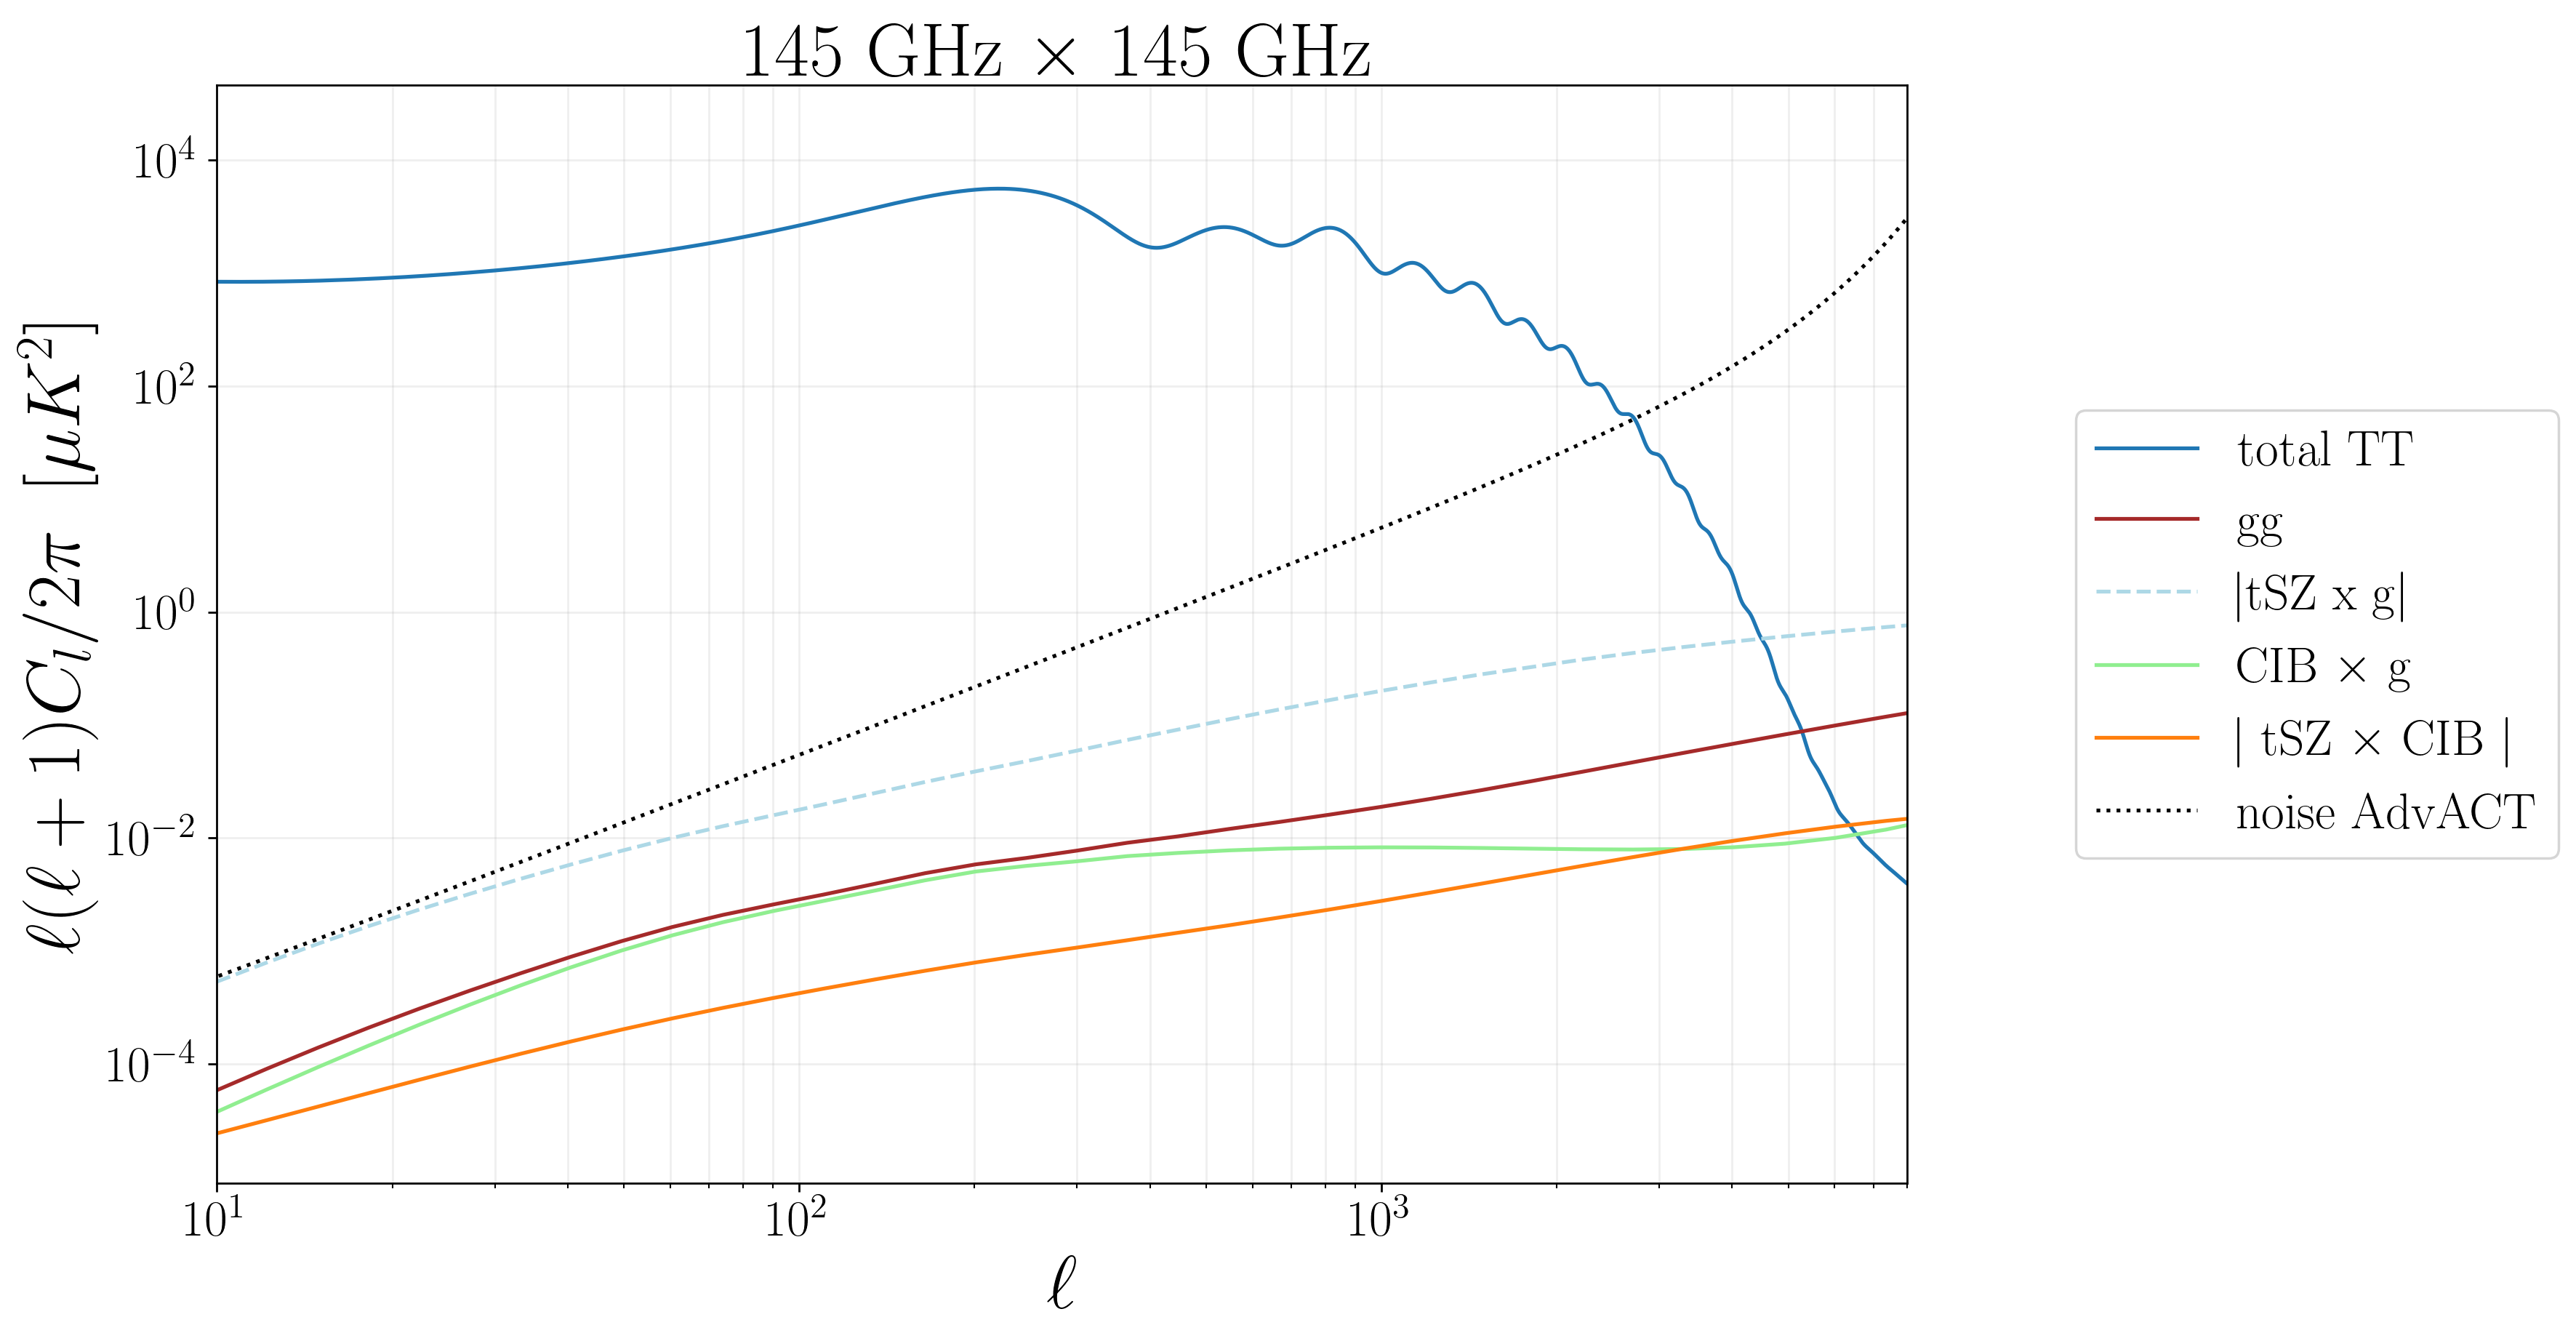

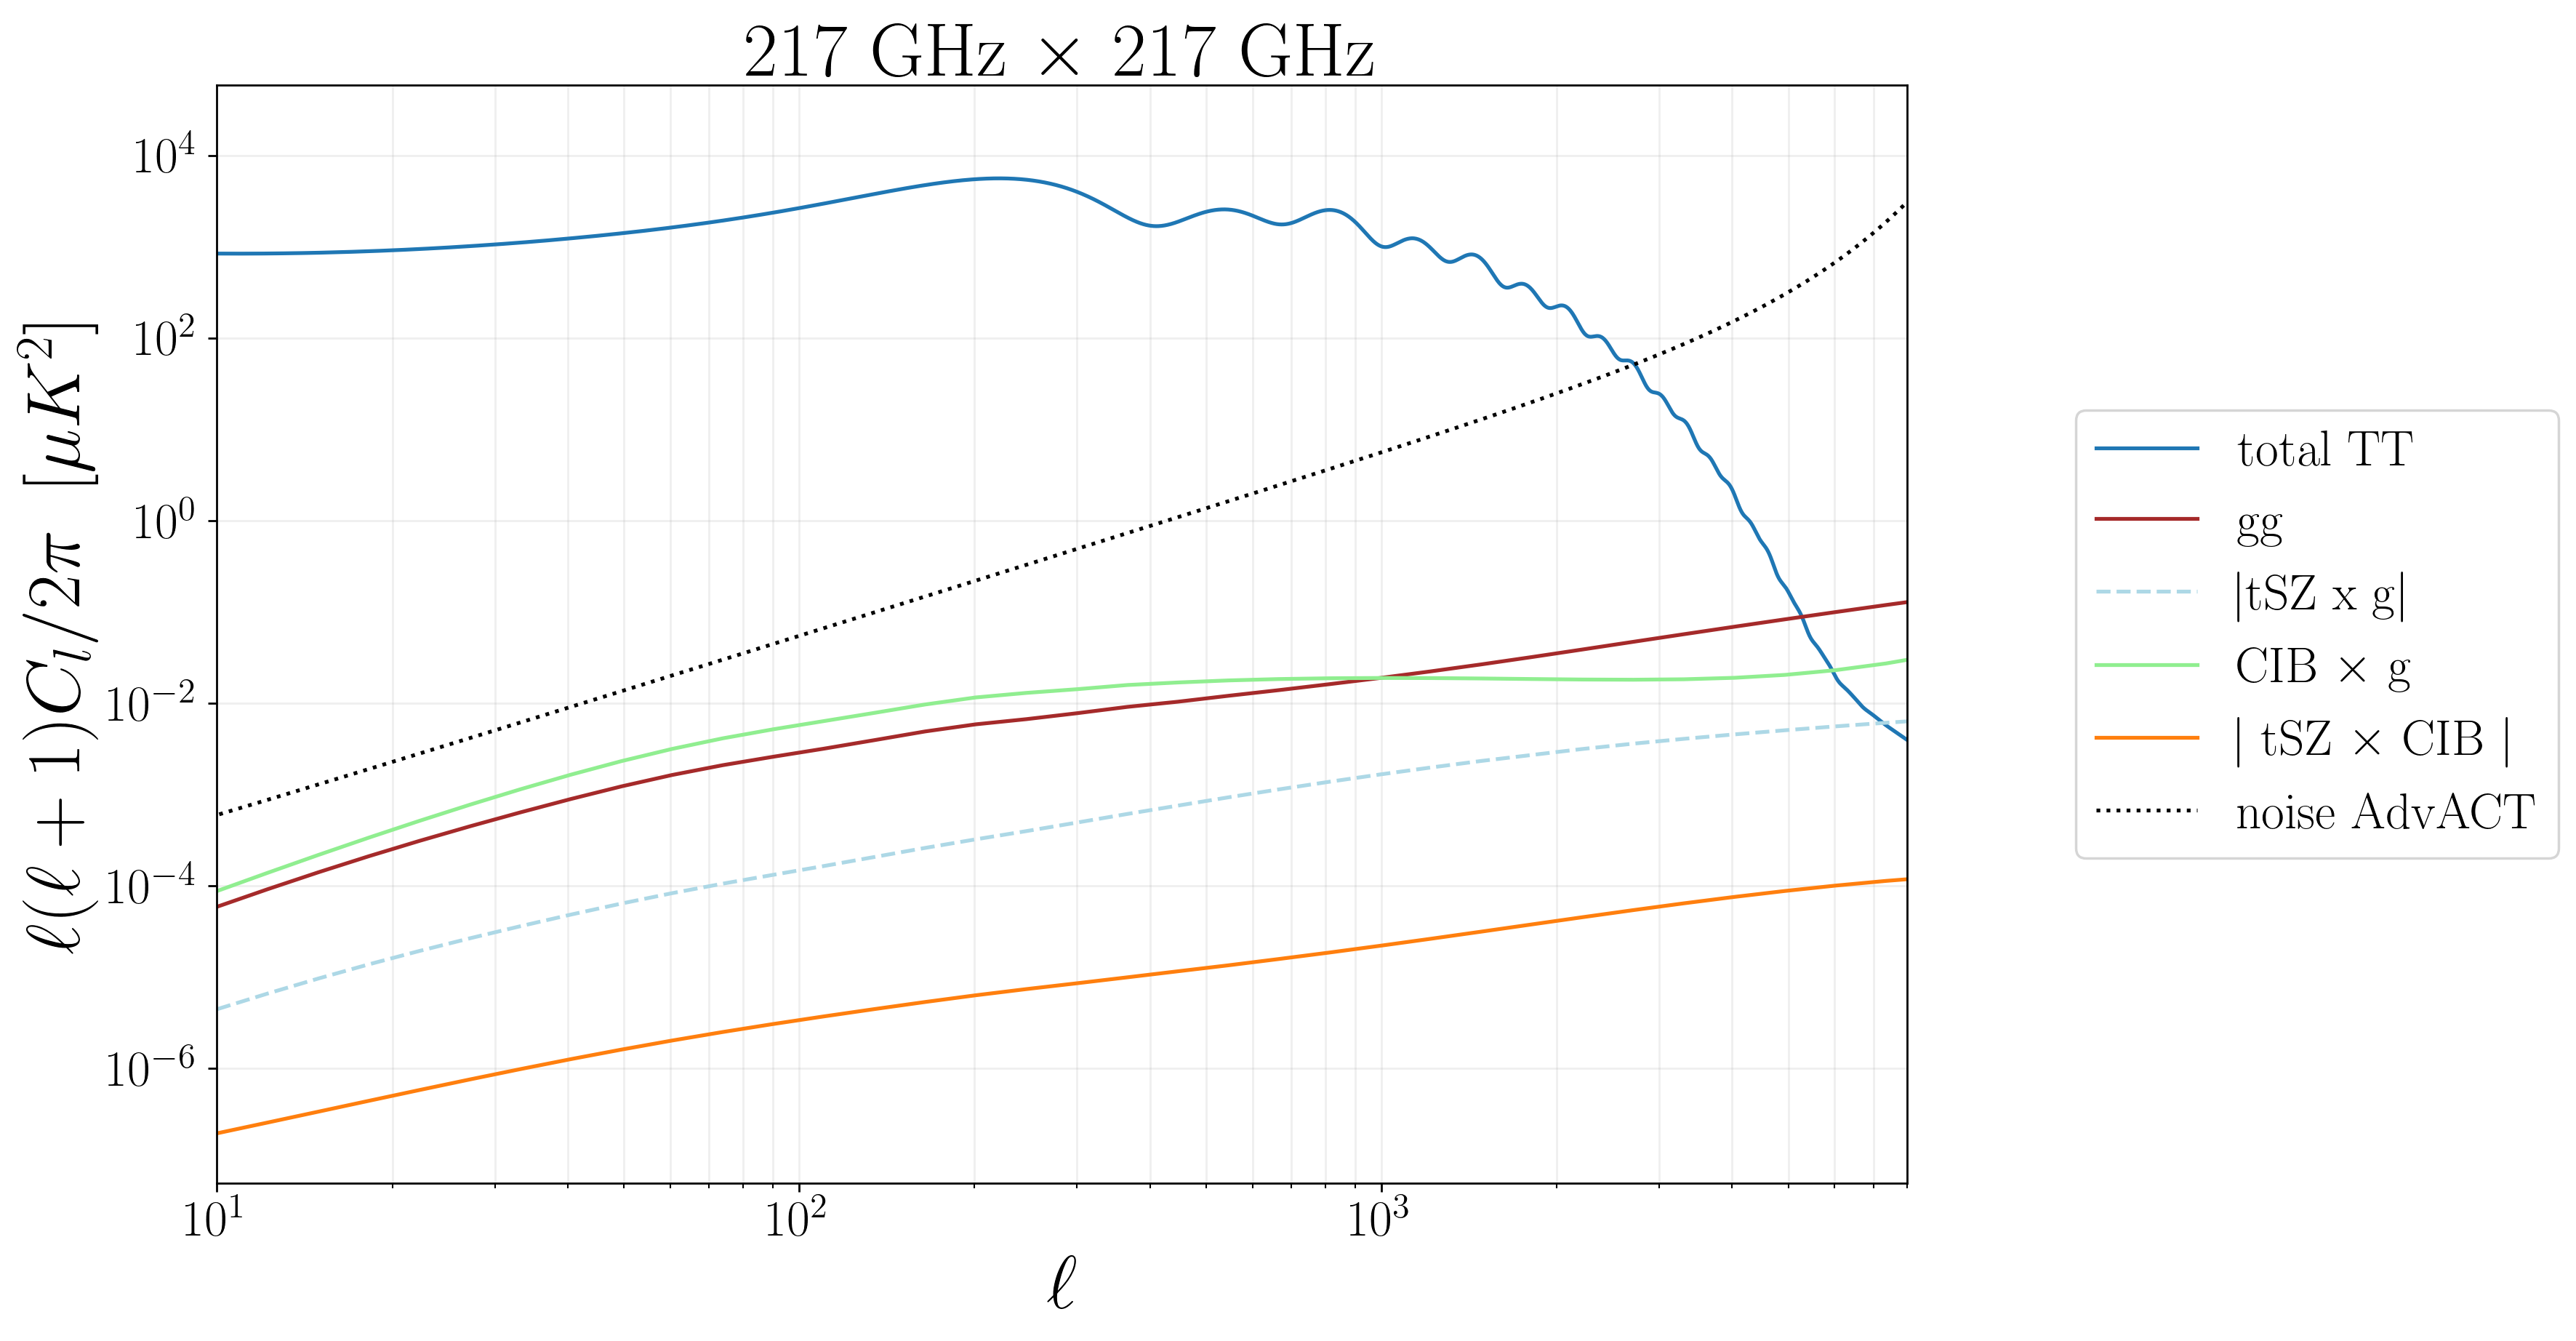

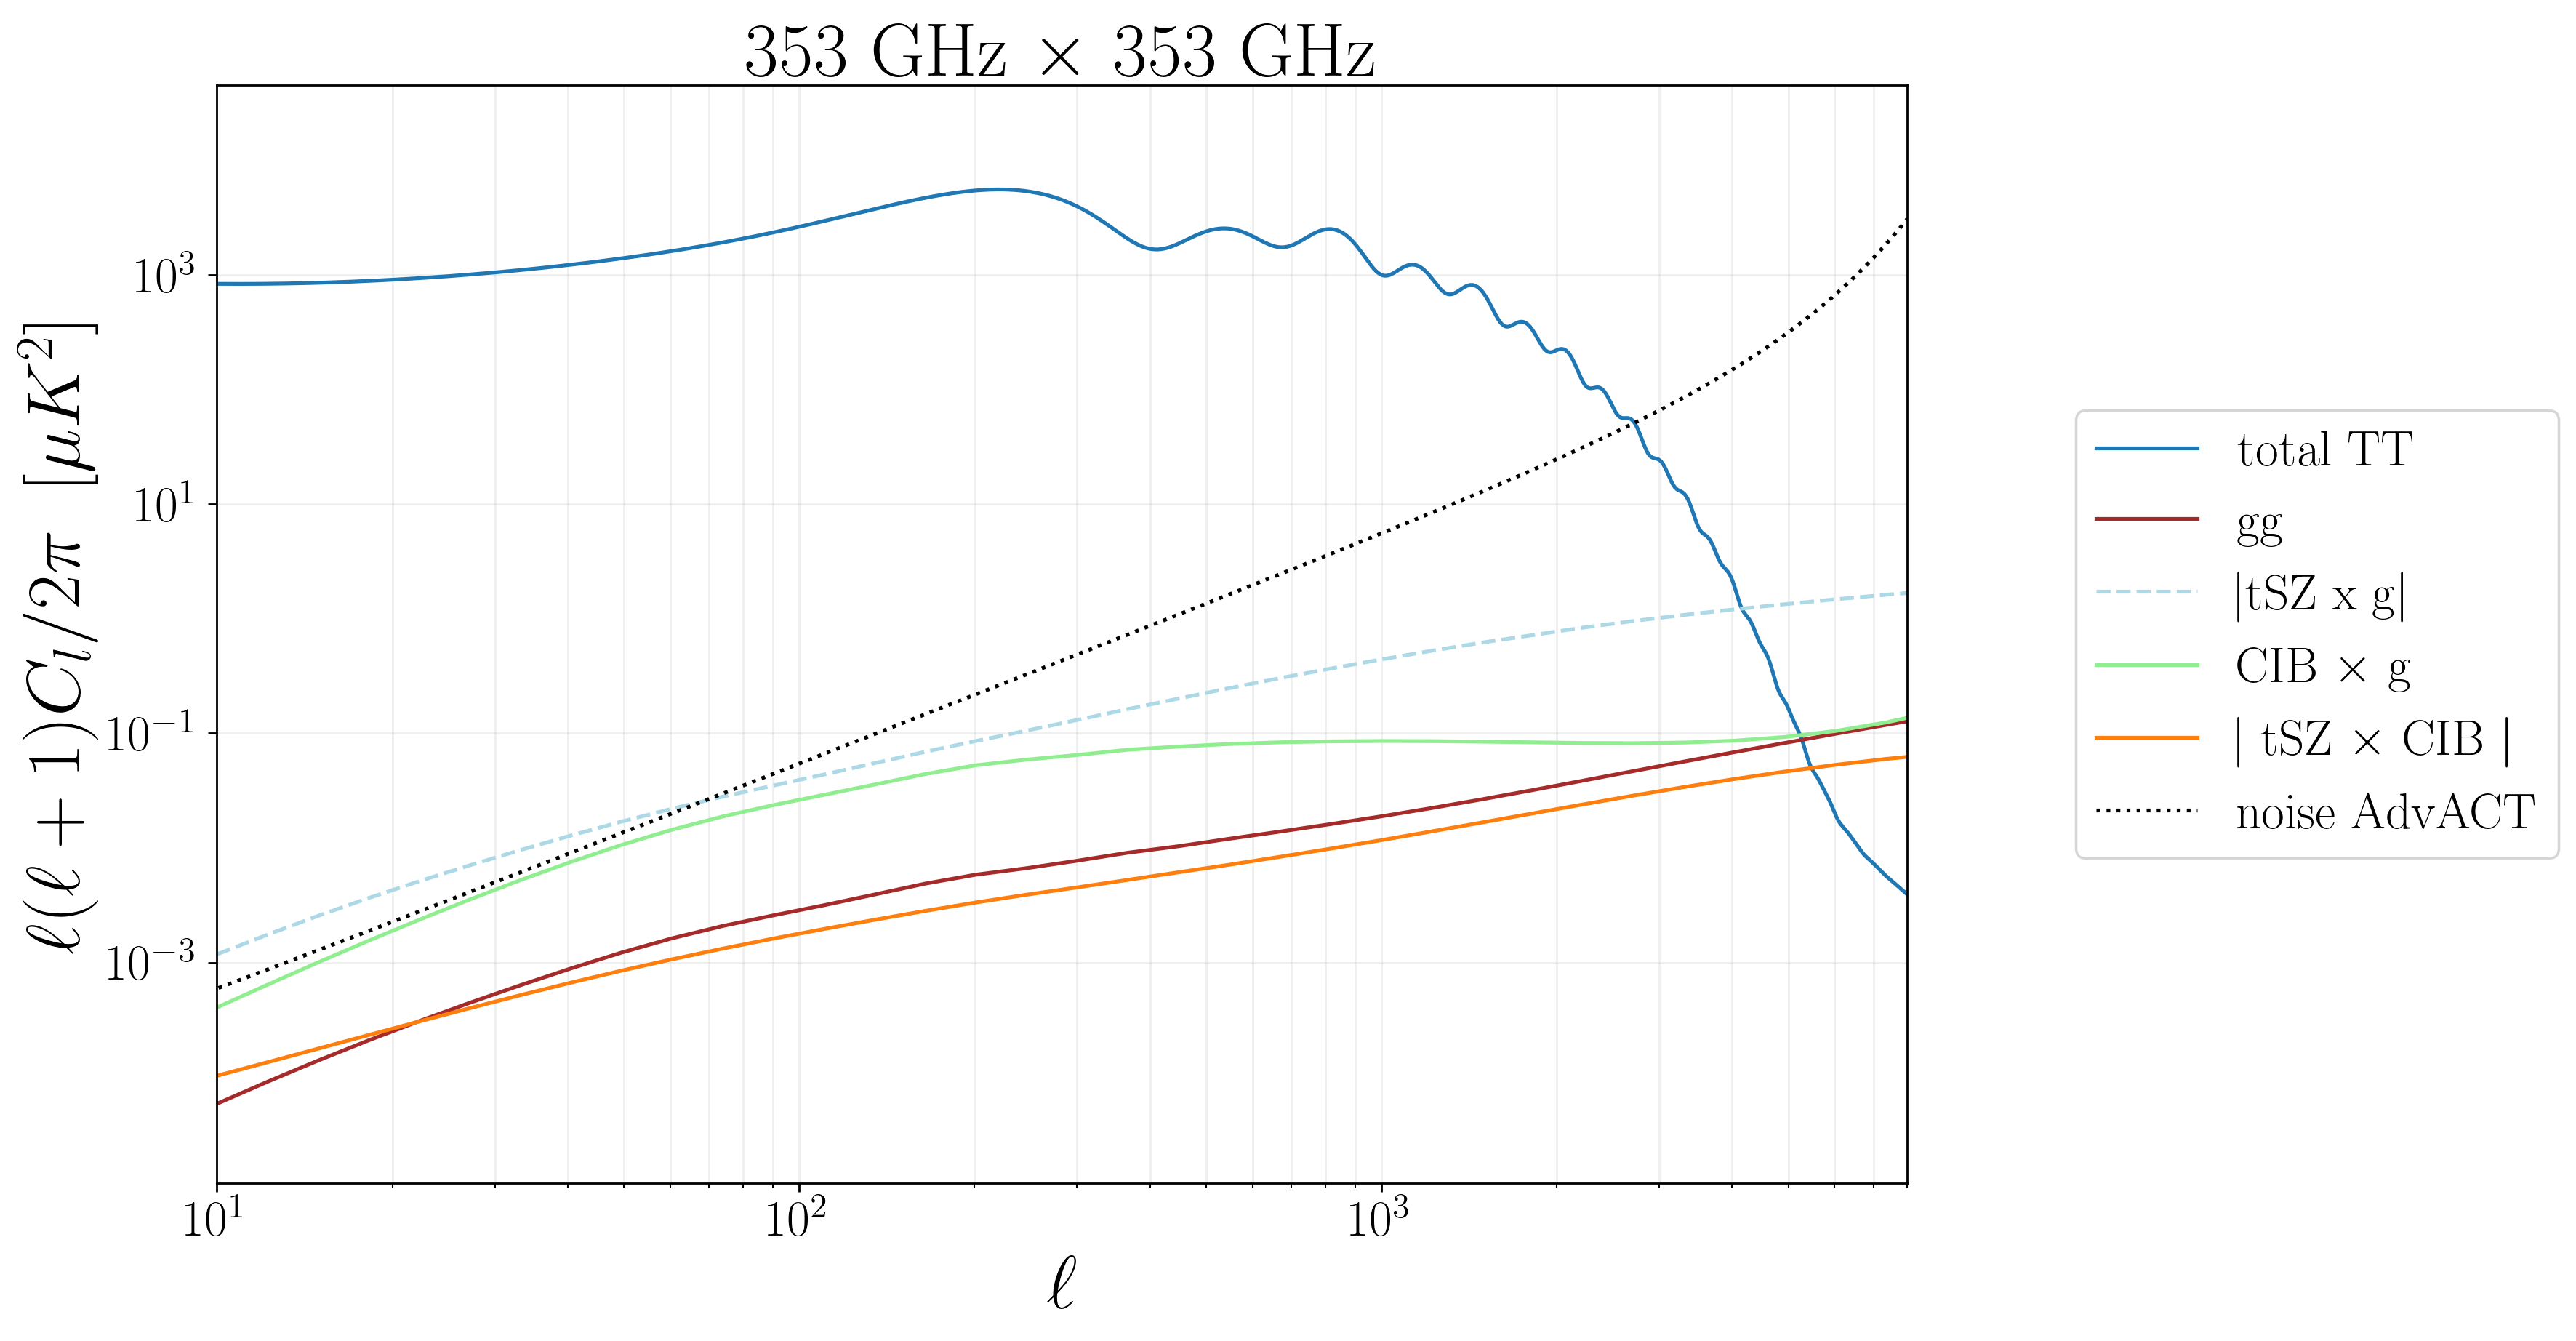

In [58]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=250)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    
    # CMB
    plt.plot(ell, 1.e12*factor*cl_tot['tt'],label='total TT')  
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    # tSZ x g
    yg = np.asarray(cl_yg['1h'])+np.asarray(cl_yg['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    plt.plot(cl_yg['ell'],abs(tSZg_uK), "--",color="lightblue", label=r'$|$tSZ x g$|$')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g['217']['ell'], CIBg_uK , color="lightgreen", label=r'CIB $\times$ g')

    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)*tSZ_spectral_funct_at_nu_in_GHz(nu)/ convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, abs(CIBtSZ_uK), label=r'$|$ tSZ $\times$ CIB $|$')
    
    #noise
    plt.plot(ell_noise, ell_noise*(ell_noise+1)*cl_noise/2/np.pi, ":", color = "black", label="noise AdvACT")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

    ##Save the curves
    np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxCIB.txt", (ell_tsz_cib, CIBtSZ_uK))
    np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_tSZxg.txt", (cl_yg['ell'], tSZg_uK))
    np.savetxt(path_save+'ell_dl_'+str(nu)+'x'+str(nu)+"_GHz_CIBxg.txt", (cl_cib_g['217']['ell'], CIBg_uK))


# Plot cross frequencies 

## CIB x CIB

145x90
217x90
217x145
353x90
353x145
353x217


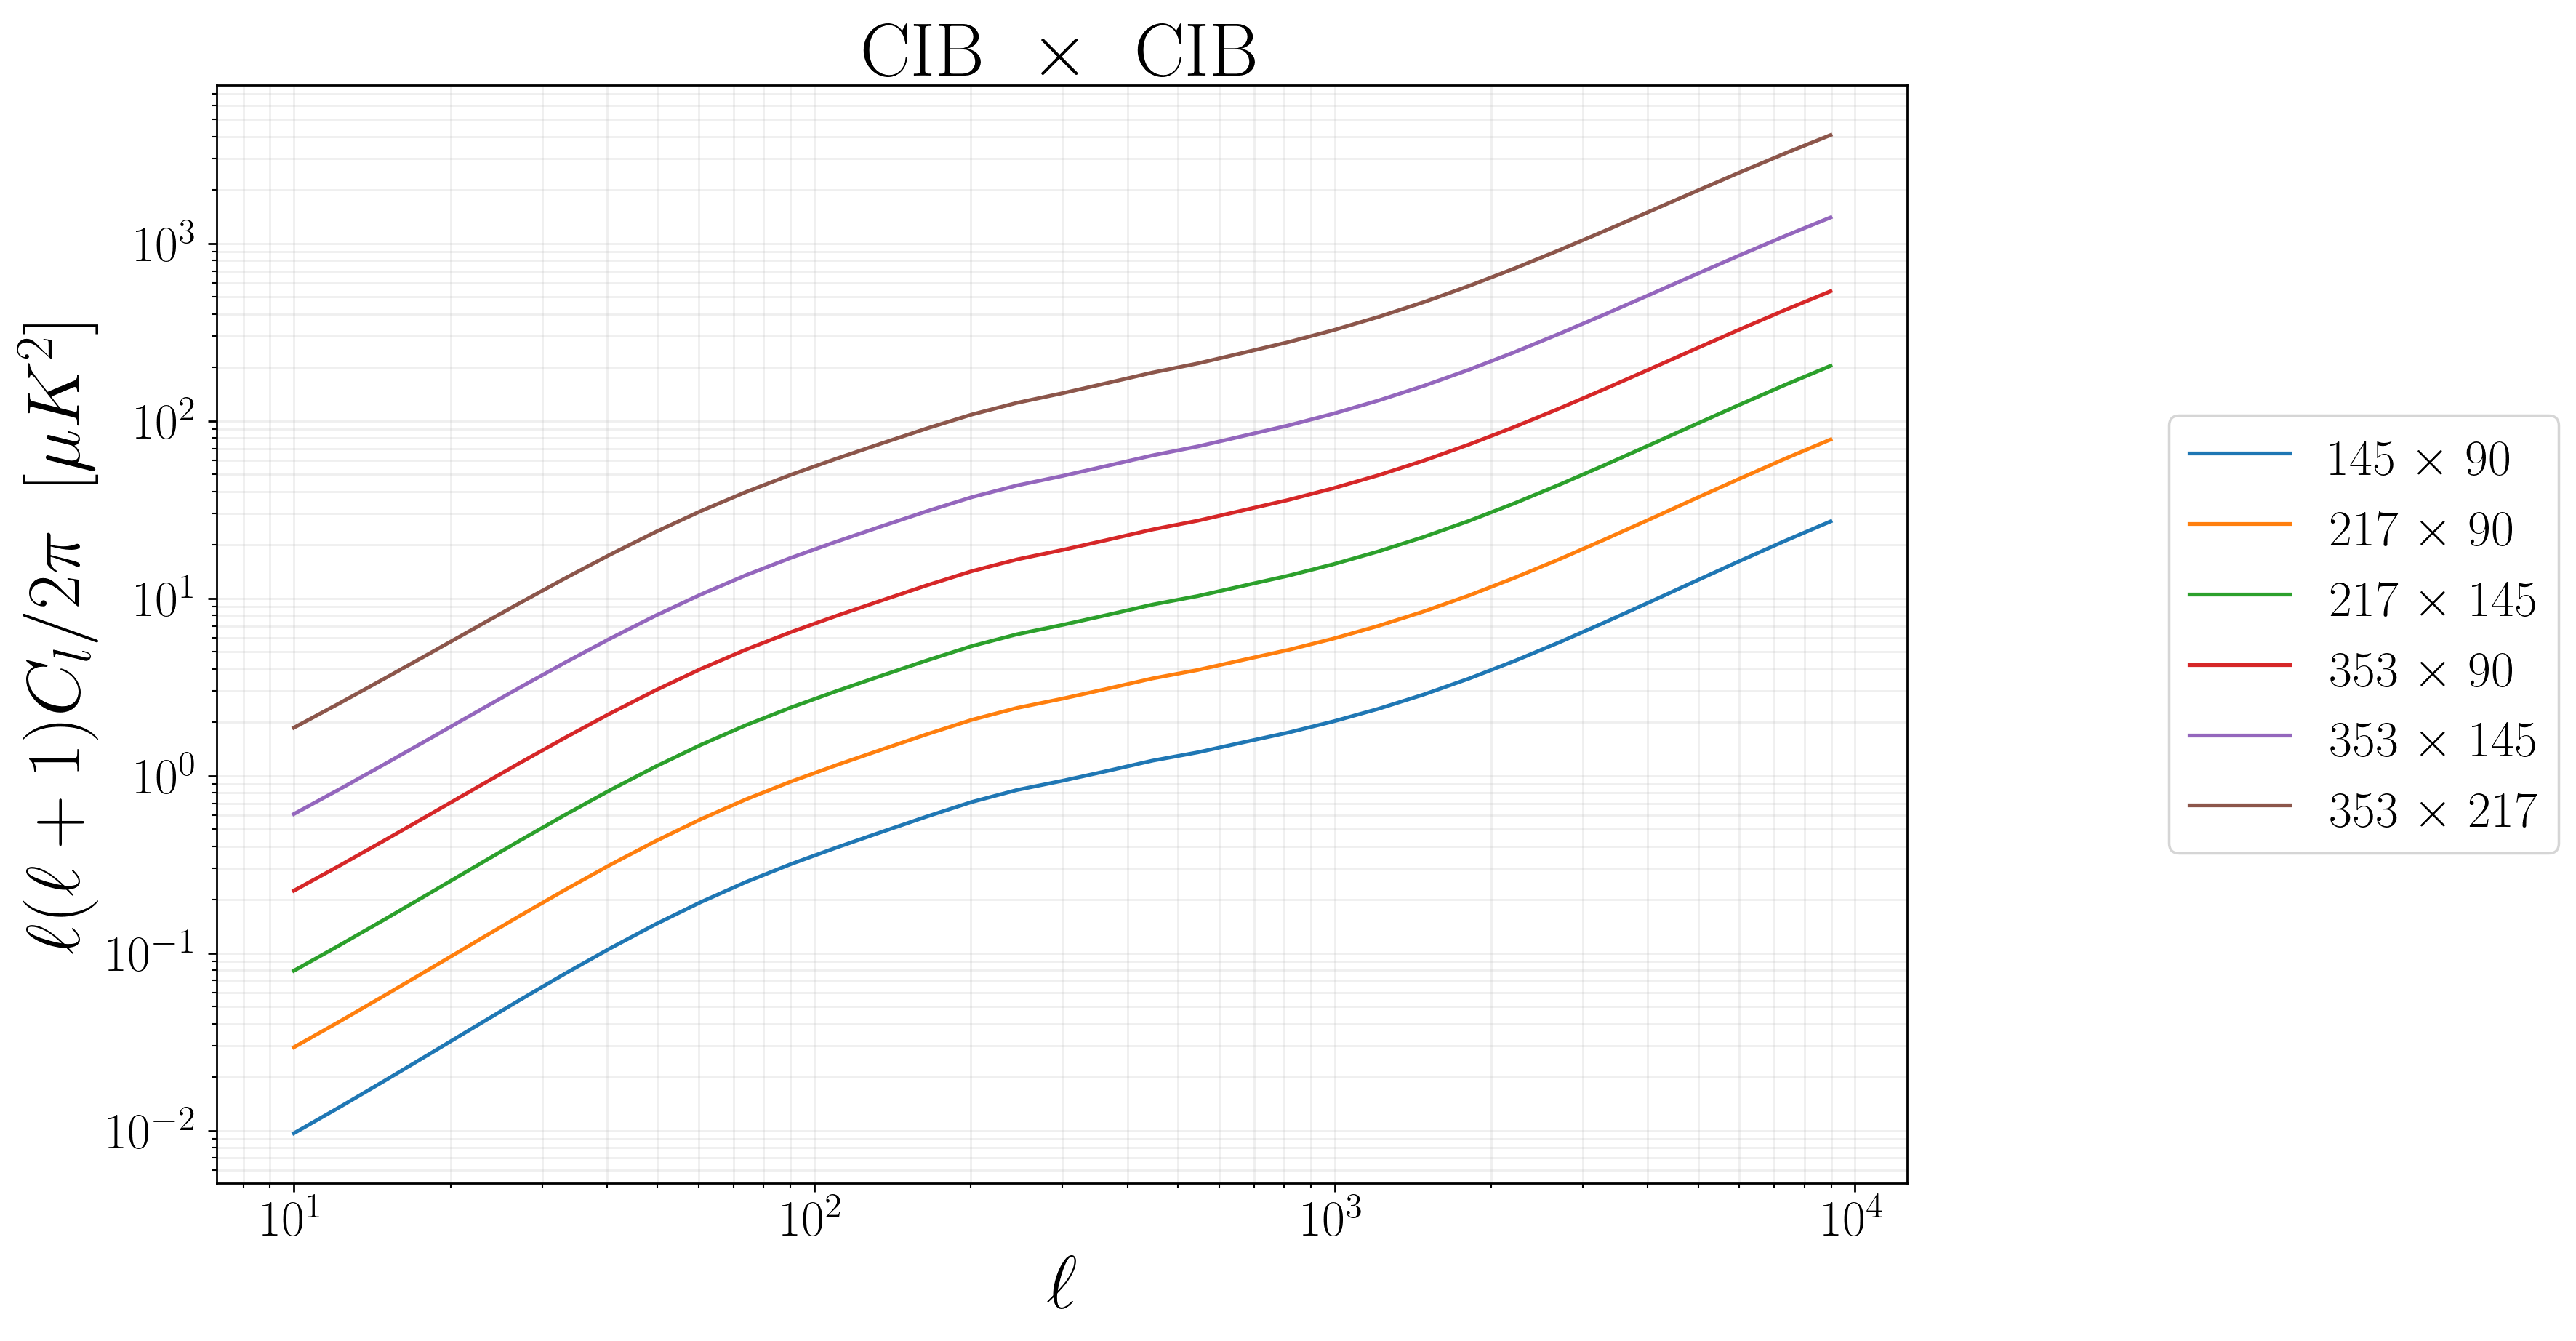

In [86]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"CIB \ $\times$ \ CIB", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)


for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            nu1_nu2 = str(nu1)+"x"+str(nu2)
            if nu1_nu2 in cl_cib_cib:
                print(nu1_nu2)
                cl_cib_1h = np.asarray(cl_cib_cib[nu1_nu2]['1h'])
                cl_cib_2h = np.asarray(cl_cib_cib[nu1_nu2]['2h'])
                cl_cib_uK = (cl_cib_1h+cl_cib_2h) / convert_Jysr_to_uK(nu1) /convert_Jysr_to_uK(nu2)
                plt.plot(cl_cib_cib['217x217']['ell'], cl_cib_uK, label=r"%.1i  $\times$ %.1i "%(nu1,nu2))#str(mu)+"x"+str(niu))
                np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_CIBxCIB.txt", ( cl_cib_cib['217x217']['ell'], cl_cib_uK ) )

        
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x tSZ 

In [60]:
# function used to compute tsz at nu (inside class-sz)
def cl_sz_at_nu1_nu2_in_GHz_in_microK2(cl_sz, nu1_in_GHz, nu2_in_GHz):
    print(nu1_in_GHz, nu2_in_GHz)
    frequency1_in_Hz, frequency2_in_Hz = nu1_in_GHz*1e9, nu2_in_GHz*1e9
    _h_P_=6.62606896e-34
    _k_B_=1.3806504e-23
    Tcmb_gNU1 = TCMB*((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency1_in_Hz/(_k_B_*TCMB))/2.))-4.)
    Tcmb_gNU2 = TCMB*((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency2_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    r = {}
    r['ell'] = np.asarray(cl_sz['ell'])
    r['1h'] = np.asarray(cl_sz['1h'])*Tcmb_gNU1*Tcmb_gNU2
    r['2h'] = np.asarray(cl_sz['2h'])*Tcmb_gNU1*Tcmb_gNU2
    return r

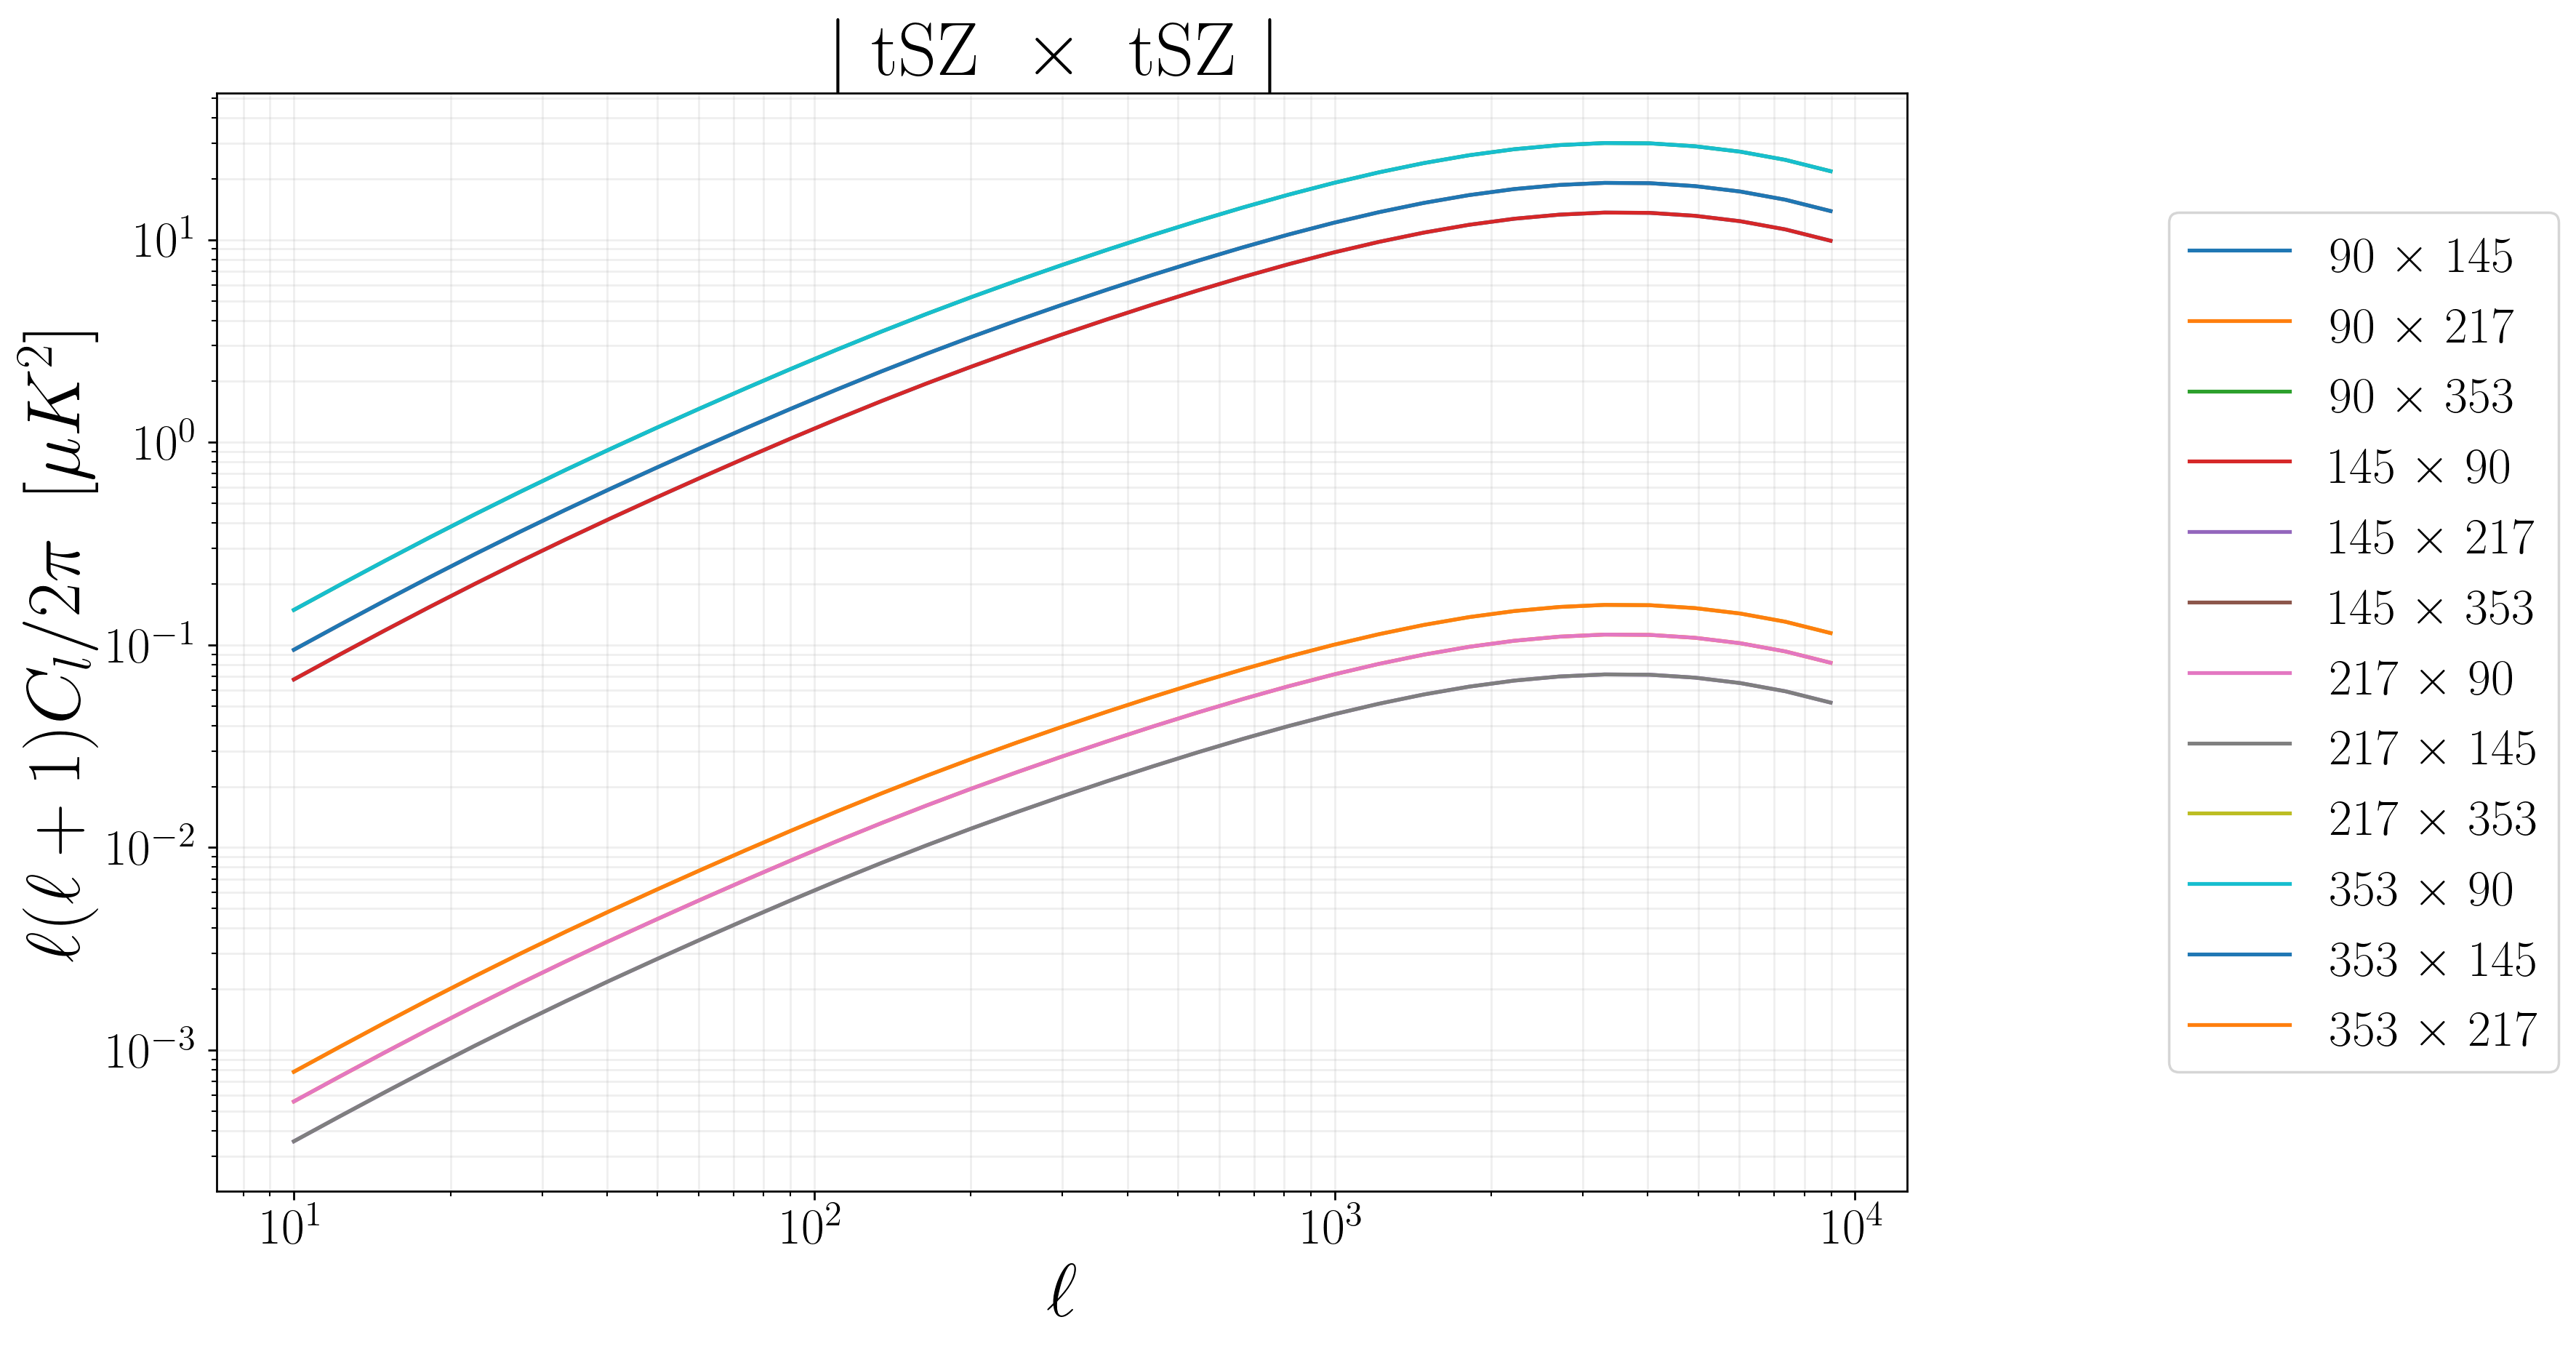

In [87]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(r"$|$ tSZ \ $\times$ \ tSZ $|$", fontsize =30)
  
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)

_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

for (i,nu1) in enumerate(nu_list):
    for (j,nu2) in enumerate(nu_list):
        if nu1!=nu2:
            cl_tsz_cross = ( np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']) )*tSZ_spectral_funct_at_nu_in_GHz(nu1)*tSZ_spectral_funct_at_nu_in_GHz(nu2)
            plt.plot(cl_sz['ell'], abs(cl_tsz_cross), label=r"%.1i $\times$ %.1i"%(nu1, nu2))
            np.savetxt(path_save+'ell_dl_'+str(nu1)+"x"+str(nu2)+"_GHz_tSZxtSZ.txt", ( cl_sz['ell'], cl_tsz_cross ) )
 
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## tSZ x CIB

In [62]:
# assuming cl_tSZ_CIB is already multiplied by the spectral response function 

_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

def cl_yCIB_at_nu_in_GHz(cl_sz_cib, nu_in_GHz):
    print(nu_in_GHz)
    frequency_in_Hz= nu_in_GHz*1e9
    Tcmb_gNU1 = TCMB*((_h_P_*frequency_in_Hz/(_k_B_*TCMB))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*TCMB))/2.))-4.)
    
    yCIB = {}
    yCIB['ell'] = np.asarray(cl_sz_cib['ell'])
    yCIB['1h'] = np.asarray(cl_sz_cib['1h'])/Tcmb_gNU1
    yCIB['2h'] = np.asarray(cl_sz_cib['2h'])/Tcmb_gNU1
    return yCIB

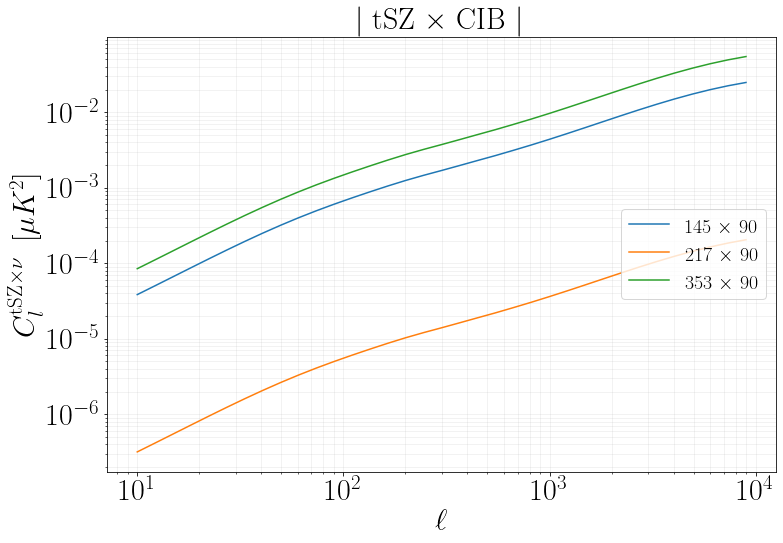

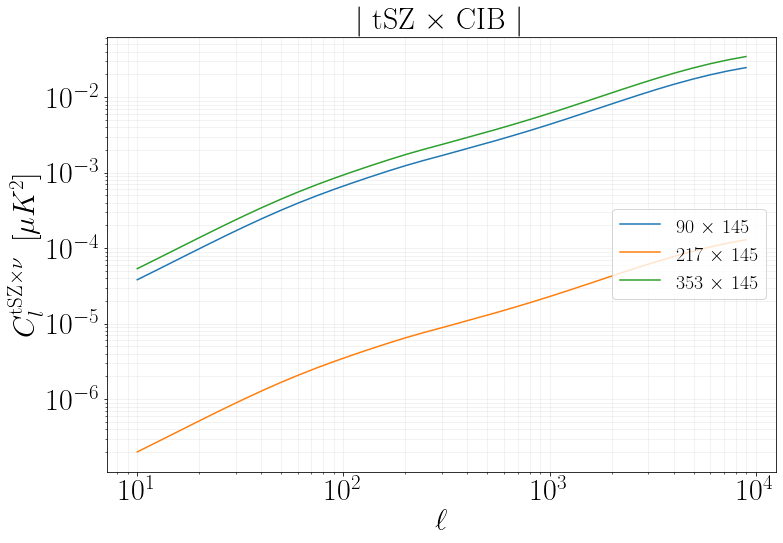

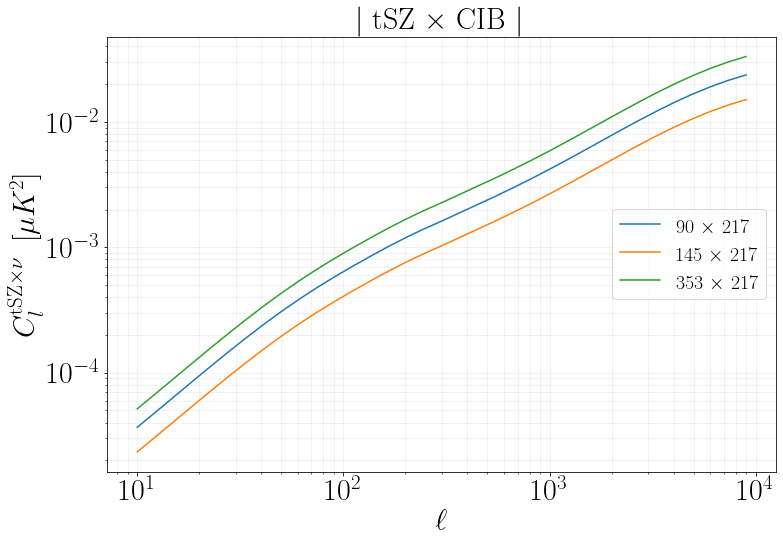

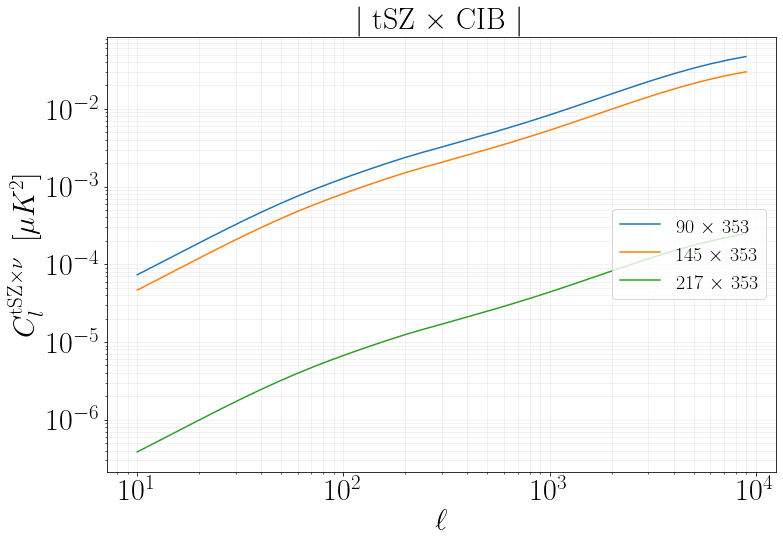

In [88]:
for (i,nu_cib) in enumerate(nu_list):
    plt.figure(figsize=(12,8))
    plt.xlabel(r"$\ell$", size=30)
    plt.ylabel(r"$ C_l^{\rm{ tSZ \times \nu}} \,\,\, [\mu K^2]$", size=30)
    plt.title(r' $|$ tSZ $\times$ CIB  $|$', fontsize=30)
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_cib)]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu_cib)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu_cib)]['2h'])  
    CIBy_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)/ convert_Jysr_to_uK(nu_cib)
    

    for (j,nu_sz) in enumerate(nu_list):
        if nu_sz!=nu_cib:
            CIBtSZ_uK = CIBy_uK*tSZ_spectral_funct_at_nu_in_GHz(nu_sz)
            plt.plot(ell_tsz_cib, abs(CIBtSZ_uK),'-',label=r'%.1i $\times$ %.1i '%(nu_sz, nu_cib))
            np.savetxt(path_save+"ell_dl_"+str(nu_sz)+"x"+str(nu_cib)+"_GHz_tSZxCIB.txt", ( ell_tsz_cib, (CIBtSZ_uK)) )

    plt.legend(loc='right',  fontsize=20)    
  

# CIB - g 

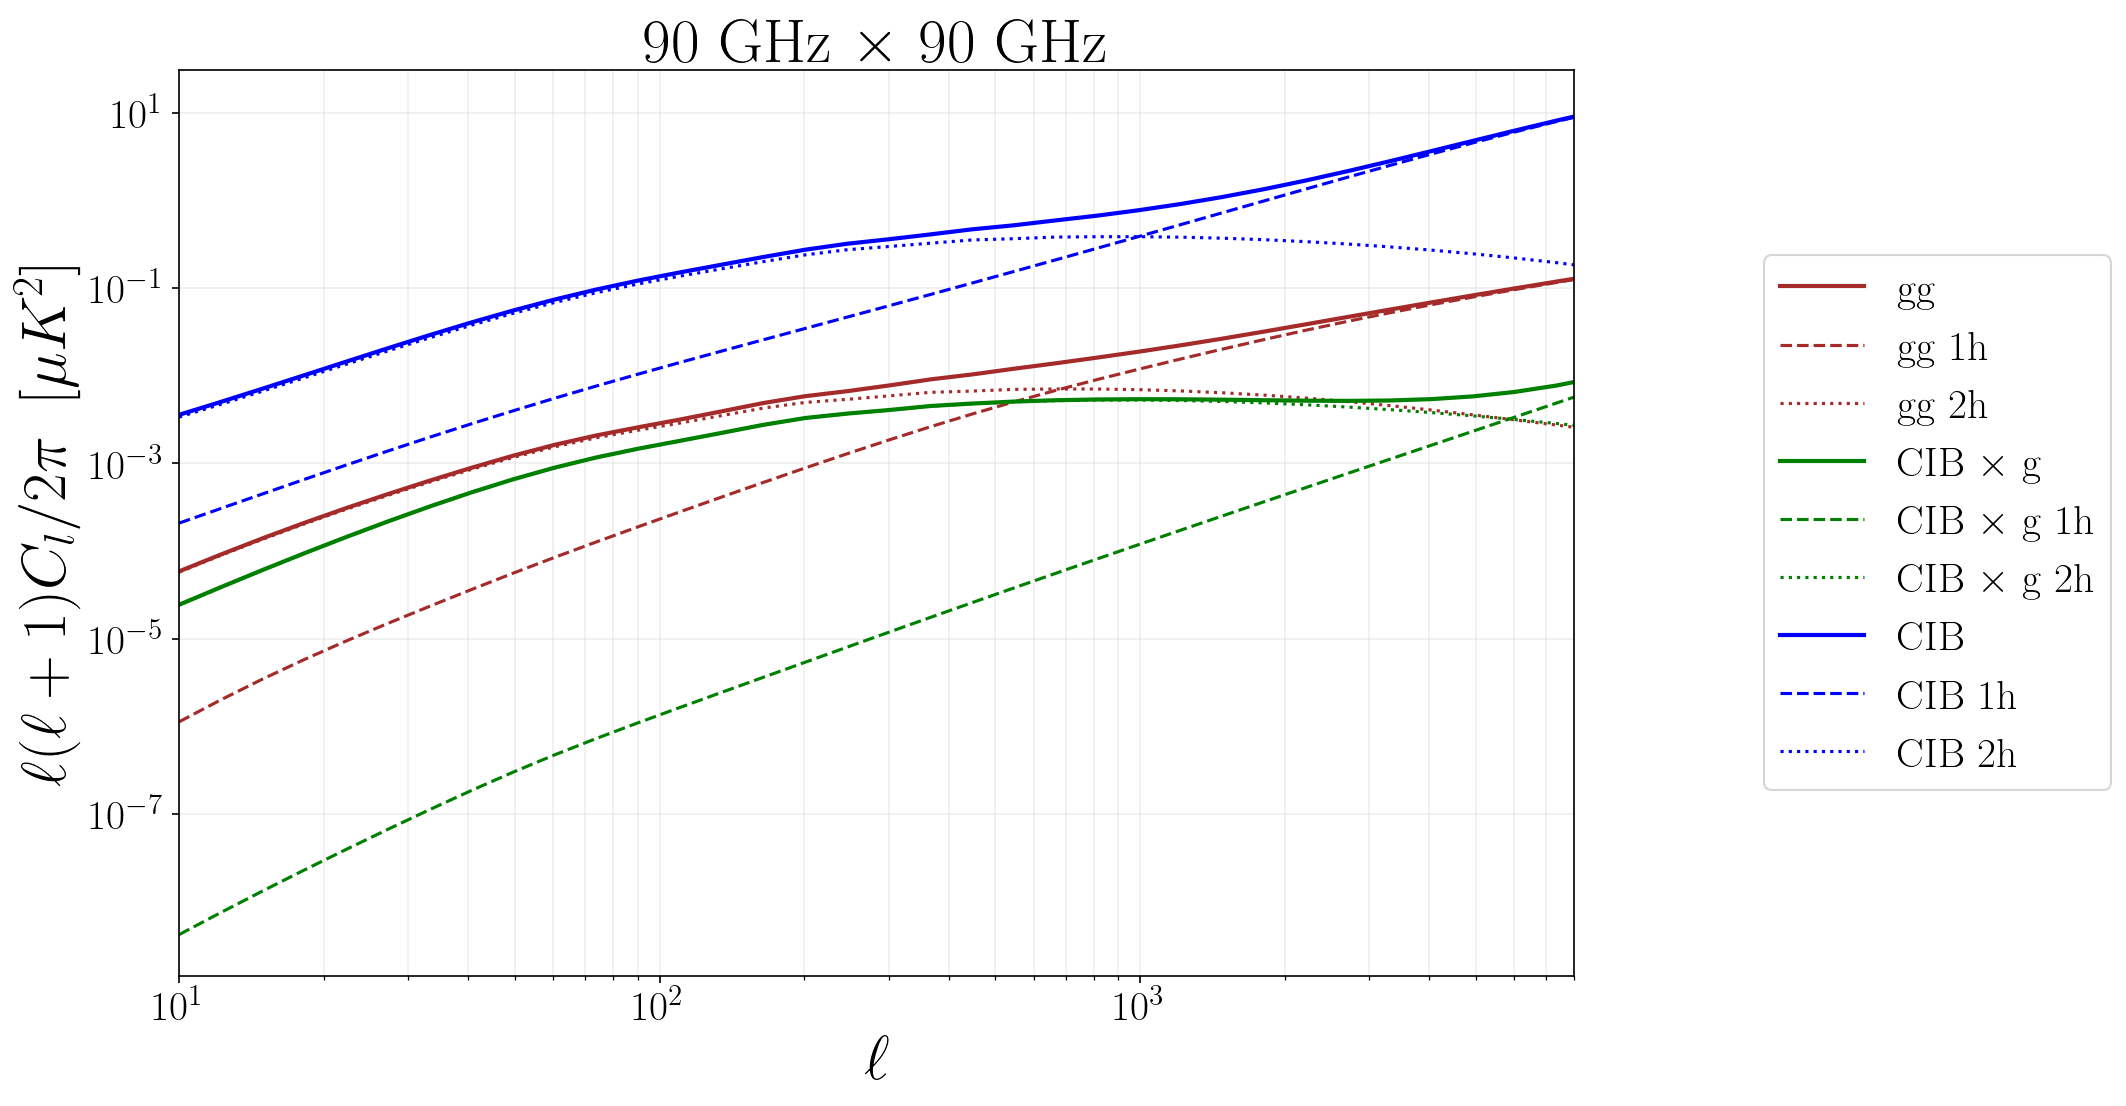

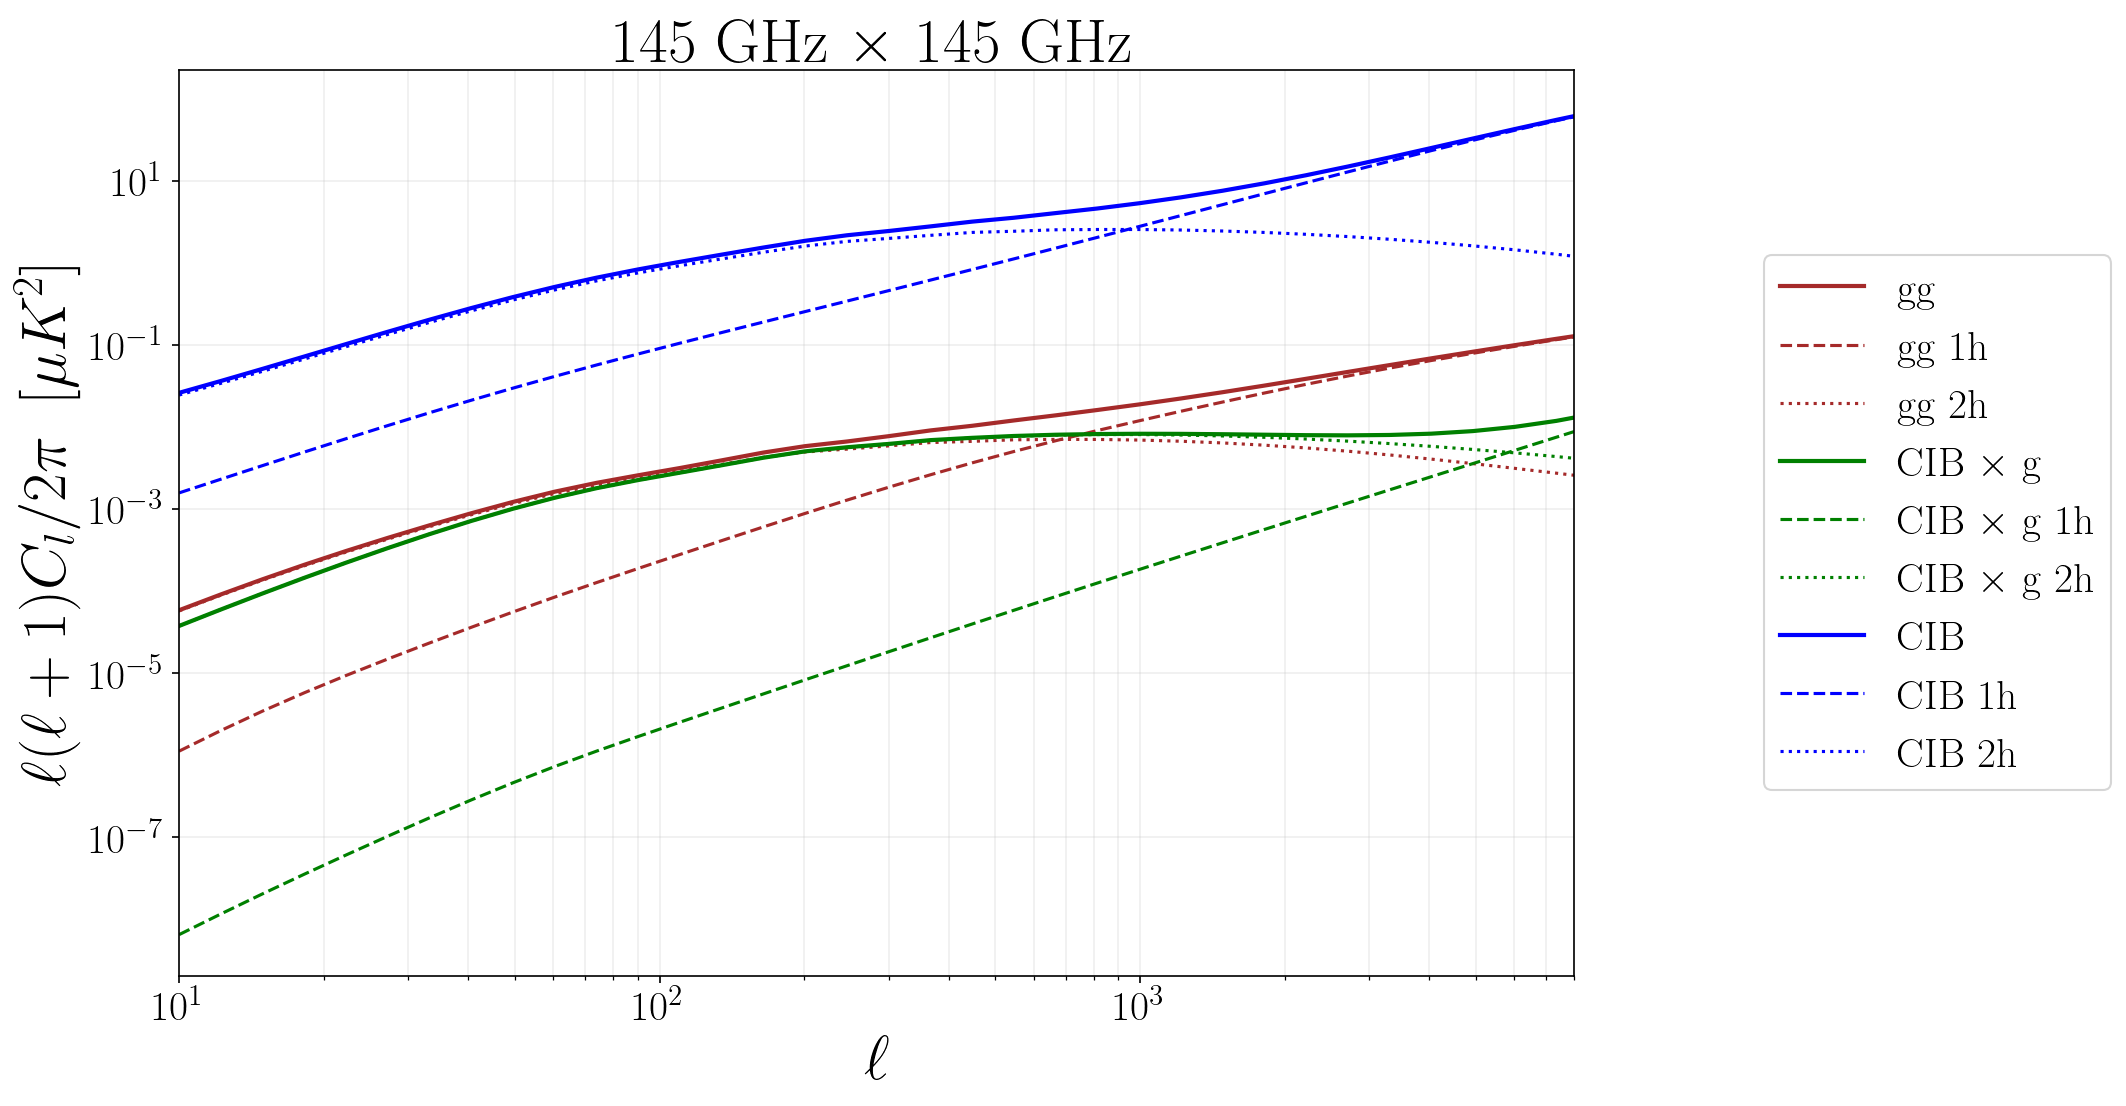

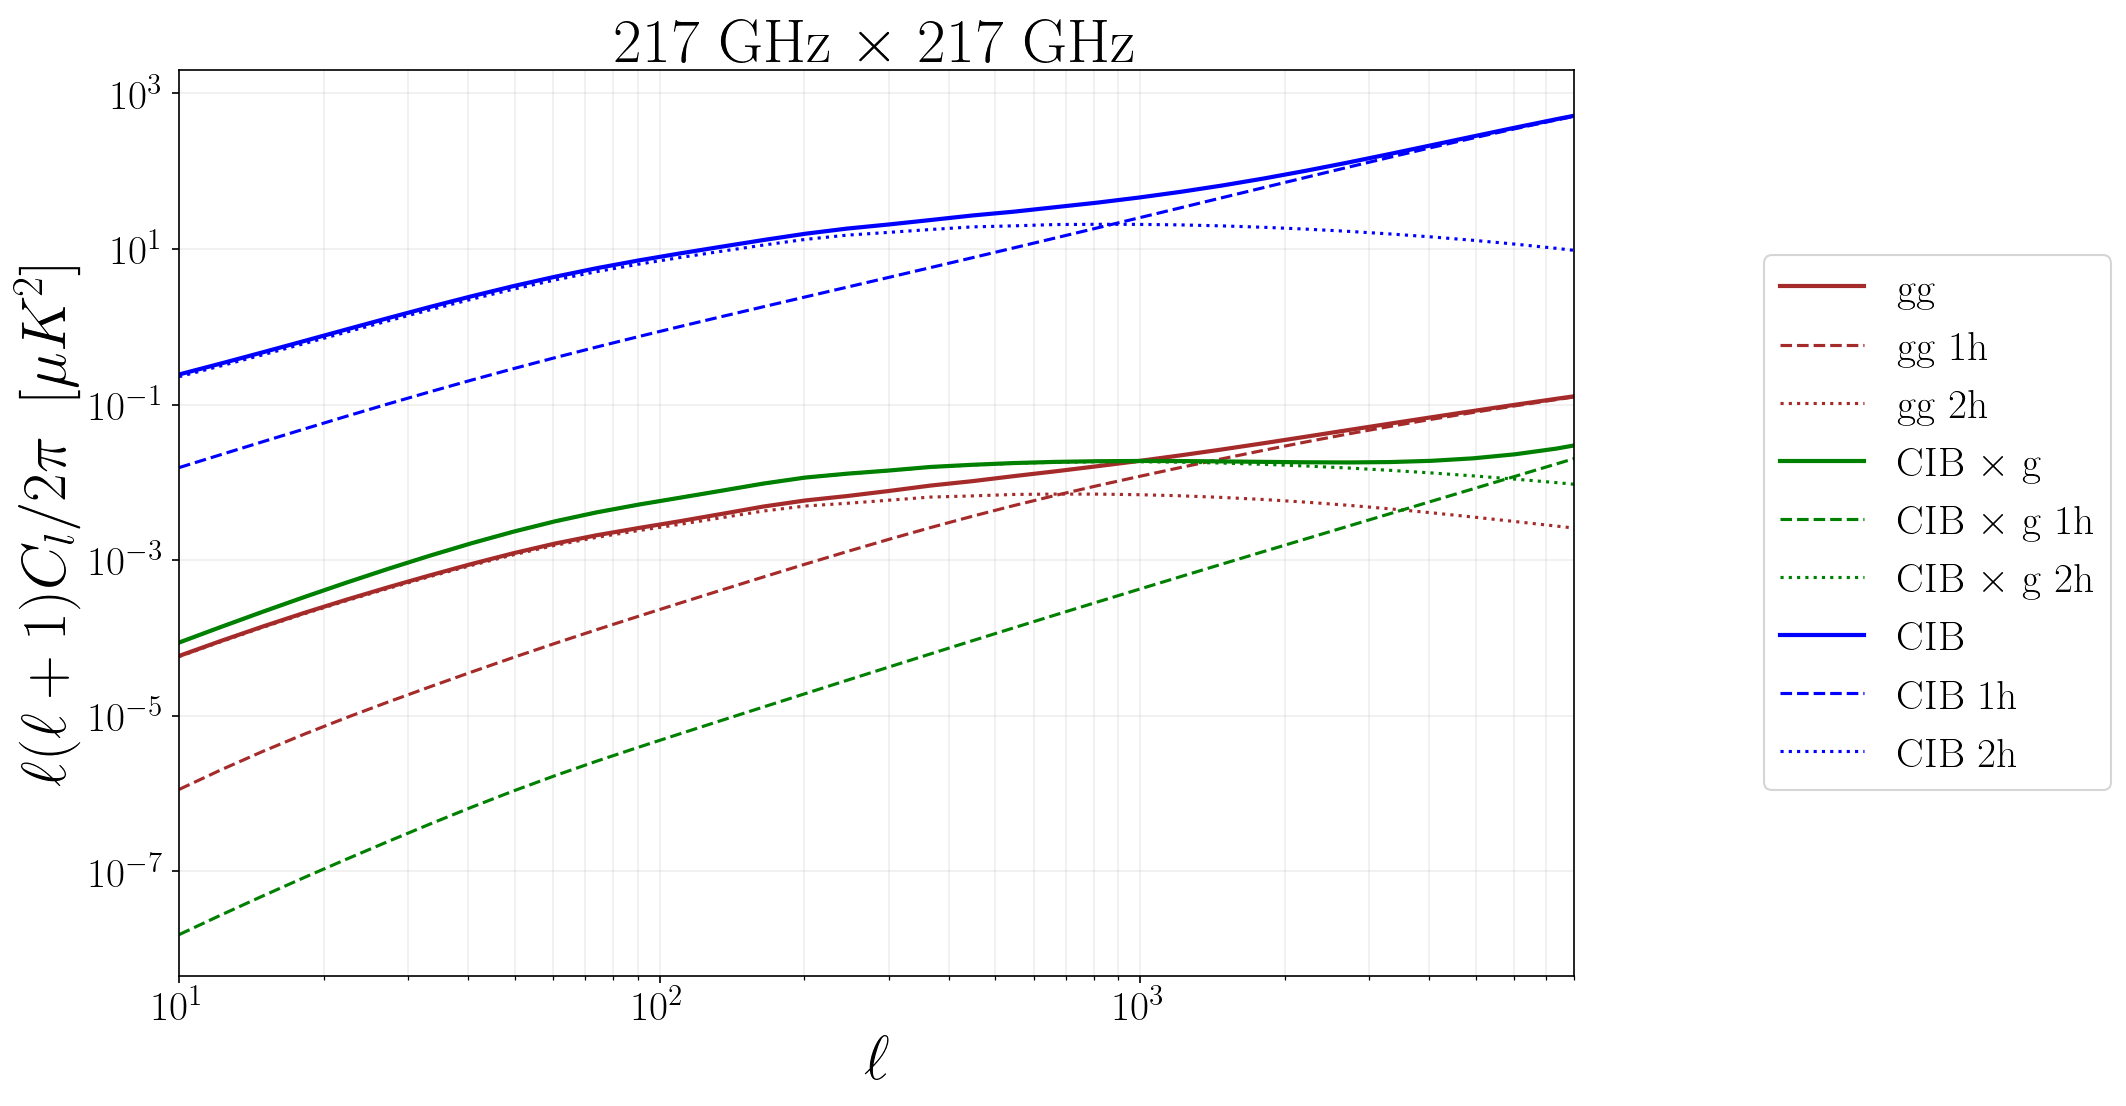

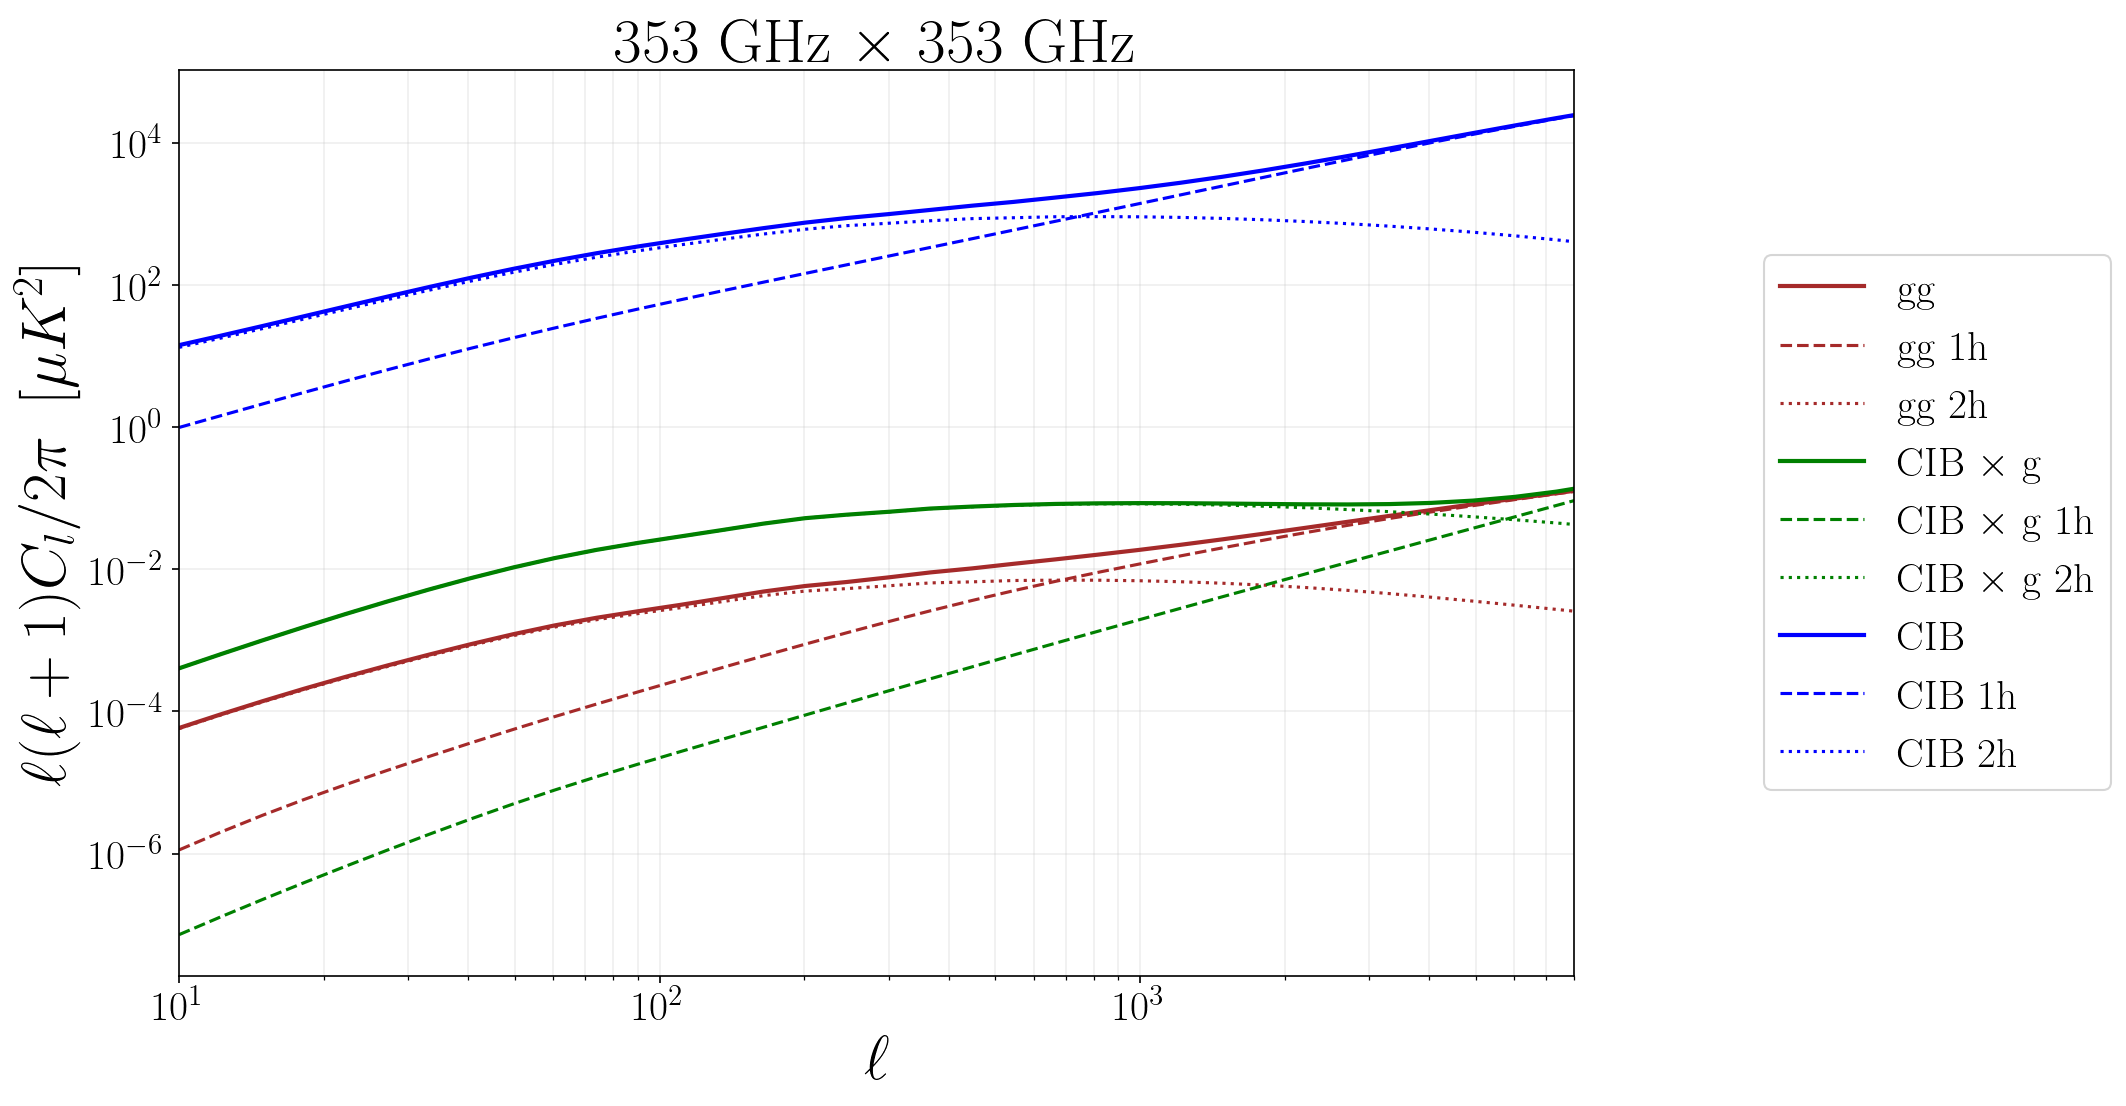

In [64]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    plt.figure(figsize=(12,8), dpi=150)
    plt.xlabel(r"$\ell$", fontsize=30)
    plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
    plt.title(str(nu_list[i])+' GHz $\\times$ '+str(nu_list[i])+' GHz', fontsize=30)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10, 8.e3)
    #plt.ylim(1e-4,6.e3)  
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    
    
    ## gg
    plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown",linewidth=2, label=r'gg')
    plt.plot(cl_gg_ell, cl_gg_1h , "--", color="brown", label=r'gg 1h ')
    plt.plot(cl_gg_ell, cl_gg_2h , ":", color="brown", label=r'gg 2h ')  
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    CIBg_uK_1h = (cl_cib_g_1h)/convert_Jysr_to_uK(nu)
    CIBg_uK_2h = ( cl_cib_g_2h)/convert_Jysr_to_uK(nu)
    plt.plot(cl_cib_g['217']['ell'], CIBg_uK , color="green", linewidth=2, label=r'CIB $\times$ g')
    plt.plot(cl_cib_g['217']['ell'], CIBg_uK_1h , "--", color="green", label=r'CIB $\times$ g, 1h')
    plt.plot(cl_cib_g['217']['ell'], CIBg_uK_2h , ":", color="green", label=r'CIB $\times$ g, 2h')
 
   ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_1h = (cls_cib_1h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
    CIB_uK_2h = (cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)

    plt.plot(cl_cib_cib['217x217']['ell'], CIB_uK, color="blue", linewidth=2,  label=r'CIB')
    plt.plot(cl_cib_cib['217x217']['ell'], CIB_uK_1h,"--", color="blue", label=r'CIB 1h ')
    plt.plot(cl_cib_cib['217x217']['ell'], CIB_uK_2h,":", color="blue", label=r'CIB 2h ')

    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

## CIB x tSZ

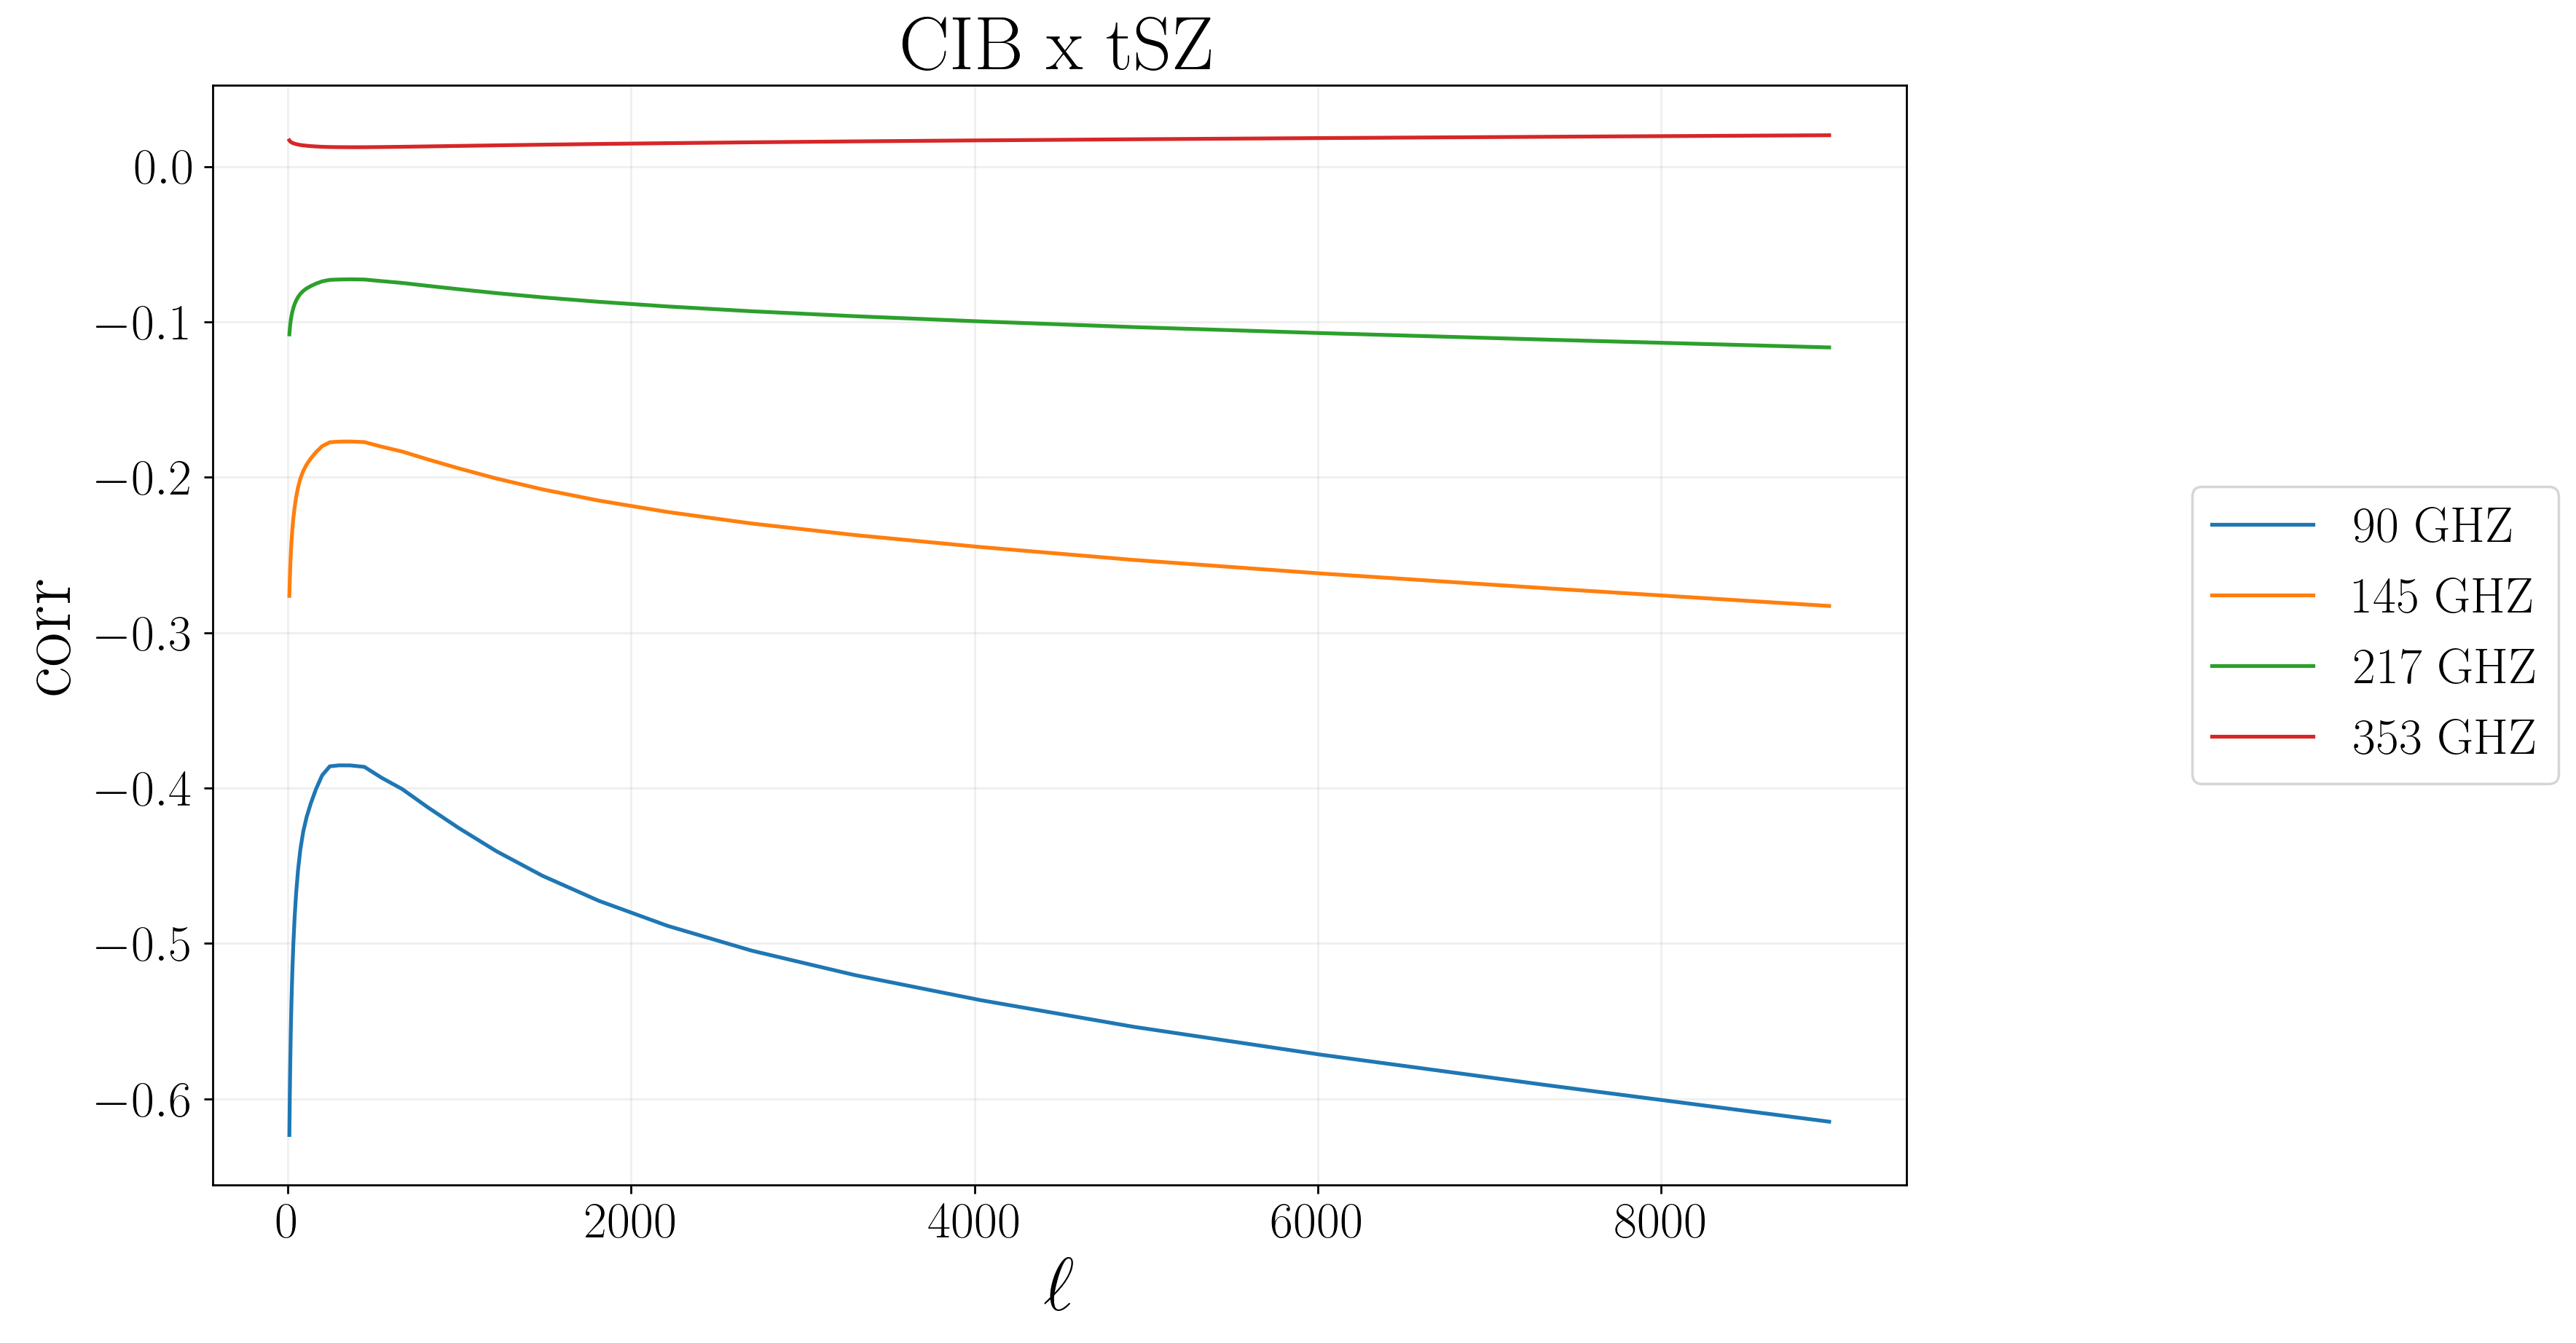

In [65]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)

for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu)**2
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) / convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_tsz_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_tsz_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBtSZ_uK = (cl_tsz_cib_1h+cl_tsz_cib_2h)*tSZ_spectral_funct_at_nu_in_GHz(nu)# convert_Jysr_to_uK(nu)
    
    corr = CIBtSZ_uK/np.sqrt(CIB_uK*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

##  tSZ x g 


In [66]:
ell_tsz_cib

array([  10.        ,   12.21402758,   14.91824698,   18.221188  ,
         22.25540928,   27.18281828,   33.20116923,   40.55199967,
         49.53032424,   60.49647464,   73.89056099,   90.25013499,
        110.23176381,  134.63738035,  164.44646771,  200.85536923,
        245.32530197,  299.64100047,  365.98234444,  447.01184493,
        545.98150033,  666.86331041,  814.50868665,  994.84315642,
       1215.10417519, 1484.13159103, 1812.72241875, 2214.06416204,
       2704.26407426, 3302.9955991 , 4034.28793493, 4927.49041093,
       6018.45037872, 7350.95189242, 8978.4729165 ])

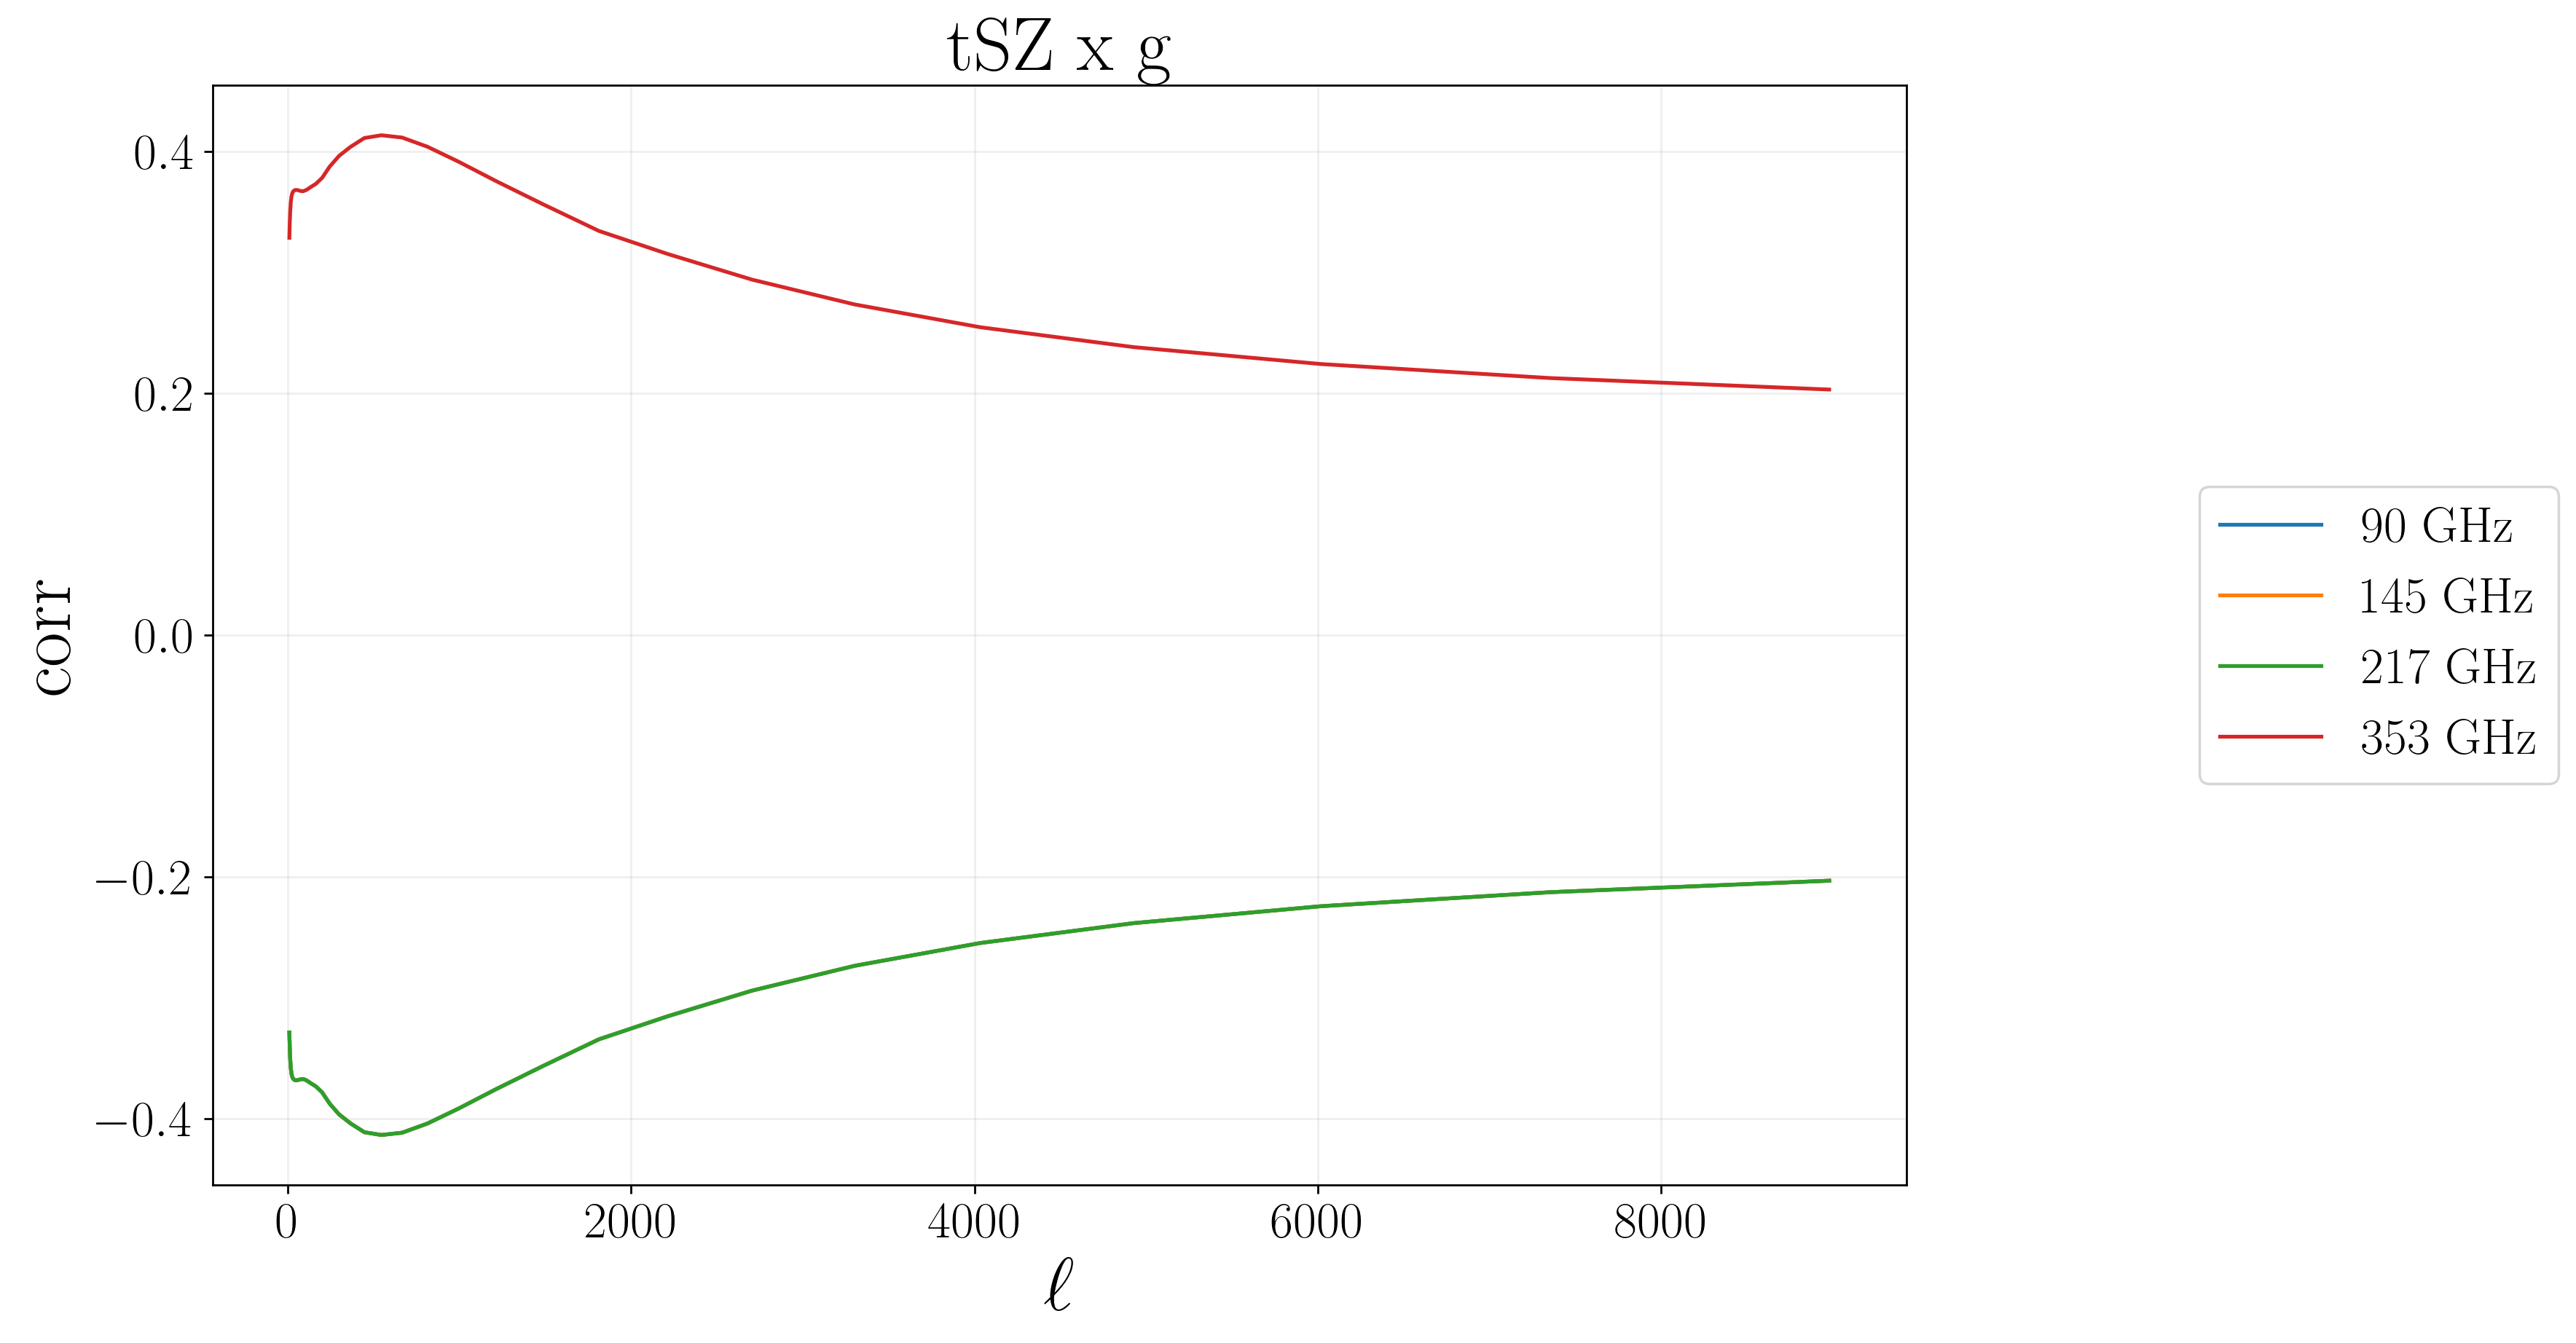

In [67]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g', fontsize=30)

for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy*tSZ_spectral_funct_at_nu_in_GHz(nu)**2
      
   # tSZ x g
    yg = np.asarray(cl_yg['1h'])+np.asarray(cl_yg['2h'])
    tSZg_uK = yg*tSZ_spectral_funct_at_nu_in_GHz(nu)
    
    #shot noise
    SN = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = tSZg_uK/np.sqrt((cl_gg_1h+cl_gg_2h+SN)*tsz_tsz)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

## CIB x g 

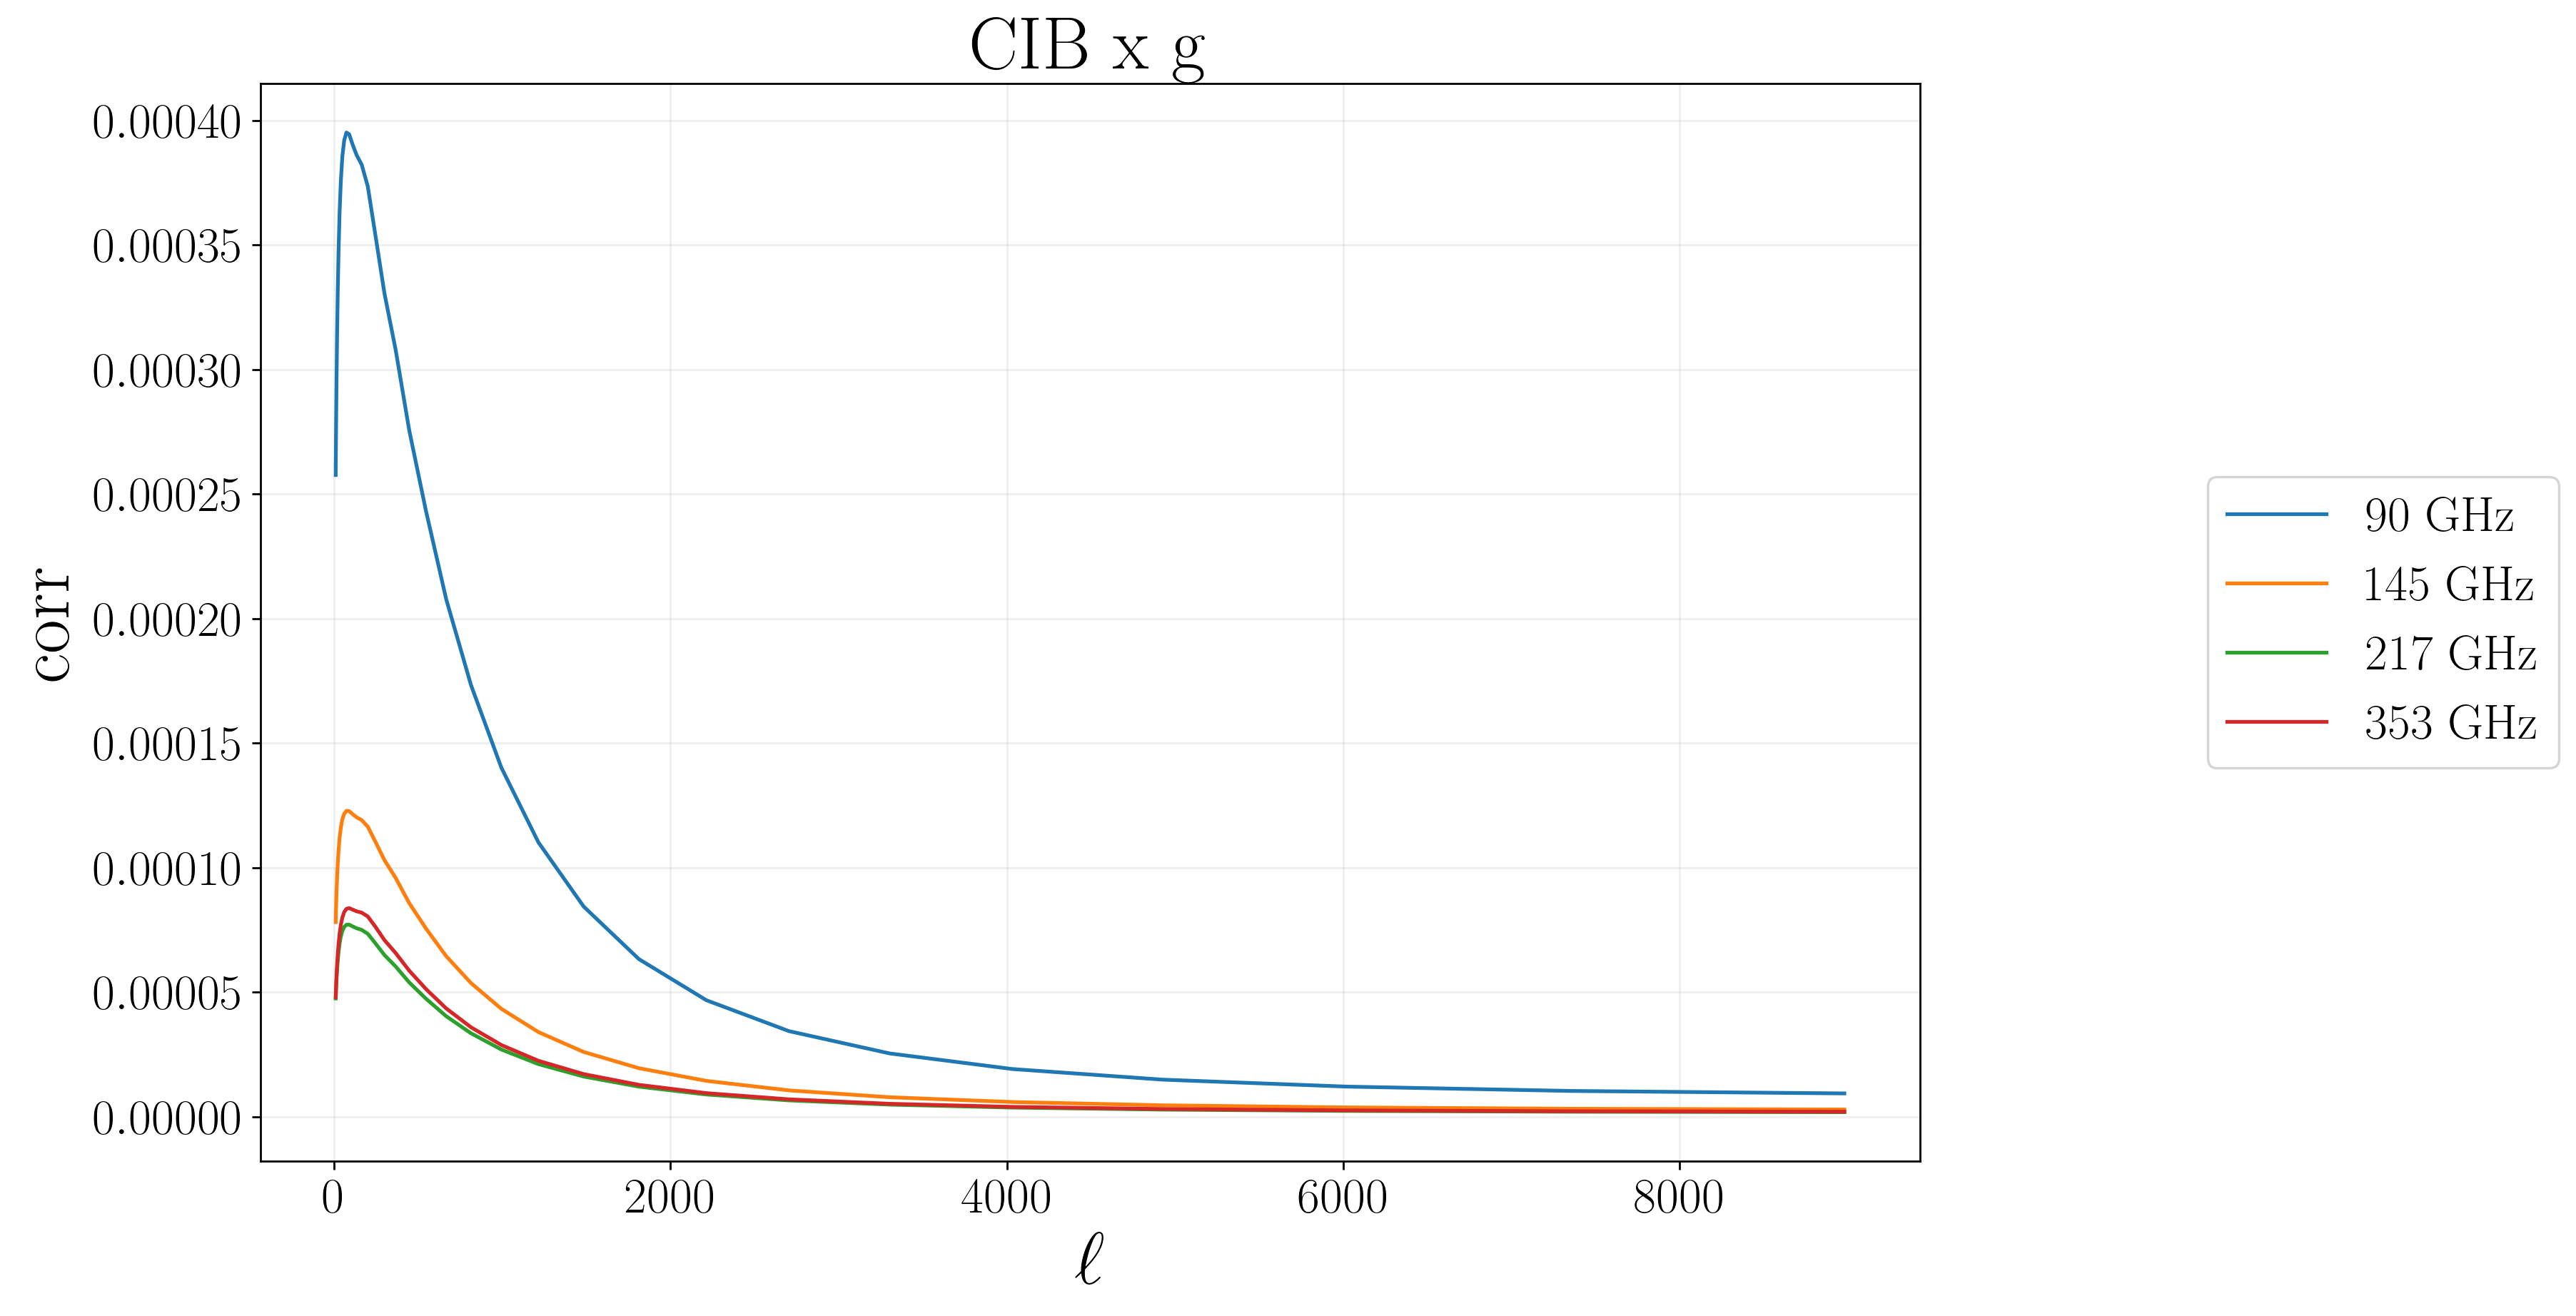

In [68]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g', fontsize=30)

for (i,nu) in enumerate(nu_list):  
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])#/cls_to_dls
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])#/cls_to_dls
    CIB_uK = (cls_cib_1h+cls_cib_2h) #/ convert_Jysr_to_uK(nu) /convert_Jysr_to_uK(nu)
     
    ## gg
    #plt.plot(cl_gg_ell, cl_gg_1h+cl_gg_2h ,color="brown", label=r'gg')
    
    #CIB x g 
    cl_cib_g_1h = np.asarray(cl_cib_g[str(nu_list[i])]['1h'])
    cl_cib_g_2h = np.asarray(cl_cib_g[str(nu_list[i])]['2h'])
    CIBg_uK = (cl_cib_g_1h + cl_cib_g_2h)/convert_Jysr_to_uK(nu)
 
    #shot noise
    SN_gg = 1.81*1e-7 * (ell_tsz_cib)*(ell_tsz_cib+1) /2/np.pi
    
    corr = CIBg_uK /np.sqrt((cl_gg_1h+cl_gg_2h+SN_gg)*CIB_uK)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHz"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 